Note: Need to be in 'pymer4' python environment to run this

In [1]:
import pandas as pd 
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from pymer4.models import Lmer
from nltools.stats import circle_shift, zscore
from tqdm import tqdm

%matplotlib inline
sns.set_style("white")

base_dir = os.path.dirname(os.getcwd())

/Users/emma/anaconda3/envs/pymer4/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
data = pd.read_csv(os.path.join(base_dir,'Analyses','binned_connection_and_gaps_friends.csv'))

In [3]:
data.head()

,subID,partnerID,dyad,bin_num,gap_length_mean_1,gap_length_median_1,connection_1,num_turns_1,gap_length_mean_2,gap_length_median_2,...,connection_40,num_turns_40,gap_length_mean_60,gap_length_median_60,connection_60,num_turns_60,gap_length_mean_120,gap_length_median_120,connection_120,num_turns_120
0,101,204,101_204,0.0,490.861111,308.5,87.891333,144.0,580.962500,412.0,...,75.373333,4.0,720.000000,1040.0,74.24,3.0,1040.0,1040.0,71.08,1.0
1,204,101,101_204,0.0,490.861111,308.5,58.253000,144.0,580.962500,412.0,...,26.233333,4.0,720.000000,1040.0,17.85,3.0,1040.0,1040.0,12.04,1.0
2,101,204,101_204,1.0,NaN,NaN,NaN,NaN,378.234375,219.0,...,80.346667,9.0,1506.000000,410.0,77.20,3.0,560.0,560.0,77.40,2.0
3,204,101,101_204,1.0,NaN,NaN,NaN,NaN,378.234375,219.0,...,43.000000,9.0,1506.000000,410.0,43.00,3.0,560.0,560.0,23.66,2.0
4,101,204,101_204,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,92.533333,6.0,626.285714,440.0,82.14,7.0,279.0,279.0,77.64,1.0


# Effect of gap length on connection for each bin size

In [4]:
df_real = pd.DataFrame()
df_real = df_real.fillna(0)
counter = 0

num_bins_list = [2, 3, 4, 5, 6, 10, 12,
                15, 20, 24, 30, 40, 60, 120]

for num_bins in num_bins_list:
    
    columns = [f'connection_{num_bins}', f'gap_length_mean_{num_bins}', 'bin_num', 'subID', 'dyad']
    data_subset = data[columns]
    data_subset_no_nans = data_subset.loc[data_subset['bin_num'] <= (num_bins - 1)].reset_index(drop=True)

    variables = [f'connection_{num_bins}', f'gap_length_mean_{num_bins}', 'bin_num']
    for variable in variables:
        data_subset_no_nans[f'{variable}_zscore'] = zscore(data_subset_no_nans[variable])

    #model = Lmer(f"connection_{num_bins}_zscore ~ gap_length_mean_{num_bins}_zscore + bin_num_zscore + (1|subID) + (1|dyad)", data=data_subset_no_nans)
    model = Lmer(f"connection_{num_bins}_zscore ~ gap_length_mean_{num_bins}_zscore + bin_num_zscore + (1 + gap_length_mean_{num_bins}_zscore |subID) + (1 + bin_num_zscore |dyad)", data=data_subset_no_nans)
    model.fit()
        
    df_real.at[counter, 'num_bins'] = num_bins
    df_real.at[counter, 'bin_size'] = 600 / num_bins
    df_real.at[counter, 'beta'] = model.coefs['Estimate'][1]
    df_real.at[counter, 'p-val'] = model.coefs['P-val'][1]

    counter += 1
        
df_real.to_csv(os.path.join(base_dir, 'Analyses', 'within_convo_analysis_different_bins_friends.csv'), encoding='utf-8', index=False)
    

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_zscore+bin_num_zscore+(1+gap_length_mean_2_zscore|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -297.811 	 AIC: 595.623

Random effects:

                              Name    Var    Std
subID                  (Intercept)  0.500  0.707
subID     gap_length_mean_2_zscore  0.163  0.404
dyad                   (Intercept)  0.209  0.457
dyad                bin_num_zscore  0.002  0.045
Residual                            0.192  0.438

               IV1                       IV2   Corr
subID  (Intercept)  gap_length_mean_2_zscore  0.345
dyad   (Intercept)            bin_num_zscore -1.000

Fixed effects:

Formula: connection_3_zscore~gap_length_mean_3_zscore+bin_num_zscore+(1+gap_length_mean_3_zscore|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations:

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_zscore+bin_num_zscore+(1+gap_length_mean_30_zscore|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3500.435 	 AIC: 7000.871

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.564  0.751
subID     gap_length_mean_30_zscore  0.002  0.045
dyad                    (Intercept)  0.274  0.523
dyad                 bin_num_zscore  0.038  0.195
Residual                             0.328  0.573

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_30_zscore  0.402
dyad  

# Circle-shift each bin

In [5]:
df_shifted = pd.DataFrame()
df_shifted = df_shifted.fillna(0)
counter = 0

num_bins_list = [2, 3, 4, 5, 6, 10, 12,
                15, 20, 24, 30, 40, 60, 120]

for num_bins in num_bins_list:
    
    columns = [f'connection_{num_bins}', f'gap_length_mean_{num_bins}', 'bin_num', 'subID', 'dyad']
    data_subset = data[columns]
    data_subset_no_nans = data_subset.loc[data_subset['bin_num'] <= (num_bins - 1)].reset_index(drop=True)

    variables = [f'connection_{num_bins}', f'gap_length_mean_{num_bins}', 'bin_num']
    for variable in variables:
        data_subset_no_nans[f'{variable}_zscore'] = zscore(data_subset_no_nans[variable])

    shifted_betas = []
    shifted_p_vals = []

    for _ in tqdm(range(100)):

        data_subset_no_nans[f'gap_length_mean_{num_bins}_shifted'] = data_subset_no_nans[f'gap_length_mean_{num_bins}_zscore'].groupby(data_subset_no_nans['dyad']).transform(circle_shift)
        model = Lmer(f"connection_{num_bins}_zscore ~ gap_length_mean_{num_bins}_shifted + bin_num_zscore + (1 + gap_length_mean_{num_bins}_shifted |subID) + (1 + bin_num_zscore |dyad)", data=data_subset_no_nans)
        model.fit()

        shifted_betas.append(model.coefs['Estimate'][1])
        shifted_p_vals.append(model.coefs['P-val'][1])
        
    for i in range(len(shifted_betas)):
        df_shifted.at[counter, 'num_bins'] = num_bins
        df_shifted.at[counter, 'bin_size'] = 600 / num_bins
        df_shifted.at[counter, 'betas'] = shifted_betas[i]
        df_shifted.at[counter, 'p-val'] = shifted_p_vals[i]
        
        counter += 1
        
df_shifted.to_csv(os.path.join(base_dir, 'Analyses', 'within_convo_analysis_circle_shifted_friends.csv'), encoding='utf-8', index=False)
    

  1%|          | 1/100 [00:00<00:55,  1.77it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.517 	 AIC: 605.035

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.496  0.704
subID     gap_length_mean_2_shifted  0.126  0.355
dyad                    (Intercept)  0.197  0.444
dyad                 bin_num_zscore  0.001  0.036
Residual                             0.220  0.470

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.419
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



  2%|▏         | 2/100 [00:00<00:47,  2.08it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -305.283 	 AIC: 610.566

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_2_shifted  0.008  0.087
dyad                    (Intercept)  0.266  0.515
dyad                 bin_num_zscore  0.002  0.048
Residual                             0.233  0.483

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted   1.0
dyad   (Intercept)             bin_num_zscore  -1.0

Fixed effects:



  3%|▎         | 3/100 [00:01<00:45,  2.15it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.160 	 AIC: 600.321

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.525  0.724
subID     gap_length_mean_2_shifted  0.151  0.389
dyad                    (Intercept)  0.162  0.403
dyad                 bin_num_zscore  0.003  0.050
Residual                             0.207  0.455

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.292
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



  4%|▍         | 4/100 [00:01<00:44,  2.17it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.115 	 AIC: 602.231

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.524  0.724
subID     gap_length_mean_2_shifted  0.092  0.303
dyad                    (Intercept)  0.242  0.492
dyad                 bin_num_zscore  0.001  0.026
Residual                             0.214  0.463

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.59
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



  5%|▌         | 5/100 [00:02<00:43,  2.19it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.373 	 AIC: 606.745

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.558  0.747
subID     gap_length_mean_2_shifted  0.049  0.221
dyad                    (Intercept)  0.253  0.503
dyad                 bin_num_zscore  0.001  0.033
Residual                             0.223  0.472

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.615
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



  6%|▌         | 6/100 [00:02<00:42,  2.20it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.981 	 AIC: 607.961

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.528  0.727
subID     gap_length_mean_2_shifted  0.070  0.265
dyad                    (Intercept)  0.209  0.457
dyad                 bin_num_zscore  0.001  0.027
Residual                             0.230  0.479

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.377
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



  7%|▋         | 7/100 [00:03<00:41,  2.24it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.596 	 AIC: 609.192

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.537  0.733
subID     gap_length_mean_2_shifted  0.065  0.255
dyad                    (Intercept)  0.252  0.502
dyad                 bin_num_zscore  0.002  0.041
Residual                             0.221  0.470

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.358
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



  8%|▊         | 8/100 [00:03<00:39,  2.30it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.790 	 AIC: 607.581

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.547  0.740
subID     gap_length_mean_2_shifted  0.075  0.273
dyad                    (Intercept)  0.202  0.450
dyad                 bin_num_zscore  0.002  0.043
Residual                             0.223  0.472

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.135
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:

boundary (singular) fit: see ?isSingular 



  9%|▉         | 9/100 [00:04<00:45,  2.01it/s]

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.532 	 AIC: 605.065

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.529  0.728
subID     gap_length_mean_2_shifted  0.106  0.326
dyad                    (Intercept)  0.192  0.438
dyad                 bin_num_zscore  0.000  0.018
Residual                             0.218  0.466

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.209
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 10%|█         | 10/100 [00:04<00:41,  2.15it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.860 	 AIC: 605.719

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.514  0.717
subID     gap_length_mean_2_shifted  0.091  0.302
dyad                    (Intercept)  0.209  0.457
dyad                 bin_num_zscore  0.001  0.024
Residual                             0.225  0.474

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.452
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 11%|█         | 11/100 [00:05<00:40,  2.21it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.321 	 AIC: 606.643

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.518  0.720
subID     gap_length_mean_2_shifted  0.085  0.292
dyad                    (Intercept)  0.245  0.495
dyad                 bin_num_zscore  0.001  0.032
Residual                             0.217  0.466

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.394
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 12%|█▏        | 12/100 [00:05<00:39,  2.25it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -299.420 	 AIC: 598.840

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.466  0.682
subID     gap_length_mean_2_shifted  0.188  0.433
dyad                    (Intercept)  0.198  0.445
dyad                 bin_num_zscore  0.002  0.046
Residual                             0.198  0.445

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.252
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 13%|█▎        | 13/100 [00:05<00:37,  2.31it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.592 	 AIC: 607.184

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.507  0.712
subID     gap_length_mean_2_shifted  0.090  0.299
dyad                    (Intercept)  0.239  0.489
dyad                 bin_num_zscore  0.001  0.029
Residual                             0.220  0.469

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.402
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 14%|█▍        | 14/100 [00:06<00:37,  2.29it/s]

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.202 	 AIC: 600.404

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.497  0.705
subID     gap_length_mean_2_shifted  0.169  0.411
dyad                    (Intercept)  0.162  0.403
dyad                 bin_num_zscore  0.002  0.040
Residual                             0.206  0.454

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.132
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 15%|█▌        | 15/100 [00:06<00:36,  2.32it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.600 	 AIC: 601.201

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.501  0.708
subID     gap_length_mean_2_shifted  0.130  0.361
dyad                    (Intercept)  0.227  0.477
dyad                 bin_num_zscore  0.001  0.034
Residual                             0.206  0.454

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.438
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 16%|█▌        | 16/100 [00:07<00:35,  2.34it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -298.344 	 AIC: 596.689

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.502  0.708
subID     gap_length_mean_2_shifted  0.187  0.432
dyad                    (Intercept)  0.210  0.459
dyad                 bin_num_zscore  0.002  0.047
Residual                             0.187  0.432

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.279
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 17%|█▋        | 17/100 [00:07<00:34,  2.38it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.172 	 AIC: 604.344

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.510  0.714
subID     gap_length_mean_2_shifted  0.109  0.330
dyad                    (Intercept)  0.223  0.473
dyad                 bin_num_zscore  0.001  0.025
Residual                             0.213  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.309
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 18%|█▊        | 18/100 [00:07<00:33,  2.43it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.399 	 AIC: 608.798

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.543  0.737
subID     gap_length_mean_2_shifted  0.072  0.268
dyad                    (Intercept)  0.238  0.488
dyad                 bin_num_zscore  0.002  0.045
Residual                             0.222  0.471

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.446
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 19%|█▉        | 19/100 [00:08<00:32,  2.46it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.375 	 AIC: 604.749

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.528  0.726
subID     gap_length_mean_2_shifted  0.110  0.332
dyad                    (Intercept)  0.215  0.463
dyad                 bin_num_zscore  0.003  0.053
Residual                             0.211  0.459

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.334
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 20%|██        | 20/100 [00:08<00:32,  2.45it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.218 	 AIC: 604.437

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.542  0.737
subID     gap_length_mean_2_shifted  0.058  0.242
dyad                    (Intercept)  0.232  0.482
dyad                 bin_num_zscore  0.001  0.033
Residual                             0.223  0.472

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.563
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 21%|██        | 21/100 [00:09<00:33,  2.37it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.037 	 AIC: 608.074

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.540  0.735
subID     gap_length_mean_2_shifted  0.063  0.252
dyad                    (Intercept)  0.234  0.484
dyad                 bin_num_zscore  0.001  0.028
Residual                             0.223  0.473

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.353
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 22%|██▏       | 22/100 [00:09<00:33,  2.31it/s]

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -299.327 	 AIC: 598.654

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.524  0.724
subID     gap_length_mean_2_shifted  0.112  0.335
dyad                    (Intercept)  0.212  0.460
dyad                 bin_num_zscore  0.001  0.036
Residual                             0.203  0.451

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.289
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 23%|██▎       | 23/100 [00:10<00:33,  2.32it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.321 	 AIC: 600.643

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.515  0.717
subID     gap_length_mean_2_shifted  0.157  0.397
dyad                    (Intercept)  0.174  0.417
dyad                 bin_num_zscore  0.004  0.064
Residual                             0.202  0.450

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.21
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 24%|██▍       | 24/100 [00:10<00:32,  2.32it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.115 	 AIC: 606.231

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.593  0.770
subID     gap_length_mean_2_shifted  0.012  0.111
dyad                    (Intercept)  0.250  0.500
dyad                 bin_num_zscore  0.002  0.044
Residual                             0.228  0.477

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.949
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 25%|██▌       | 25/100 [00:10<00:32,  2.31it/s]

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -292.896 	 AIC: 585.792

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.444  0.666
subID     gap_length_mean_2_shifted  0.237  0.487
dyad                    (Intercept)  0.173  0.416
dyad                 bin_num_zscore  0.003  0.051
Residual                             0.179  0.423

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.209
dyad   (Intercept)             bin_num_zscore -0.870

Fixed effects:



 26%|██▌       | 26/100 [00:11<00:32,  2.27it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -299.652 	 AIC: 599.304

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.487  0.698
subID     gap_length_mean_2_shifted  0.138  0.372
dyad                    (Intercept)  0.248  0.498
dyad                 bin_num_zscore  0.001  0.027
Residual                             0.201  0.449

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.495
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 27%|██▋       | 27/100 [00:11<00:31,  2.29it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.540 	 AIC: 605.081

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.537  0.733
subID     gap_length_mean_2_shifted  0.089  0.298
dyad                    (Intercept)  0.225  0.475
dyad                 bin_num_zscore  0.004  0.065
Residual                             0.215  0.464

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.476
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 28%|██▊       | 28/100 [00:12<00:31,  2.31it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.431 	 AIC: 608.862

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.523  0.723
subID     gap_length_mean_2_shifted  0.070  0.265
dyad                    (Intercept)  0.233  0.483
dyad                 bin_num_zscore  0.002  0.041
Residual                             0.226  0.475

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.36
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 29%|██▉       | 29/100 [00:12<00:30,  2.30it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.686 	 AIC: 601.372

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.497  0.705
subID     gap_length_mean_2_shifted  0.123  0.351
dyad                    (Intercept)  0.221  0.470
dyad                 bin_num_zscore  0.001  0.031
Residual                             0.208  0.456

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.31
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 30%|███       | 30/100 [00:13<00:30,  2.31it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.317 	 AIC: 606.635

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.506  0.711
subID     gap_length_mean_2_shifted  0.096  0.310
dyad                    (Intercept)  0.250  0.500
dyad                 bin_num_zscore  0.001  0.029
Residual                             0.217  0.466

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.45
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 31%|███       | 31/100 [00:13<00:29,  2.32it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.756 	 AIC: 605.512

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.522  0.723
subID     gap_length_mean_2_shifted  0.105  0.324
dyad                    (Intercept)  0.201  0.448
dyad                 bin_num_zscore  0.001  0.027
Residual                             0.220  0.469

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.388
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 32%|███▏      | 32/100 [00:14<00:29,  2.32it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.990 	 AIC: 601.980

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.539  0.734
subID     gap_length_mean_2_shifted  0.062  0.248
dyad                    (Intercept)  0.213  0.462
dyad                 bin_num_zscore  0.000  0.006
Residual                             0.220  0.469

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.283
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 33%|███▎      | 33/100 [00:14<00:28,  2.36it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.048 	 AIC: 608.096

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.539  0.734
subID     gap_length_mean_2_shifted  0.072  0.268
dyad                    (Intercept)  0.235  0.485
dyad                 bin_num_zscore  0.002  0.044
Residual                             0.220  0.469

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.309
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 34%|███▍      | 34/100 [00:14<00:27,  2.36it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -299.818 	 AIC: 599.635

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.511  0.715
subID     gap_length_mean_2_shifted  0.141  0.375
dyad                    (Intercept)  0.206  0.454
dyad                 bin_num_zscore  0.003  0.053
Residual                             0.205  0.453

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.473
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 35%|███▌      | 35/100 [00:15<00:28,  2.31it/s]

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.752 	 AIC: 601.505

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.498  0.705
subID     gap_length_mean_2_shifted  0.197  0.444
dyad                    (Intercept)  0.159  0.399
dyad                 bin_num_zscore  0.000  0.008
Residual                             0.205  0.453

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.188
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 36%|███▌      | 36/100 [00:15<00:26,  2.38it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -299.967 	 AIC: 599.933

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.482  0.695
subID     gap_length_mean_2_shifted  0.153  0.391
dyad                    (Intercept)  0.210  0.459
dyad                 bin_num_zscore  0.002  0.041
Residual                             0.203  0.451

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.339
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 37%|███▋      | 37/100 [00:16<00:26,  2.42it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.053 	 AIC: 602.106

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.498  0.705
subID     gap_length_mean_2_shifted  0.128  0.358
dyad                    (Intercept)  0.232  0.481
dyad                 bin_num_zscore  0.002  0.041
Residual                             0.207  0.455

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.426
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 38%|███▊      | 38/100 [00:16<00:25,  2.39it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.551 	 AIC: 607.103

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.516  0.718
subID     gap_length_mean_2_shifted  0.100  0.316
dyad                    (Intercept)  0.224  0.473
dyad                 bin_num_zscore  0.001  0.034
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.388
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 39%|███▉      | 39/100 [00:16<00:25,  2.42it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.754 	 AIC: 605.508

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_2_shifted  0.048  0.219
dyad                    (Intercept)  0.250  0.500
dyad                 bin_num_zscore  0.001  0.038
Residual                             0.222  0.471

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.723
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 40%|████      | 40/100 [00:17<00:24,  2.42it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.594 	 AIC: 609.188

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.530  0.728
subID     gap_length_mean_2_shifted  0.065  0.254
dyad                    (Intercept)  0.246  0.496
dyad                 bin_num_zscore  0.001  0.033
Residual                             0.223  0.472

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.31
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 41%|████      | 41/100 [00:17<00:24,  2.44it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.634 	 AIC: 603.268

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.549  0.741
subID     gap_length_mean_2_shifted  0.106  0.325
dyad                    (Intercept)  0.194  0.440
dyad                 bin_num_zscore  0.004  0.065
Residual                             0.214  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.471
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 42%|████▏     | 42/100 [00:18<00:24,  2.38it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.031 	 AIC: 606.062

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.563  0.750
subID     gap_length_mean_2_shifted  0.049  0.221
dyad                    (Intercept)  0.223  0.472
dyad                 bin_num_zscore  0.003  0.050
Residual                             0.225  0.474

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.537
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 43%|████▎     | 43/100 [00:18<00:24,  2.36it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.669 	 AIC: 609.338

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.748
subID     gap_length_mean_2_shifted  0.033  0.182
dyad                    (Intercept)  0.231  0.480
dyad                 bin_num_zscore  0.001  0.026
Residual                             0.232  0.482

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.343
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 44%|████▍     | 44/100 [00:19<00:23,  2.35it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -299.471 	 AIC: 598.942

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.482  0.695
subID     gap_length_mean_2_shifted  0.171  0.414
dyad                    (Intercept)  0.168  0.409
dyad                 bin_num_zscore  0.002  0.045
Residual                             0.207  0.455

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.264
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 45%|████▌     | 45/100 [00:19<00:23,  2.34it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.345 	 AIC: 606.690

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_2_shifted  0.016  0.127
dyad                    (Intercept)  0.241  0.491
dyad                 bin_num_zscore  0.001  0.028
Residual                             0.230  0.480

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.693
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 46%|████▌     | 46/100 [00:19<00:23,  2.30it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.156 	 AIC: 602.311

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.489  0.699
subID     gap_length_mean_2_shifted  0.178  0.422
dyad                    (Intercept)  0.161  0.401
dyad                 bin_num_zscore  0.001  0.025
Residual                             0.210  0.459

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.17
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 47%|████▋     | 47/100 [00:20<00:23,  2.26it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.799 	 AIC: 603.599

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.468  0.684
subID     gap_length_mean_2_shifted  0.199  0.446
dyad                    (Intercept)  0.159  0.399
dyad                 bin_num_zscore  0.001  0.037
Residual                             0.212  0.460

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.18
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 48%|████▊     | 48/100 [00:20<00:22,  2.30it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -296.400 	 AIC: 592.799

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.501  0.708
subID     gap_length_mean_2_shifted  0.190  0.436
dyad                    (Intercept)  0.217  0.465
dyad                 bin_num_zscore  0.004  0.065
Residual                             0.184  0.429

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.486
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 49%|████▉     | 49/100 [00:21<00:21,  2.32it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.185 	 AIC: 604.370

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.487  0.698
subID     gap_length_mean_2_shifted  0.129  0.359
dyad                    (Intercept)  0.187  0.432
dyad                 bin_num_zscore  0.001  0.030
Residual                             0.221  0.470

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.333
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 50%|█████     | 50/100 [00:21<00:21,  2.31it/s]

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.413 	 AIC: 600.827

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.501  0.708
subID     gap_length_mean_2_shifted  0.118  0.344
dyad                    (Intercept)  0.208  0.456
dyad                 bin_num_zscore  0.002  0.045
Residual                             0.210  0.458

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.349
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 51%|█████     | 51/100 [00:22<00:21,  2.32it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.428 	 AIC: 604.856

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.538  0.733
subID     gap_length_mean_2_shifted  0.104  0.322
dyad                    (Intercept)  0.186  0.432
dyad                 bin_num_zscore  0.003  0.053
Residual                             0.219  0.467

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.357
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 52%|█████▏    | 52/100 [00:22<00:20,  2.38it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.531 	 AIC: 603.063

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.486  0.697
subID     gap_length_mean_2_shifted  0.172  0.415
dyad                    (Intercept)  0.167  0.409
dyad                 bin_num_zscore  0.002  0.043
Residual                             0.210  0.459

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.165
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 53%|█████▎    | 53/100 [00:22<00:19,  2.42it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.221 	 AIC: 602.443

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.514  0.717
subID     gap_length_mean_2_shifted  0.126  0.354
dyad                    (Intercept)  0.259  0.509
dyad                 bin_num_zscore  0.001  0.032
Residual                             0.196  0.443

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.248
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 54%|█████▍    | 54/100 [00:23<00:18,  2.46it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -305.085 	 AIC: 610.171

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.572  0.756
subID     gap_length_mean_2_shifted  0.016  0.127
dyad                    (Intercept)  0.250  0.500
dyad                 bin_num_zscore  0.002  0.040
Residual                             0.234  0.484

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.645
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 55%|█████▌    | 55/100 [00:23<00:18,  2.48it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.662 	 AIC: 605.325

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.515  0.718
subID     gap_length_mean_2_shifted  0.087  0.295
dyad                    (Intercept)  0.202  0.449
dyad                 bin_num_zscore  0.001  0.027
Residual                             0.227  0.476

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.445
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 56%|█████▌    | 56/100 [00:24<00:17,  2.50it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.690 	 AIC: 605.380

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.512  0.716
subID     gap_length_mean_2_shifted  0.120  0.347
dyad                    (Intercept)  0.179  0.423
dyad                 bin_num_zscore  0.000  0.006
Residual                             0.221  0.470

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.216
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 57%|█████▋    | 57/100 [00:24<00:17,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -299.786 	 AIC: 599.572

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.509  0.713
subID     gap_length_mean_2_shifted  0.132  0.363
dyad                    (Intercept)  0.199  0.446
dyad                 bin_num_zscore  0.001  0.028
Residual                             0.210  0.458

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.469
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 58%|█████▊    | 58/100 [00:24<00:16,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -296.979 	 AIC: 593.959

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.516  0.718
subID     gap_length_mean_2_shifted  0.172  0.414
dyad                    (Intercept)  0.250  0.500
dyad                 bin_num_zscore  0.002  0.046
Residual                             0.185  0.430

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.583
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 59%|█████▉    | 59/100 [00:25<00:16,  2.54it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.093 	 AIC: 602.185

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.497  0.705
subID     gap_length_mean_2_shifted  0.130  0.361
dyad                    (Intercept)  0.228  0.477
dyad                 bin_num_zscore  0.000  0.017
Residual                             0.209  0.458

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.459
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 60%|██████    | 60/100 [00:25<00:15,  2.55it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.887 	 AIC: 601.773

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.491  0.701
subID     gap_length_mean_2_shifted  0.141  0.375
dyad                    (Intercept)  0.200  0.447
dyad                 bin_num_zscore  0.001  0.031
Residual                             0.212  0.460

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.395
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 61%|██████    | 61/100 [00:26<00:15,  2.55it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.438 	 AIC: 600.876

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.512  0.715
subID     gap_length_mean_2_shifted  0.155  0.394
dyad                    (Intercept)  0.218  0.467
dyad                 bin_num_zscore  0.004  0.064
Residual                             0.196  0.443

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.352
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 62%|██████▏   | 62/100 [00:26<00:14,  2.57it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.906 	 AIC: 607.811

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.533  0.730
subID     gap_length_mean_2_shifted  0.085  0.291
dyad                    (Intercept)  0.206  0.454
dyad                 bin_num_zscore  0.003  0.058
Residual                             0.222  0.471

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.252
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 63%|██████▎   | 63/100 [00:26<00:14,  2.53it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.542 	 AIC: 601.084

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.520  0.721
subID     gap_length_mean_2_shifted  0.157  0.397
dyad                    (Intercept)  0.191  0.437
dyad                 bin_num_zscore  0.003  0.054
Residual                             0.198  0.445

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.139
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 64%|██████▍   | 64/100 [00:27<00:14,  2.53it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.871 	 AIC: 607.742

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.518  0.720
subID     gap_length_mean_2_shifted  0.119  0.345
dyad                    (Intercept)  0.177  0.421
dyad                 bin_num_zscore  0.001  0.027
Residual                             0.223  0.473

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.194
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 65%|██████▌   | 65/100 [00:27<00:14,  2.48it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -305.243 	 AIC: 610.487

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.557  0.746
subID     gap_length_mean_2_shifted  0.043  0.206
dyad                    (Intercept)  0.246  0.496
dyad                 bin_num_zscore  0.002  0.047
Residual                             0.228  0.477

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.441
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 66%|██████▌   | 66/100 [00:28<00:13,  2.49it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.887 	 AIC: 603.774

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.492  0.702
subID     gap_length_mean_2_shifted  0.150  0.387
dyad                    (Intercept)  0.210  0.458
dyad                 bin_num_zscore  0.002  0.044
Residual                             0.205  0.453

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.174
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 67%|██████▋   | 67/100 [00:28<00:13,  2.50it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -297.763 	 AIC: 595.527

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.535  0.732
subID     gap_length_mean_2_shifted  0.121  0.348
dyad                    (Intercept)  0.204  0.452
dyad                 bin_num_zscore  0.001  0.030
Residual                             0.203  0.451

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.536
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 68%|██████▊   | 68/100 [00:28<00:12,  2.50it/s]

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.291 	 AIC: 606.582

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.519  0.720
subID     gap_length_mean_2_shifted  0.093  0.305
dyad                    (Intercept)  0.223  0.473
dyad                 bin_num_zscore  0.002  0.044
Residual                             0.217  0.466

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.307
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 69%|██████▉   | 69/100 [00:29<00:12,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.634 	 AIC: 605.269

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.553  0.744
subID     gap_length_mean_2_shifted  0.049  0.220
dyad                    (Intercept)  0.230  0.480
dyad                 bin_num_zscore  0.001  0.029
Residual                             0.224  0.474

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted   0.5
dyad   (Intercept)             bin_num_zscore  -1.0

Fixed effects:



 70%|███████   | 70/100 [00:29<00:11,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.889 	 AIC: 609.777

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.765
subID     gap_length_mean_2_shifted  0.010  0.098
dyad                    (Intercept)  0.292  0.541
dyad                 bin_num_zscore  0.003  0.059
Residual                             0.224  0.473

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.875
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 71%|███████   | 71/100 [00:30<00:11,  2.51it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.805 	 AIC: 603.610

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.503  0.709
subID     gap_length_mean_2_shifted  0.131  0.362
dyad                    (Intercept)  0.242  0.492
dyad                 bin_num_zscore  0.000  0.019
Residual                             0.206  0.454

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.43
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 72%|███████▏  | 72/100 [00:30<00:11,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.024 	 AIC: 606.049

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.506  0.712
subID     gap_length_mean_2_shifted  0.099  0.315
dyad                    (Intercept)  0.222  0.472
dyad                 bin_num_zscore  0.001  0.030
Residual                             0.220  0.469

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.408
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 73%|███████▎  | 73/100 [00:30<00:10,  2.49it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.404 	 AIC: 604.809

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.546  0.739
subID     gap_length_mean_2_shifted  0.082  0.286
dyad                    (Intercept)  0.206  0.453
dyad                 bin_num_zscore  0.001  0.023
Residual                             0.217  0.465

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.103
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 74%|███████▍  | 74/100 [00:31<00:10,  2.49it/s]

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -299.746 	 AIC: 599.493

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.488  0.699
subID     gap_length_mean_2_shifted  0.159  0.399
dyad                    (Intercept)  0.226  0.475
dyad                 bin_num_zscore  0.003  0.054
Residual                             0.198  0.445

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.423
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 75%|███████▌  | 75/100 [00:31<00:09,  2.51it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.980 	 AIC: 603.960

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.481  0.693
subID     gap_length_mean_2_shifted  0.137  0.370
dyad                    (Intercept)  0.215  0.463
dyad                 bin_num_zscore  0.001  0.024
Residual                             0.213  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.328
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 76%|███████▌  | 76/100 [00:32<00:09,  2.51it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.459 	 AIC: 600.917

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.487  0.698
subID     gap_length_mean_2_shifted  0.122  0.349
dyad                    (Intercept)  0.215  0.464
dyad                 bin_num_zscore  0.000  0.022
Residual                             0.213  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.415
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 77%|███████▋  | 77/100 [00:32<00:09,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.961 	 AIC: 601.923

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.500  0.707
subID     gap_length_mean_2_shifted  0.115  0.339
dyad                    (Intercept)  0.233  0.483
dyad                 bin_num_zscore  0.000  0.018
Residual                             0.212  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.518
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 78%|███████▊  | 78/100 [00:32<00:08,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -305.208 	 AIC: 610.415

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.748
subID     gap_length_mean_2_shifted  0.041  0.203
dyad                    (Intercept)  0.235  0.485
dyad                 bin_num_zscore  0.003  0.054
Residual                             0.229  0.479

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.407
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 79%|███████▉  | 79/100 [00:33<00:08,  2.48it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.989 	 AIC: 605.978

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.535  0.731
subID     gap_length_mean_2_shifted  0.073  0.270
dyad                    (Intercept)  0.210  0.459
dyad                 bin_num_zscore  0.001  0.031
Residual                             0.224  0.473

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.339
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 80%|████████  | 80/100 [00:33<00:07,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -298.765 	 AIC: 597.529

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.460  0.678
subID     gap_length_mean_2_shifted  0.162  0.402
dyad                    (Intercept)  0.223  0.472
dyad                 bin_num_zscore  0.000  0.012
Residual                             0.203  0.451

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.447
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 81%|████████  | 81/100 [00:34<00:07,  2.51it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.531 	 AIC: 605.061

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.551  0.742
subID     gap_length_mean_2_shifted  0.056  0.237
dyad                    (Intercept)  0.250  0.500
dyad                 bin_num_zscore  0.001  0.031
Residual                             0.221  0.470

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.638
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 82%|████████▏ | 82/100 [00:34<00:07,  2.38it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.167 	 AIC: 602.334

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.496  0.704
subID     gap_length_mean_2_shifted  0.136  0.369
dyad                    (Intercept)  0.236  0.486
dyad                 bin_num_zscore  0.003  0.054
Residual                             0.202  0.449

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.362
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 83%|████████▎ | 83/100 [00:34<00:06,  2.44it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.841 	 AIC: 605.682

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.518  0.720
subID     gap_length_mean_2_shifted  0.126  0.355
dyad                    (Intercept)  0.192  0.438
dyad                 bin_num_zscore  0.002  0.048
Residual                             0.213  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.159
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 84%|████████▍ | 84/100 [00:35<00:06,  2.47it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -302.811 	 AIC: 605.622

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.518  0.720
subID     gap_length_mean_2_shifted  0.099  0.314
dyad                    (Intercept)  0.196  0.443
dyad                 bin_num_zscore  0.001  0.029
Residual                             0.221  0.470

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.21
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 85%|████████▌ | 85/100 [00:35<00:05,  2.51it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -299.256 	 AIC: 598.512

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.493  0.702
subID     gap_length_mean_2_shifted  0.180  0.424
dyad                    (Intercept)  0.167  0.408
dyad                 bin_num_zscore  0.003  0.056
Residual                             0.204  0.452

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.343
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 86%|████████▌ | 86/100 [00:36<00:05,  2.51it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -305.307 	 AIC: 610.613

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.553  0.743
subID     gap_length_mean_2_shifted  0.049  0.222
dyad                    (Intercept)  0.220  0.469
dyad                 bin_num_zscore  0.001  0.034
Residual                             0.231  0.481

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.19
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 87%|████████▋ | 87/100 [00:36<00:05,  2.53it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.622 	 AIC: 607.245

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.561  0.749
subID     gap_length_mean_2_shifted  0.043  0.207
dyad                    (Intercept)  0.253  0.503
dyad                 bin_num_zscore  0.002  0.041
Residual                             0.224  0.473

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.622
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 88%|████████▊ | 88/100 [00:36<00:04,  2.54it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.285 	 AIC: 600.570

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.498  0.705
subID     gap_length_mean_2_shifted  0.134  0.365
dyad                    (Intercept)  0.229  0.478
dyad                 bin_num_zscore  0.001  0.031
Residual                             0.205  0.453

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.46
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 89%|████████▉ | 89/100 [00:37<00:04,  2.53it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.461 	 AIC: 602.922

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.492  0.702
subID     gap_length_mean_2_shifted  0.131  0.362
dyad                    (Intercept)  0.182  0.427
dyad                 bin_num_zscore  0.000  0.020
Residual                             0.217  0.466

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.231
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 90%|█████████ | 90/100 [00:37<00:03,  2.54it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -305.467 	 AIC: 610.934

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.556  0.746
subID     gap_length_mean_2_shifted  0.039  0.198
dyad                    (Intercept)  0.225  0.475
dyad                 bin_num_zscore  0.001  0.035
Residual                             0.233  0.483

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.26
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 91%|█████████ | 91/100 [00:38<00:03,  2.54it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.230 	 AIC: 602.459

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.504  0.710
subID     gap_length_mean_2_shifted  0.127  0.356
dyad                    (Intercept)  0.215  0.463
dyad                 bin_num_zscore  0.002  0.044
Residual                             0.208  0.457

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.351
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 92%|█████████▏| 92/100 [00:38<00:03,  2.51it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.525 	 AIC: 609.051

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.539  0.734
subID     gap_length_mean_2_shifted  0.083  0.289
dyad                    (Intercept)  0.210  0.458
dyad                 bin_num_zscore  0.004  0.060
Residual                             0.223  0.472

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.294
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 93%|█████████▎| 93/100 [00:38<00:02,  2.50it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -298.787 	 AIC: 597.574

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.505  0.711
subID     gap_length_mean_2_shifted  0.136  0.369
dyad                    (Intercept)  0.225  0.475
dyad                 bin_num_zscore  0.002  0.041
Residual                             0.198  0.445

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.42
dyad   (Intercept)             bin_num_zscore -1.00

Fixed effects:



 94%|█████████▍| 94/100 [00:39<00:02,  2.49it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.945 	 AIC: 607.890

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.512  0.715
subID     gap_length_mean_2_shifted  0.101  0.318
dyad                    (Intercept)  0.198  0.444
dyad                 bin_num_zscore  0.000  0.015
Residual                             0.227  0.477

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.356
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 95%|█████████▌| 95/100 [00:39<00:01,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -301.333 	 AIC: 602.667

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.493  0.702
subID     gap_length_mean_2_shifted  0.126  0.355
dyad                    (Intercept)  0.222  0.471
dyad                 bin_num_zscore  0.003  0.055
Residual                             0.209  0.457

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.381
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 96%|█████████▌| 96/100 [00:39<00:01,  2.53it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -304.611 	 AIC: 609.223

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.528  0.727
subID     gap_length_mean_2_shifted  0.073  0.270
dyad                    (Intercept)  0.251  0.501
dyad                 bin_num_zscore  0.001  0.030
Residual                             0.220  0.469

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.334
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 97%|█████████▋| 97/100 [00:40<00:01,  2.50it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -300.168 	 AIC: 600.335

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.457  0.676
subID     gap_length_mean_2_shifted  0.183  0.428
dyad                    (Intercept)  0.187  0.432
dyad                 bin_num_zscore  0.001  0.034
Residual                             0.205  0.453

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.214
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 98%|█████████▊| 98/100 [00:40<00:00,  2.52it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -297.909 	 AIC: 595.817

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.508  0.713
subID     gap_length_mean_2_shifted  0.201  0.448
dyad                    (Intercept)  0.173  0.416
dyad                 bin_num_zscore  0.005  0.067
Residual                             0.187  0.432

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.235
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



 99%|█████████▉| 99/100 [00:41<00:00,  2.49it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -298.723 	 AIC: 597.446

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.513  0.716
subID     gap_length_mean_2_shifted  0.182  0.427
dyad                    (Intercept)  0.193  0.439
dyad                 bin_num_zscore  0.003  0.059
Residual                             0.190  0.436

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.313
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



100%|██████████| 100/100 [00:41<00:00,  2.40it/s]


boundary (singular) fit: see ?isSingular 

Formula: connection_2_zscore~gap_length_mean_2_shifted+bin_num_zscore+(1+gap_length_mean_2_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 260	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -303.200 	 AIC: 606.401

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.541  0.736
subID     gap_length_mean_2_shifted  0.065  0.255
dyad                    (Intercept)  0.217  0.465
dyad                 bin_num_zscore  0.001  0.027
Residual                             0.224  0.473

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_2_shifted  0.322
dyad   (Intercept)             bin_num_zscore -1.000

Fixed effects:



  1%|          | 1/100 [00:00<00:40,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.873 	 AIC: 845.746

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.604  0.777
subID     gap_length_mean_3_shifted  0.014  0.118
dyad                    (Intercept)  0.288  0.537
dyad                 bin_num_zscore  0.013  0.112
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.177
dyad   (Intercept)             bin_num_zscore -0.347

Fixed effects:



  2%|▏         | 2/100 [00:00<00:40,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.557 	 AIC: 843.114

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.583  0.764
subID     gap_length_mean_3_shifted  0.023  0.153
dyad                    (Intercept)  0.279  0.528
dyad                 bin_num_zscore  0.013  0.113
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.579
dyad   (Intercept)             bin_num_zscore -0.305

Fixed effects:



  3%|▎         | 3/100 [00:01<00:39,  2.46it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.941 	 AIC: 843.882

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.561  0.749
subID     gap_length_mean_3_shifted  0.036  0.189
dyad                    (Intercept)  0.266  0.516
dyad                 bin_num_zscore  0.012  0.111
Residual                             0.217  0.466

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.242
dyad   (Intercept)             bin_num_zscore -0.222

Fixed effects:



  4%|▍         | 4/100 [00:01<00:39,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.531 	 AIC: 845.062

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_3_shifted  0.027  0.165
dyad                    (Intercept)  0.268  0.517
dyad                 bin_num_zscore  0.012  0.108
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.254
dyad   (Intercept)             bin_num_zscore -0.318

Fixed effects:



  5%|▌         | 5/100 [00:02<00:38,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.437 	 AIC: 838.874

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.558  0.747
subID     gap_length_mean_3_shifted  0.046  0.214
dyad                    (Intercept)  0.249  0.499
dyad                 bin_num_zscore  0.013  0.113
Residual                             0.213  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.338
dyad   (Intercept)             bin_num_zscore -0.141

Fixed effects:



  6%|▌         | 6/100 [00:02<00:39,  2.41it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.637 	 AIC: 839.275

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.570  0.755
subID     gap_length_mean_3_shifted  0.054  0.232
dyad                    (Intercept)  0.255  0.505
dyad                 bin_num_zscore  0.013  0.112
Residual                             0.211  0.459

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.457
dyad   (Intercept)             bin_num_zscore -0.295

Fixed effects:



  7%|▋         | 7/100 [00:02<00:38,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.979 	 AIC: 845.957

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.599  0.774
subID     gap_length_mean_3_shifted  0.019  0.138
dyad                    (Intercept)  0.274  0.523
dyad                 bin_num_zscore  0.014  0.118
Residual                             0.217  0.466

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.132
dyad   (Intercept)             bin_num_zscore -0.259

Fixed effects:



  8%|▊         | 8/100 [00:03<00:37,  2.43it/s]

Model failed to converge with max|grad| = 0.00351148 (tol = 0.002, component 1) 

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.558 	 AIC: 839.115

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.567  0.753
subID     gap_length_mean_3_shifted  0.073  0.271
dyad                    (Intercept)  0.230  0.479
dyad                 bin_num_zscore  0.017  0.130
Residual                             0.202  0.449

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.125
dyad   (Intercept)             bin_num_zscore -0.253

Fixed effects:



  9%|▉         | 9/100 [00:03<00:37,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.327 	 AIC: 838.653

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.534  0.731
subID     gap_length_mean_3_shifted  0.070  0.264
dyad                    (Intercept)  0.256  0.506
dyad                 bin_num_zscore  0.016  0.128
Residual                             0.204  0.452

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.305
dyad   (Intercept)             bin_num_zscore -0.239

Fixed effects:



 10%|█         | 10/100 [00:04<00:37,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.844 	 AIC: 839.687

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_3_shifted  0.060  0.246
dyad                    (Intercept)  0.228  0.478
dyad                 bin_num_zscore  0.012  0.109
Residual                             0.212  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.194
dyad   (Intercept)             bin_num_zscore -0.399

Fixed effects:



 11%|█         | 11/100 [00:04<00:37,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -423.008 	 AIC: 846.016

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.602  0.776
subID     gap_length_mean_3_shifted  0.023  0.152
dyad                    (Intercept)  0.273  0.523
dyad                 bin_num_zscore  0.014  0.118
Residual                             0.216  0.465

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.067
dyad   (Intercept)             bin_num_zscore -0.298

Fixed effects:



 12%|█▏        | 12/100 [00:04<00:36,  2.38it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.269 	 AIC: 840.539

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.559  0.747
subID     gap_length_mean_3_shifted  0.091  0.302
dyad                    (Intercept)  0.223  0.472
dyad                 bin_num_zscore  0.019  0.137
Residual                             0.198  0.445

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.148
dyad   (Intercept)             bin_num_zscore -0.215

Fixed effects:



 13%|█▎        | 13/100 [00:05<00:36,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -412.321 	 AIC: 824.642

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.511  0.715
subID     gap_length_mean_3_shifted  0.130  0.360
dyad                    (Intercept)  0.225  0.475
dyad                 bin_num_zscore  0.010  0.101
Residual                             0.192  0.438

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.292
dyad   (Intercept)             bin_num_zscore -0.120

Fixed effects:



 14%|█▍        | 14/100 [00:05<00:35,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.910 	 AIC: 843.819

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.610  0.781
subID     gap_length_mean_3_shifted  0.051  0.226
dyad                    (Intercept)  0.232  0.482
dyad                 bin_num_zscore  0.014  0.120
Residual                             0.210  0.459

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.049
dyad   (Intercept)             bin_num_zscore -0.372

Fixed effects:



 15%|█▌        | 15/100 [00:06<00:35,  2.41it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.767 	 AIC: 841.534

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.574  0.757
subID     gap_length_mean_3_shifted  0.034  0.184
dyad                    (Intercept)  0.271  0.521
dyad                 bin_num_zscore  0.013  0.116
Residual                             0.216  0.464

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.573
dyad   (Intercept)             bin_num_zscore -0.286

Fixed effects:



 16%|█▌        | 16/100 [00:06<00:34,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.651 	 AIC: 843.302

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.578  0.761
subID     gap_length_mean_3_shifted  0.021  0.146
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.014  0.117
Residual                             0.219  0.467

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.612
dyad   (Intercept)             bin_num_zscore -0.249

Fixed effects:



 17%|█▋        | 17/100 [00:07<00:35,  2.35it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.532 	 AIC: 839.064

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.544  0.738
subID     gap_length_mean_3_shifted  0.072  0.268
dyad                    (Intercept)  0.227  0.476
dyad                 bin_num_zscore  0.013  0.114
Residual                             0.212  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.436
dyad   (Intercept)             bin_num_zscore -0.330

Fixed effects:



 18%|█▊        | 18/100 [00:07<00:35,  2.33it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.897 	 AIC: 843.795

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.598  0.773
subID     gap_length_mean_3_shifted  0.006  0.080
dyad                    (Intercept)  0.299  0.547
dyad                 bin_num_zscore  0.014  0.120
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.311

Fixed effects:



 19%|█▉        | 19/100 [00:07<00:34,  2.34it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.138 	 AIC: 840.276

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.596  0.772
subID     gap_length_mean_3_shifted  0.017  0.131
dyad                    (Intercept)  0.268  0.518
dyad                 bin_num_zscore  0.012  0.112
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.748
dyad   (Intercept)             bin_num_zscore -0.268

Fixed effects:



 20%|██        | 20/100 [00:08<00:34,  2.35it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.609 	 AIC: 839.219

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.547  0.740
subID     gap_length_mean_3_shifted  0.078  0.279
dyad                    (Intercept)  0.239  0.489
dyad                 bin_num_zscore  0.012  0.109
Residual                             0.209  0.457

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.339
dyad   (Intercept)             bin_num_zscore -0.377

Fixed effects:



 21%|██        | 21/100 [00:08<00:33,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.166 	 AIC: 840.333

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.593  0.770
subID     gap_length_mean_3_shifted  0.015  0.121
dyad                    (Intercept)  0.269  0.519
dyad                 bin_num_zscore  0.011  0.105
Residual                             0.222  0.471

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.763
dyad   (Intercept)             bin_num_zscore -0.299

Fixed effects:



 22%|██▏       | 22/100 [00:09<00:32,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.169 	 AIC: 842.338

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.564  0.751
subID     gap_length_mean_3_shifted  0.048  0.220
dyad                    (Intercept)  0.256  0.506
dyad                 bin_num_zscore  0.014  0.117
Residual                             0.214  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.343
dyad   (Intercept)             bin_num_zscore -0.423

Fixed effects:



 23%|██▎       | 23/100 [00:09<00:31,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.067 	 AIC: 842.135

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.559  0.748
subID     gap_length_mean_3_shifted  0.050  0.224
dyad                    (Intercept)  0.246  0.496
dyad                 bin_num_zscore  0.015  0.124
Residual                             0.212  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.288
dyad   (Intercept)             bin_num_zscore -0.357

Fixed effects:



 24%|██▍       | 24/100 [00:10<00:32,  2.36it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -416.286 	 AIC: 832.572

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.536  0.732
subID     gap_length_mean_3_shifted  0.076  0.276
dyad                    (Intercept)  0.221  0.470
dyad                 bin_num_zscore  0.013  0.112
Residual                             0.207  0.455

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.393
dyad   (Intercept)             bin_num_zscore -0.239

Fixed effects:



 25%|██▌       | 25/100 [00:10<00:31,  2.35it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.624 	 AIC: 843.248

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.572  0.756
subID     gap_length_mean_3_shifted  0.042  0.205
dyad                    (Intercept)  0.260  0.510
dyad                 bin_num_zscore  0.011  0.106
Residual                             0.216  0.465

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.255
dyad   (Intercept)             bin_num_zscore -0.330

Fixed effects:



 26%|██▌       | 26/100 [00:10<00:31,  2.37it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.836 	 AIC: 843.672

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.585  0.765
subID     gap_length_mean_3_shifted  0.028  0.168
dyad                    (Intercept)  0.257  0.507
dyad                 bin_num_zscore  0.015  0.123
Residual                             0.216  0.465

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.374
dyad   (Intercept)             bin_num_zscore -0.298

Fixed effects:



 27%|██▋       | 27/100 [00:11<00:30,  2.38it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.190 	 AIC: 836.381

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.533  0.730
subID     gap_length_mean_3_shifted  0.085  0.292
dyad                    (Intercept)  0.230  0.480
dyad                 bin_num_zscore  0.013  0.113
Residual                             0.205  0.452

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.176
dyad   (Intercept)             bin_num_zscore -0.259

Fixed effects:



 28%|██▊       | 28/100 [00:11<00:29,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -417.839 	 AIC: 835.678

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.527  0.726
subID     gap_length_mean_3_shifted  0.103  0.321
dyad                    (Intercept)  0.221  0.470
dyad                 bin_num_zscore  0.010  0.101
Residual                             0.205  0.453

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.157
dyad   (Intercept)             bin_num_zscore -0.414

Fixed effects:



 29%|██▉       | 29/100 [00:12<00:29,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.929 	 AIC: 837.858

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.568  0.754
subID     gap_length_mean_3_shifted  0.055  0.235
dyad                    (Intercept)  0.219  0.468
dyad                 bin_num_zscore  0.014  0.116
Residual                             0.212  0.460

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.257
dyad   (Intercept)             bin_num_zscore -0.357

Fixed effects:



 30%|███       | 30/100 [00:12<00:29,  2.41it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.487 	 AIC: 842.975

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.596  0.772
subID     gap_length_mean_3_shifted  0.010  0.102
dyad                    (Intercept)  0.281  0.530
dyad                 bin_num_zscore  0.013  0.115
Residual                             0.221  0.470

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.844
dyad   (Intercept)             bin_num_zscore -0.305

Fixed effects:



 31%|███       | 31/100 [00:12<00:28,  2.39it/s]

Model failed to converge with max|grad| = 0.00229864 (tol = 0.002, component 1) 

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.704 	 AIC: 843.408

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.611  0.782
subID     gap_length_mean_3_shifted  0.037  0.192
dyad                    (Intercept)  0.252  0.502
dyad                 bin_num_zscore  0.012  0.110
Residual                             0.213  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted -0.082
dyad   (Intercept)             bin_num_zscore -0.289

Fixed effects:



 32%|███▏      | 32/100 [00:13<00:28,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.620 	 AIC: 843.239

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_3_shifted  0.021  0.144
dyad                    (Intercept)  0.278  0.528
dyad                 bin_num_zscore  0.014  0.117
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.621
dyad   (Intercept)             bin_num_zscore -0.314

Fixed effects:



 33%|███▎      | 33/100 [00:13<00:27,  2.41it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.765 	 AIC: 845.531

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.609  0.780
subID     gap_length_mean_3_shifted  0.004  0.060
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.013  0.114
Residual                             0.222  0.472

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.420
dyad   (Intercept)             bin_num_zscore -0.261

Fixed effects:



 34%|███▍      | 34/100 [00:14<00:27,  2.43it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -423.340 	 AIC: 846.680

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.619  0.787
subID     gap_length_mean_3_shifted  0.000  0.015
dyad                    (Intercept)  0.299  0.547
dyad                 bin_num_zscore  0.014  0.118
Residual                             0.220  0.469

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.324

Fixed effects:



 35%|███▌      | 35/100 [00:14<00:27,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.995 	 AIC: 837.991

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.596  0.772
subID     gap_length_mean_3_shifted  0.020  0.141
dyad                    (Intercept)  0.299  0.547
dyad                 bin_num_zscore  0.014  0.117
Residual                             0.215  0.464

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.996
dyad   (Intercept)             bin_num_zscore -0.305

Fixed effects:



 36%|███▌      | 36/100 [00:14<00:26,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.988 	 AIC: 841.976

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.559  0.748
subID     gap_length_mean_3_shifted  0.060  0.244
dyad                    (Intercept)  0.256  0.506
dyad                 bin_num_zscore  0.014  0.117
Residual                             0.209  0.457

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.245
dyad   (Intercept)             bin_num_zscore -0.169

Fixed effects:



 37%|███▋      | 37/100 [00:15<00:26,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.100 	 AIC: 840.201

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.755
subID     gap_length_mean_3_shifted  0.029  0.170
dyad                    (Intercept)  0.269  0.519
dyad                 bin_num_zscore  0.017  0.132
Residual                             0.212  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.602
dyad   (Intercept)             bin_num_zscore -0.230

Fixed effects:



 38%|███▊      | 38/100 [00:15<00:25,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.536 	 AIC: 843.071

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.569  0.755
subID     gap_length_mean_3_shifted  0.042  0.204
dyad                    (Intercept)  0.241  0.491
dyad                 bin_num_zscore  0.014  0.119
Residual                             0.215  0.464

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.173
dyad   (Intercept)             bin_num_zscore -0.283

Fixed effects:



 39%|███▉      | 39/100 [00:16<00:25,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.125 	 AIC: 836.251

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.534  0.731
subID     gap_length_mean_3_shifted  0.084  0.289
dyad                    (Intercept)  0.246  0.496
dyad                 bin_num_zscore  0.016  0.127
Residual                             0.202  0.449

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.399
dyad   (Intercept)             bin_num_zscore -0.256

Fixed effects:



 40%|████      | 40/100 [00:16<00:24,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.423 	 AIC: 840.846

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.550  0.742
subID     gap_length_mean_3_shifted  0.070  0.264
dyad                    (Intercept)  0.242  0.492
dyad                 bin_num_zscore  0.015  0.121
Residual                             0.208  0.456

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.335
dyad   (Intercept)             bin_num_zscore -0.242

Fixed effects:



 41%|████      | 41/100 [00:17<00:24,  2.45it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.630 	 AIC: 843.260

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.765
subID     gap_length_mean_3_shifted  0.024  0.155
dyad                    (Intercept)  0.265  0.515
dyad                 bin_num_zscore  0.013  0.114
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.536
dyad   (Intercept)             bin_num_zscore -0.300

Fixed effects:



 42%|████▏     | 42/100 [00:17<00:23,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.093 	 AIC: 840.186

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.554  0.744
subID     gap_length_mean_3_shifted  0.067  0.258
dyad                    (Intercept)  0.243  0.493
dyad                 bin_num_zscore  0.011  0.106
Residual                             0.212  0.460

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.318
dyad   (Intercept)             bin_num_zscore -0.389

Fixed effects:



 43%|████▎     | 43/100 [00:17<00:23,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -414.095 	 AIC: 828.189

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.528  0.726
subID     gap_length_mean_3_shifted  0.151  0.388
dyad                    (Intercept)  0.188  0.434
dyad                 bin_num_zscore  0.007  0.086
Residual                             0.198  0.444

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.036
dyad   (Intercept)             bin_num_zscore -0.642

Fixed effects:



 44%|████▍     | 44/100 [00:18<00:23,  2.38it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.746 	 AIC: 839.491

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.568  0.754
subID     gap_length_mean_3_shifted  0.040  0.200
dyad                    (Intercept)  0.253  0.503
dyad                 bin_num_zscore  0.013  0.114
Residual                             0.214  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.404
dyad   (Intercept)             bin_num_zscore -0.274

Fixed effects:



 45%|████▌     | 45/100 [00:18<00:23,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.910 	 AIC: 841.821

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.748
subID     gap_length_mean_3_shifted  0.035  0.186
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.015  0.121
Residual                             0.214  0.463

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.523
dyad   (Intercept)             bin_num_zscore -0.239

Fixed effects:



 46%|████▌     | 46/100 [00:19<00:22,  2.41it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.414 	 AIC: 838.828

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.766
subID     gap_length_mean_3_shifted  0.041  0.203
dyad                    (Intercept)  0.248  0.498
dyad                 bin_num_zscore  0.012  0.111
Residual                             0.216  0.464

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.594
dyad   (Intercept)             bin_num_zscore -0.386

Fixed effects:



 47%|████▋     | 47/100 [00:19<00:21,  2.43it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -423.461 	 AIC: 846.922

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.621  0.788
subID     gap_length_mean_3_shifted  0.000  0.007
dyad                    (Intercept)  0.295  0.543
dyad                 bin_num_zscore  0.014  0.118
Residual                             0.221  0.470

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.321

Fixed effects:



 48%|████▊     | 48/100 [00:19<00:21,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.405 	 AIC: 840.810

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_3_shifted  0.062  0.248
dyad                    (Intercept)  0.235  0.485
dyad                 bin_num_zscore  0.013  0.115
Residual                             0.211  0.460

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.299
dyad   (Intercept)             bin_num_zscore -0.367

Fixed effects:



 49%|████▉     | 49/100 [00:20<00:20,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.408 	 AIC: 842.816

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.756
subID     gap_length_mean_3_shifted  0.057  0.238
dyad                    (Intercept)  0.249  0.499
dyad                 bin_num_zscore  0.012  0.110
Residual                             0.212  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.218
dyad   (Intercept)             bin_num_zscore -0.343

Fixed effects:



 50%|█████     | 50/100 [00:20<00:20,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.948 	 AIC: 841.895

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.575  0.759
subID     gap_length_mean_3_shifted  0.044  0.210
dyad                    (Intercept)  0.247  0.497
dyad                 bin_num_zscore  0.013  0.112
Residual                             0.214  0.463

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.29
dyad   (Intercept)             bin_num_zscore -0.31

Fixed effects:



 51%|█████     | 51/100 [00:21<00:20,  2.41it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -416.749 	 AIC: 833.498

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.755
subID     gap_length_mean_3_shifted  0.053  0.230
dyad                    (Intercept)  0.259  0.509
dyad                 bin_num_zscore  0.015  0.123
Residual                             0.201  0.449

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.342
dyad   (Intercept)             bin_num_zscore -0.162

Fixed effects:



 52%|█████▏    | 52/100 [00:21<00:19,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.927 	 AIC: 843.854

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_3_shifted  0.042  0.204
dyad                    (Intercept)  0.257  0.507
dyad                 bin_num_zscore  0.014  0.118
Residual                             0.213  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.103
dyad   (Intercept)             bin_num_zscore -0.257

Fixed effects:



 53%|█████▎    | 53/100 [00:22<00:19,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.107 	 AIC: 844.213

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.567  0.753
subID     gap_length_mean_3_shifted  0.038  0.194
dyad                    (Intercept)  0.279  0.528
dyad                 bin_num_zscore  0.010  0.102
Residual                             0.218  0.467

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.427
dyad   (Intercept)             bin_num_zscore -0.190

Fixed effects:



 54%|█████▍    | 54/100 [00:22<00:18,  2.45it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.404 	 AIC: 844.808

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_3_shifted  0.026  0.162
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.013  0.114
Residual                             0.218  0.467

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.350
dyad   (Intercept)             bin_num_zscore -0.296

Fixed effects:



 55%|█████▌    | 55/100 [00:22<00:18,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.400 	 AIC: 840.800

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.591  0.769
subID     gap_length_mean_3_shifted  0.022  0.150
dyad                    (Intercept)  0.250  0.500
dyad                 bin_num_zscore  0.012  0.112
Residual                             0.218  0.467

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.349
dyad   (Intercept)             bin_num_zscore -0.272

Fixed effects:



 56%|█████▌    | 56/100 [00:23<00:17,  2.45it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -415.963 	 AIC: 831.926

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.497  0.705
subID     gap_length_mean_3_shifted  0.107  0.328
dyad                    (Intercept)  0.209  0.458
dyad                 bin_num_zscore  0.018  0.135
Residual                             0.198  0.445

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.305
dyad   (Intercept)             bin_num_zscore -0.216

Fixed effects:



 57%|█████▋    | 57/100 [00:23<00:17,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.142 	 AIC: 844.284

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.575  0.758
subID     gap_length_mean_3_shifted  0.027  0.165
dyad                    (Intercept)  0.271  0.521
dyad                 bin_num_zscore  0.016  0.127
Residual                             0.215  0.464

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.382
dyad   (Intercept)             bin_num_zscore -0.270

Fixed effects:



 58%|█████▊    | 58/100 [00:24<00:17,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.380 	 AIC: 842.760

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.568  0.753
subID     gap_length_mean_3_shifted  0.043  0.208
dyad                    (Intercept)  0.263  0.513
dyad                 bin_num_zscore  0.014  0.118
Residual                             0.212  0.460

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.226
dyad   (Intercept)             bin_num_zscore -0.232

Fixed effects:



 59%|█████▉    | 59/100 [00:24<00:16,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.183 	 AIC: 840.366

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.535  0.732
subID     gap_length_mean_3_shifted  0.054  0.232
dyad                    (Intercept)  0.254  0.504
dyad                 bin_num_zscore  0.012  0.107
Residual                             0.215  0.463

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.312
dyad   (Intercept)             bin_num_zscore -0.233

Fixed effects:



 60%|██████    | 60/100 [00:24<00:16,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -414.833 	 AIC: 829.665

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.748
subID     gap_length_mean_3_shifted  0.134  0.366
dyad                    (Intercept)  0.204  0.451
dyad                 bin_num_zscore  0.012  0.111
Residual                             0.190  0.436

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.100
dyad   (Intercept)             bin_num_zscore -0.344

Fixed effects:



 61%|██████    | 61/100 [00:25<00:15,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.837 	 AIC: 841.673

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.585  0.765
subID     gap_length_mean_3_shifted  0.020  0.142
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.012  0.110
Residual                             0.220  0.469

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.713
dyad   (Intercept)             bin_num_zscore -0.250

Fixed effects:



 62%|██████▏   | 62/100 [00:25<00:15,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -412.936 	 AIC: 825.871

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.469  0.685
subID     gap_length_mean_3_shifted  0.143  0.378
dyad                    (Intercept)  0.208  0.456
dyad                 bin_num_zscore  0.016  0.126
Residual                             0.192  0.438

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.342
dyad   (Intercept)             bin_num_zscore -0.201

Fixed effects:



 63%|██████▎   | 63/100 [00:26<00:15,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.570 	 AIC: 839.140

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.559  0.748
subID     gap_length_mean_3_shifted  0.057  0.239
dyad                    (Intercept)  0.245  0.495
dyad                 bin_num_zscore  0.013  0.115
Residual                             0.211  0.459

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.410
dyad   (Intercept)             bin_num_zscore -0.248

Fixed effects:



 64%|██████▍   | 64/100 [00:26<00:15,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.791 	 AIC: 839.581

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.541  0.735
subID     gap_length_mean_3_shifted  0.060  0.244
dyad                    (Intercept)  0.255  0.505
dyad                 bin_num_zscore  0.016  0.125
Residual                             0.208  0.456

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.378
dyad   (Intercept)             bin_num_zscore -0.238

Fixed effects:



 65%|██████▌   | 65/100 [00:26<00:14,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.857 	 AIC: 845.714

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.600  0.774
subID     gap_length_mean_3_shifted  0.007  0.082
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.012  0.111
Residual                             0.224  0.474

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.630
dyad   (Intercept)             bin_num_zscore -0.358

Fixed effects:



 66%|██████▌   | 66/100 [00:27<00:14,  2.41it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.538 	 AIC: 843.076

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.564  0.751
subID     gap_length_mean_3_shifted  0.048  0.219
dyad                    (Intercept)  0.247  0.497
dyad                 bin_num_zscore  0.015  0.121
Residual                             0.214  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.274
dyad   (Intercept)             bin_num_zscore -0.339

Fixed effects:



 67%|██████▋   | 67/100 [00:27<00:13,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.467 	 AIC: 844.935

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.608  0.780
subID     gap_length_mean_3_shifted  0.031  0.177
dyad                    (Intercept)  0.272  0.521
dyad                 bin_num_zscore  0.013  0.114
Residual                             0.213  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted -0.036
dyad   (Intercept)             bin_num_zscore -0.355

Fixed effects:



 68%|██████▊   | 68/100 [00:28<00:13,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.354 	 AIC: 842.708

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.592  0.769
subID     gap_length_mean_3_shifted  0.053  0.231
dyad                    (Intercept)  0.248  0.498
dyad                 bin_num_zscore  0.015  0.123
Residual                             0.207  0.455

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.165
dyad   (Intercept)             bin_num_zscore -0.276

Fixed effects:



 69%|██████▉   | 69/100 [00:28<00:12,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.010 	 AIC: 842.020

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.765
subID     gap_length_mean_3_shifted  0.023  0.151
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.015  0.122
Residual                             0.215  0.464

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.672
dyad   (Intercept)             bin_num_zscore -0.300

Fixed effects:



 70%|███████   | 70/100 [00:29<00:12,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.970 	 AIC: 837.940

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.563  0.750
subID     gap_length_mean_3_shifted  0.031  0.176
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.014  0.120
Residual                             0.213  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.672
dyad   (Intercept)             bin_num_zscore -0.170

Fixed effects:



 71%|███████   | 71/100 [00:29<00:12,  2.38it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.496 	 AIC: 842.992

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.595  0.771
subID     gap_length_mean_3_shifted  0.013  0.113
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.013  0.113
Residual                             0.222  0.471

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.865
dyad   (Intercept)             bin_num_zscore -0.279

Fixed effects:



 72%|███████▏  | 72/100 [00:29<00:11,  2.40it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.455 	 AIC: 842.911

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.609  0.780
subID     gap_length_mean_3_shifted  0.004  0.061
dyad                    (Intercept)  0.274  0.523
dyad                 bin_num_zscore  0.013  0.114
Residual                             0.222  0.472

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.324

Fixed effects:



 73%|███████▎  | 73/100 [00:30<00:11,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.522 	 AIC: 841.044

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.583  0.763
subID     gap_length_mean_3_shifted  0.020  0.140
dyad                    (Intercept)  0.268  0.517
dyad                 bin_num_zscore  0.015  0.124
Residual                             0.215  0.464

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.485
dyad   (Intercept)             bin_num_zscore -0.175

Fixed effects:



 74%|███████▍  | 74/100 [00:30<00:10,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.811 	 AIC: 843.622

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.577  0.760
subID     gap_length_mean_3_shifted  0.027  0.166
dyad                    (Intercept)  0.266  0.515
dyad                 bin_num_zscore  0.016  0.126
Residual                             0.216  0.465

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.495
dyad   (Intercept)             bin_num_zscore -0.291

Fixed effects:



 75%|███████▌  | 75/100 [00:31<00:10,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.723 	 AIC: 837.447

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.552  0.743
subID     gap_length_mean_3_shifted  0.051  0.225
dyad                    (Intercept)  0.255  0.505
dyad                 bin_num_zscore  0.012  0.108
Residual                             0.214  0.462

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.531
dyad   (Intercept)             bin_num_zscore -0.248

Fixed effects:



 76%|███████▌  | 76/100 [00:31<00:10,  2.38it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.354 	 AIC: 836.709

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.554  0.744
subID     gap_length_mean_3_shifted  0.047  0.218
dyad                    (Intercept)  0.249  0.499
dyad                 bin_num_zscore  0.011  0.104
Residual                             0.215  0.463

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.484
dyad   (Intercept)             bin_num_zscore -0.221

Fixed effects:



 77%|███████▋  | 77/100 [00:31<00:09,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.024 	 AIC: 836.047

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.529  0.727
subID     gap_length_mean_3_shifted  0.071  0.266
dyad                    (Intercept)  0.234  0.484
dyad                 bin_num_zscore  0.015  0.121
Residual                             0.207  0.455

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.356
dyad   (Intercept)             bin_num_zscore -0.217

Fixed effects:



 78%|███████▊  | 78/100 [00:32<00:09,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.136 	 AIC: 838.272

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.561  0.749
subID     gap_length_mean_3_shifted  0.083  0.288
dyad                    (Intercept)  0.247  0.497
dyad                 bin_num_zscore  0.008  0.089
Residual                             0.208  0.456

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.200
dyad   (Intercept)             bin_num_zscore -0.467

Fixed effects:



 79%|███████▉  | 79/100 [00:32<00:08,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -414.227 	 AIC: 828.454

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.535  0.732
subID     gap_length_mean_3_shifted  0.079  0.280
dyad                    (Intercept)  0.235  0.485
dyad                 bin_num_zscore  0.014  0.120
Residual                             0.200  0.447

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.440
dyad   (Intercept)             bin_num_zscore -0.241

Fixed effects:



 80%|████████  | 80/100 [00:33<00:08,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.040 	 AIC: 838.081

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.592  0.769
subID     gap_length_mean_3_shifted  0.025  0.159
dyad                    (Intercept)  0.288  0.536
dyad                 bin_num_zscore  0.018  0.133
Residual                             0.210  0.458

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.844
dyad   (Intercept)             bin_num_zscore -0.288

Fixed effects:



 81%|████████  | 81/100 [00:33<00:07,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.434 	 AIC: 838.868

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.561  0.749
subID     gap_length_mean_3_shifted  0.066  0.257
dyad                    (Intercept)  0.234  0.483
dyad                 bin_num_zscore  0.014  0.119
Residual                             0.207  0.455

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.208
dyad   (Intercept)             bin_num_zscore -0.344

Fixed effects:



 82%|████████▏ | 82/100 [00:34<00:07,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.303 	 AIC: 844.607

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.598  0.773
subID     gap_length_mean_3_shifted  0.016  0.128
dyad                    (Intercept)  0.267  0.517
dyad                 bin_num_zscore  0.016  0.125
Residual                             0.217  0.465

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.266
dyad   (Intercept)             bin_num_zscore -0.247

Fixed effects:



 83%|████████▎ | 83/100 [00:34<00:07,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.817 	 AIC: 841.634

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.585  0.765
subID     gap_length_mean_3_shifted  0.020  0.141
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.015  0.121
Residual                             0.217  0.466

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.714
dyad   (Intercept)             bin_num_zscore -0.247

Fixed effects:



 84%|████████▍ | 84/100 [00:34<00:06,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.234 	 AIC: 844.469

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.577  0.759
subID     gap_length_mean_3_shifted  0.025  0.157
dyad                    (Intercept)  0.272  0.522
dyad                 bin_num_zscore  0.013  0.112
Residual                             0.220  0.469

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.427
dyad   (Intercept)             bin_num_zscore -0.289

Fixed effects:



 85%|████████▌ | 85/100 [00:35<00:06,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.429 	 AIC: 838.859

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.748
subID     gap_length_mean_3_shifted  0.077  0.278
dyad                    (Intercept)  0.221  0.470
dyad                 bin_num_zscore  0.017  0.132
Residual                             0.204  0.451

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.268
dyad   (Intercept)             bin_num_zscore -0.343

Fixed effects:



 86%|████████▌ | 86/100 [00:35<00:05,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.449 	 AIC: 838.897

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.555  0.745
subID     gap_length_mean_3_shifted  0.089  0.298
dyad                    (Intercept)  0.256  0.506
dyad                 bin_num_zscore  0.012  0.111
Residual                             0.201  0.448

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.144
dyad   (Intercept)             bin_num_zscore -0.322

Fixed effects:



 87%|████████▋ | 87/100 [00:36<00:05,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -423.343 	 AIC: 846.686

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.612  0.782
subID     gap_length_mean_3_shifted  0.006  0.076
dyad                    (Intercept)  0.289  0.537
dyad                 bin_num_zscore  0.014  0.117
Residual                             0.221  0.470

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.305
dyad   (Intercept)             bin_num_zscore -0.317

Fixed effects:



 88%|████████▊ | 88/100 [00:36<00:04,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -422.819 	 AIC: 845.637

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.613  0.783
subID     gap_length_mean_3_shifted  0.034  0.185
dyad                    (Intercept)  0.256  0.506
dyad                 bin_num_zscore  0.012  0.108
Residual                             0.217  0.465

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted -0.042
dyad   (Intercept)             bin_num_zscore -0.438

Fixed effects:



 89%|████████▉ | 89/100 [00:36<00:04,  2.41it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.552 	 AIC: 843.104

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.592  0.770
subID     gap_length_mean_3_shifted  0.016  0.125
dyad                    (Intercept)  0.281  0.530
dyad                 bin_num_zscore  0.014  0.118
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.746
dyad   (Intercept)             bin_num_zscore -0.297

Fixed effects:



 90%|█████████ | 90/100 [00:37<00:04,  2.37it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -419.503 	 AIC: 839.006

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.563  0.750
subID     gap_length_mean_3_shifted  0.059  0.242
dyad                    (Intercept)  0.253  0.503
dyad                 bin_num_zscore  0.016  0.125
Residual                             0.207  0.455

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.454
dyad   (Intercept)             bin_num_zscore -0.298

Fixed effects:



 91%|█████████ | 91/100 [00:37<00:03,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.227 	 AIC: 842.453

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.583  0.764
subID     gap_length_mean_3_shifted  0.025  0.157
dyad                    (Intercept)  0.259  0.508
dyad                 bin_num_zscore  0.014  0.119
Residual                             0.217  0.465

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.322
dyad   (Intercept)             bin_num_zscore -0.225

Fixed effects:



 92%|█████████▏| 92/100 [00:38<00:03,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.158 	 AIC: 840.316

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_3_shifted  0.042  0.205
dyad                    (Intercept)  0.250  0.500
dyad                 bin_num_zscore  0.014  0.117
Residual                             0.212  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.323
dyad   (Intercept)             bin_num_zscore -0.234

Fixed effects:



 93%|█████████▎| 93/100 [00:38<00:02,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.807 	 AIC: 841.613

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.572  0.756
subID     gap_length_mean_3_shifted  0.060  0.246
dyad                    (Intercept)  0.232  0.482
dyad                 bin_num_zscore  0.015  0.124
Residual                             0.208  0.456

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.031
dyad   (Intercept)             bin_num_zscore -0.326

Fixed effects:



 94%|█████████▍| 94/100 [00:39<00:02,  2.43it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.994 	 AIC: 837.989

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.554  0.744
subID     gap_length_mean_3_shifted  0.054  0.232
dyad                    (Intercept)  0.263  0.513
dyad                 bin_num_zscore  0.019  0.139
Residual                             0.205  0.453

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.594
dyad   (Intercept)             bin_num_zscore -0.162

Fixed effects:



 95%|█████████▌| 95/100 [00:39<00:02,  2.44it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.931 	 AIC: 837.861

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.557  0.746
subID     gap_length_mean_3_shifted  0.081  0.285
dyad                    (Intercept)  0.243  0.493
dyad                 bin_num_zscore  0.014  0.117
Residual                             0.204  0.452

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.380
dyad   (Intercept)             bin_num_zscore -0.276

Fixed effects:



 96%|█████████▌| 96/100 [00:39<00:01,  2.42it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.730 	 AIC: 843.461

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.569  0.754
subID     gap_length_mean_3_shifted  0.040  0.201
dyad                    (Intercept)  0.260  0.510
dyad                 bin_num_zscore  0.010  0.099
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.258
dyad   (Intercept)             bin_num_zscore -0.348

Fixed effects:



 97%|█████████▋| 97/100 [00:40<00:01,  2.40it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.660 	 AIC: 843.319

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_3_shifted  0.050  0.223
dyad                    (Intercept)  0.247  0.497
dyad                 bin_num_zscore  0.016  0.127
Residual                             0.208  0.456

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.042
dyad   (Intercept)             bin_num_zscore -0.167

Fixed effects:



 98%|█████████▊| 98/100 [00:40<00:00,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -420.684 	 AIC: 841.368

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.748
subID     gap_length_mean_3_shifted  0.062  0.250
dyad                    (Intercept)  0.247  0.497
dyad                 bin_num_zscore  0.011  0.107
Residual                             0.212  0.461

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.244
dyad   (Intercept)             bin_num_zscore -0.438

Fixed effects:



 99%|█████████▉| 99/100 [00:41<00:00,  2.39it/s]

Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -417.816 	 AIC: 835.632

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.535  0.732
subID     gap_length_mean_3_shifted  0.078  0.279
dyad                    (Intercept)  0.252  0.502
dyad                 bin_num_zscore  0.015  0.124
Residual                             0.202  0.449

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.407
dyad   (Intercept)             bin_num_zscore -0.131

Fixed effects:



100%|██████████| 100/100 [00:41<00:00,  2.41it/s]


Formula: connection_3_zscore~gap_length_mean_3_shifted+bin_num_zscore+(1+gap_length_mean_3_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -421.123 	 AIC: 842.245

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.558  0.747
subID     gap_length_mean_3_shifted  0.041  0.203
dyad                    (Intercept)  0.259  0.508
dyad                 bin_num_zscore  0.014  0.120
Residual                             0.214  0.463

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_3_shifted  0.352
dyad   (Intercept)             bin_num_zscore -0.271

Fixed effects:



  1%|          | 1/100 [00:00<00:45,  2.18it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.673 	 AIC: 1095.345

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.568  0.754
subID     gap_length_mean_4_shifted  0.015  0.123
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.023  0.153
Residual                             0.236  0.486

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.579
dyad   (Intercept)             bin_num_zscore -0.267

Fixed effects:



  2%|▏         | 2/100 [00:00<00:43,  2.27it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.489 	 AIC: 1094.979

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.588  0.767
subID     gap_length_mean_4_shifted  0.032  0.180
dyad                    (Intercept)  0.264  0.514
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.231  0.480

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.434
dyad   (Intercept)             bin_num_zscore -0.330

Fixed effects:



  3%|▎         | 3/100 [00:01<00:42,  2.30it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -544.983 	 AIC: 1089.967

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.546  0.739
subID     gap_length_mean_4_shifted  0.052  0.229
dyad                    (Intercept)  0.252  0.502
dyad                 bin_num_zscore  0.022  0.148
Residual                             0.227  0.476

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.257
dyad   (Intercept)             bin_num_zscore -0.350

Fixed effects:



  4%|▍         | 4/100 [00:01<00:41,  2.29it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -545.488 	 AIC: 1090.976

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.552  0.743
subID     gap_length_mean_4_shifted  0.052  0.227
dyad                    (Intercept)  0.259  0.509
dyad                 bin_num_zscore  0.023  0.150
Residual                             0.226  0.475

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.355
dyad   (Intercept)             bin_num_zscore -0.235

Fixed effects:



  5%|▌         | 5/100 [00:02<00:41,  2.29it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.679 	 AIC: 1097.358

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.603  0.777
subID     gap_length_mean_4_shifted  0.000  0.012
dyad                    (Intercept)  0.277  0.527
dyad                 bin_num_zscore  0.023  0.153
Residual                             0.240  0.490

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.00
dyad   (Intercept)             bin_num_zscore -0.28

Fixed effects:



  6%|▌         | 6/100 [00:02<00:41,  2.27it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.454 	 AIC: 1092.908

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.559  0.748
subID     gap_length_mean_4_shifted  0.072  0.268
dyad                    (Intercept)  0.251  0.501
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.196
dyad   (Intercept)             bin_num_zscore -0.251

Fixed effects:



  7%|▋         | 7/100 [00:03<00:40,  2.30it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.332 	 AIC: 1096.663

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_4_shifted  0.015  0.124
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.023  0.153
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.438
dyad   (Intercept)             bin_num_zscore -0.325

Fixed effects:



  8%|▊         | 8/100 [00:03<00:39,  2.31it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.073 	 AIC: 1096.146

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.584  0.764
subID     gap_length_mean_4_shifted  0.004  0.066
dyad                    (Intercept)  0.281  0.530
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.286

Fixed effects:



  9%|▉         | 9/100 [00:03<00:39,  2.28it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.148 	 AIC: 1096.296

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.594  0.771
subID     gap_length_mean_4_shifted  0.046  0.215
dyad                    (Intercept)  0.253  0.503
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.226  0.476

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted -0.167
dyad   (Intercept)             bin_num_zscore -0.325

Fixed effects:



 10%|█         | 10/100 [00:04<00:39,  2.26it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -545.961 	 AIC: 1091.922

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.552  0.743
subID     gap_length_mean_4_shifted  0.023  0.153
dyad                    (Intercept)  0.264  0.514
dyad                 bin_num_zscore  0.022  0.147
Residual                             0.235  0.485

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.481
dyad   (Intercept)             bin_num_zscore -0.233

Fixed effects:



 11%|█         | 11/100 [00:04<00:39,  2.23it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -545.425 	 AIC: 1090.851

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.569  0.754
subID     gap_length_mean_4_shifted  0.017  0.129
dyad                    (Intercept)  0.270  0.520
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.234  0.484

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.697
dyad   (Intercept)             bin_num_zscore -0.204

Fixed effects:



 12%|█▏        | 12/100 [00:05<00:40,  2.17it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.416 	 AIC: 1096.833

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_4_shifted  0.007  0.082
dyad                    (Intercept)  0.281  0.530
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.773
dyad   (Intercept)             bin_num_zscore -0.313

Fixed effects:



 13%|█▎        | 13/100 [00:05<00:39,  2.21it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.543 	 AIC: 1097.087

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.585  0.765
subID     gap_length_mean_4_shifted  0.003  0.055
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.022  0.149
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.305

Fixed effects:



 14%|█▍        | 14/100 [00:06<00:38,  2.22it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.932 	 AIC: 1095.864

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.584  0.764
subID     gap_length_mean_4_shifted  0.007  0.084
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.022  0.149
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.689
dyad   (Intercept)             bin_num_zscore -0.314

Fixed effects:



 15%|█▌        | 15/100 [00:06<00:38,  2.23it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.310 	 AIC: 1096.621

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.658  0.811
subID     gap_length_mean_4_shifted  0.004  0.064
dyad                    (Intercept)  0.300  0.547
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.234  0.484

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted -1.000
dyad   (Intercept)             bin_num_zscore -0.333

Fixed effects:



 16%|█▌        | 16/100 [00:07<00:37,  2.24it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.860 	 AIC: 1093.719

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.558  0.747
subID     gap_length_mean_4_shifted  0.030  0.172
dyad                    (Intercept)  0.271  0.520
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.232  0.482

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.408
dyad   (Intercept)             bin_num_zscore -0.296

Fixed effects:



 17%|█▋        | 17/100 [00:07<00:36,  2.25it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.860 	 AIC: 1095.720

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.564  0.751
subID     gap_length_mean_4_shifted  0.018  0.133
dyad                    (Intercept)  0.288  0.536
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.236  0.486

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.536
dyad   (Intercept)             bin_num_zscore -0.287

Fixed effects:



 18%|█▊        | 18/100 [00:07<00:36,  2.28it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.751 	 AIC: 1097.502

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.580  0.762
subID     gap_length_mean_4_shifted  0.022  0.148
dyad                    (Intercept)  0.266  0.515
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.235  0.485

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.211
dyad   (Intercept)             bin_num_zscore -0.293

Fixed effects:



 19%|█▉        | 19/100 [00:08<00:35,  2.28it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.169 	 AIC: 1098.338

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.594  0.771
subID     gap_length_mean_4_shifted  0.010  0.098
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.022  0.150
Residual                             0.238  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.146
dyad   (Intercept)             bin_num_zscore -0.318

Fixed effects:



 20%|██        | 20/100 [00:08<00:35,  2.28it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -544.539 	 AIC: 1089.077

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.555  0.745
subID     gap_length_mean_4_shifted  0.066  0.256
dyad                    (Intercept)  0.247  0.497
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.223  0.472

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.437
dyad   (Intercept)             bin_num_zscore -0.278

Fixed effects:



 21%|██        | 21/100 [00:09<00:35,  2.24it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.865 	 AIC: 1097.730

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.765
subID     gap_length_mean_4_shifted  0.003  0.051
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.304

Fixed effects:



 22%|██▏       | 22/100 [00:09<00:34,  2.26it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.746 	 AIC: 1093.492

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.548  0.740
subID     gap_length_mean_4_shifted  0.048  0.219
dyad                    (Intercept)  0.256  0.506
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.228  0.477

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.181
dyad   (Intercept)             bin_num_zscore -0.283

Fixed effects:



 23%|██▎       | 23/100 [00:10<00:33,  2.27it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.220 	 AIC: 1094.441

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.581  0.762
subID     gap_length_mean_4_shifted  0.032  0.179
dyad                    (Intercept)  0.247  0.497
dyad                 bin_num_zscore  0.025  0.157
Residual                             0.230  0.480

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.293
dyad   (Intercept)             bin_num_zscore -0.242

Fixed effects:



 24%|██▍       | 24/100 [00:10<00:34,  2.20it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.643 	 AIC: 1097.285

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.597  0.772
subID     gap_length_mean_4_shifted  0.008  0.088
dyad                    (Intercept)  0.269  0.519
dyad                 bin_num_zscore  0.024  0.153
Residual                             0.238  0.488

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.214
dyad   (Intercept)             bin_num_zscore -0.280

Fixed effects:



 25%|██▌       | 25/100 [00:11<00:33,  2.21it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.646 	 AIC: 1095.291

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_4_shifted  0.006  0.078
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.306

Fixed effects:



 26%|██▌       | 26/100 [00:11<00:33,  2.22it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.198 	 AIC: 1092.396

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.570  0.755
subID     gap_length_mean_4_shifted  0.007  0.086
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.022  0.149
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.244

Fixed effects:



 27%|██▋       | 27/100 [00:11<00:32,  2.24it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.819 	 AIC: 1097.639

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_4_shifted  0.018  0.135
dyad                    (Intercept)  0.271  0.521
dyad                 bin_num_zscore  0.023  0.150
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.358
dyad   (Intercept)             bin_num_zscore -0.275

Fixed effects:



 28%|██▊       | 28/100 [00:12<00:32,  2.24it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -545.041 	 AIC: 1090.082

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.545  0.738
subID     gap_length_mean_4_shifted  0.034  0.184
dyad                    (Intercept)  0.268  0.518
dyad                 bin_num_zscore  0.022  0.149
Residual                             0.232  0.482

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.603
dyad   (Intercept)             bin_num_zscore -0.229

Fixed effects:



 29%|██▉       | 29/100 [00:12<00:31,  2.26it/s]

Model failed to converge with max|grad| = 0.00227087 (tol = 0.002, component 1) 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.826 	 AIC: 1097.652

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.584  0.764
subID     gap_length_mean_4_shifted  0.010  0.099
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.022  0.148
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.537
dyad   (Intercept)             bin_num_zscore -0.300

Fixed effects:



 30%|███       | 30/100 [00:13<00:31,  2.25it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.129 	 AIC: 1098.258

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.602  0.776
subID     gap_length_mean_4_shifted  0.001  0.023
dyad                    (Intercept)  0.294  0.542
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.819
dyad   (Intercept)             bin_num_zscore -0.325

Fixed effects:



 31%|███       | 31/100 [00:13<00:30,  2.28it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -544.853 	 AIC: 1089.706

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_4_shifted  0.015  0.120
dyad                    (Intercept)  0.271  0.521
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.234  0.484

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.871
dyad   (Intercept)             bin_num_zscore -0.225

Fixed effects:



 32%|███▏      | 32/100 [00:14<00:29,  2.28it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -545.018 	 AIC: 1090.036

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.536  0.732
subID     gap_length_mean_4_shifted  0.052  0.229
dyad                    (Intercept)  0.262  0.512
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.227  0.477

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.492
dyad   (Intercept)             bin_num_zscore -0.211

Fixed effects:



 33%|███▎      | 33/100 [00:14<00:29,  2.26it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -543.992 	 AIC: 1087.983

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.569  0.754
subID     gap_length_mean_4_shifted  0.020  0.140
dyad                    (Intercept)  0.270  0.519
dyad                 bin_num_zscore  0.022  0.149
Residual                             0.234  0.484

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.778
dyad   (Intercept)             bin_num_zscore -0.195

Fixed effects:



 34%|███▍      | 34/100 [00:15<00:29,  2.26it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.487 	 AIC: 1092.974

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.578  0.760
subID     gap_length_mean_4_shifted  0.015  0.124
dyad                    (Intercept)  0.268  0.518
dyad                 bin_num_zscore  0.023  0.150
Residual                             0.236  0.486

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.639
dyad   (Intercept)             bin_num_zscore -0.272

Fixed effects:



 35%|███▌      | 35/100 [00:15<00:28,  2.28it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.914 	 AIC: 1093.827

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_4_shifted  0.007  0.086
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.022  0.147
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.257

Fixed effects:



 36%|███▌      | 36/100 [00:15<00:27,  2.29it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.307 	 AIC: 1096.614

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.569  0.755
subID     gap_length_mean_4_shifted  0.017  0.130
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.235  0.485

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.317
dyad   (Intercept)             bin_num_zscore -0.321

Fixed effects:



 37%|███▋      | 37/100 [00:16<00:27,  2.29it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -545.067 	 AIC: 1090.133

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.558  0.747
subID     gap_length_mean_4_shifted  0.023  0.153
dyad                    (Intercept)  0.266  0.516
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.234  0.484

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.724
dyad   (Intercept)             bin_num_zscore -0.183

Fixed effects:



 38%|███▊      | 38/100 [00:16<00:27,  2.30it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.484 	 AIC: 1094.968

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.580  0.761
subID     gap_length_mean_4_shifted  0.006  0.080
dyad                    (Intercept)  0.288  0.537
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.287

Fixed effects:



 39%|███▉      | 39/100 [00:17<00:26,  2.27it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.131 	 AIC: 1098.262

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.615  0.784
subID     gap_length_mean_4_shifted  0.000  0.008
dyad                    (Intercept)  0.281  0.530
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.239  0.489

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_4_shifted -1.00
dyad   (Intercept)             bin_num_zscore -0.28

Fixed effects:



 40%|████      | 40/100 [00:17<00:26,  2.29it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.180 	 AIC: 1098.361

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.579  0.761
subID     gap_length_mean_4_shifted  0.018  0.133
dyad                    (Intercept)  0.272  0.521
dyad                 bin_num_zscore  0.023  0.150
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.228
dyad   (Intercept)             bin_num_zscore -0.301

Fixed effects:



 41%|████      | 41/100 [00:18<00:25,  2.28it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -543.493 	 AIC: 1086.986

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.564  0.751
subID     gap_length_mean_4_shifted  0.020  0.143
dyad                    (Intercept)  0.269  0.518
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.233  0.483

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.712
dyad   (Intercept)             bin_num_zscore -0.252

Fixed effects:



 42%|████▏     | 42/100 [00:18<00:25,  2.29it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.699 	 AIC: 1093.399

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_4_shifted  0.026  0.160
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.022  0.147
Residual                             0.234  0.484

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.573
dyad   (Intercept)             bin_num_zscore -0.291

Fixed effects:



 43%|████▎     | 43/100 [00:19<00:24,  2.30it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.493 	 AIC: 1092.985

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_4_shifted  0.007  0.086
dyad                    (Intercept)  0.272  0.521
dyad                 bin_num_zscore  0.020  0.142
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.283

Fixed effects:



 44%|████▍     | 44/100 [00:19<00:24,  2.27it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.235 	 AIC: 1098.471

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.592  0.769
subID     gap_length_mean_4_shifted  0.005  0.069
dyad                    (Intercept)  0.285  0.533
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.493
dyad   (Intercept)             bin_num_zscore -0.309

Fixed effects:



 45%|████▌     | 45/100 [00:19<00:24,  2.28it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.557 	 AIC: 1099.113

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.604  0.777
subID     gap_length_mean_4_shifted  0.000  0.013
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.241  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.315

Fixed effects:



 46%|████▌     | 46/100 [00:20<00:24,  2.22it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.702 	 AIC: 1095.404

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.566  0.752
subID     gap_length_mean_4_shifted  0.015  0.123
dyad                    (Intercept)  0.273  0.522
dyad                 bin_num_zscore  0.024  0.153
Residual                             0.237  0.486

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.462
dyad   (Intercept)             bin_num_zscore -0.254

Fixed effects:



 47%|████▋     | 47/100 [00:20<00:23,  2.25it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.385 	 AIC: 1094.769

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.597  0.773
subID     gap_length_mean_4_shifted  0.001  0.034
dyad                    (Intercept)  0.272  0.522
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.238  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.244

Fixed effects:



 48%|████▊     | 48/100 [00:21<00:23,  2.23it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.400 	 AIC: 1092.800

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.559  0.748
subID     gap_length_mean_4_shifted  0.041  0.202
dyad                    (Intercept)  0.255  0.505
dyad                 bin_num_zscore  0.022  0.148
Residual                             0.231  0.480

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.372
dyad   (Intercept)             bin_num_zscore -0.264

Fixed effects:



 49%|████▉     | 49/100 [00:21<00:22,  2.23it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -545.752 	 AIC: 1091.505

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.522  0.722
subID     gap_length_mean_4_shifted  0.064  0.253
dyad                    (Intercept)  0.248  0.498
dyad                 bin_num_zscore  0.020  0.142
Residual                             0.228  0.477

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.293
dyad   (Intercept)             bin_num_zscore -0.214

Fixed effects:



 50%|█████     | 50/100 [00:22<00:22,  2.26it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.512 	 AIC: 1093.025

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.748
subID     gap_length_mean_4_shifted  0.034  0.185
dyad                    (Intercept)  0.258  0.508
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.229  0.479

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.340
dyad   (Intercept)             bin_num_zscore -0.252

Fixed effects:



 51%|█████     | 51/100 [00:22<00:21,  2.27it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.615 	 AIC: 1097.230

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_4_shifted  0.014  0.118
dyad                    (Intercept)  0.268  0.517
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.107
dyad   (Intercept)             bin_num_zscore -0.288

Fixed effects:



 52%|█████▏    | 52/100 [00:23<00:21,  2.27it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -543.771 	 AIC: 1087.542

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.555  0.745
subID     gap_length_mean_4_shifted  0.026  0.162
dyad                    (Intercept)  0.270  0.520
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.232  0.482

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.715
dyad   (Intercept)             bin_num_zscore -0.264

Fixed effects:



 53%|█████▎    | 53/100 [00:23<00:21,  2.23it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.204 	 AIC: 1094.408

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.568  0.753
subID     gap_length_mean_4_shifted  0.020  0.140
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.023  0.150
Residual                             0.236  0.486

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.571
dyad   (Intercept)             bin_num_zscore -0.291

Fixed effects:



 54%|█████▍    | 54/100 [00:23<00:20,  2.22it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.400 	 AIC: 1098.801

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.622  0.788
subID     gap_length_mean_4_shifted  0.005  0.067
dyad                    (Intercept)  0.288  0.537
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted -0.303
dyad   (Intercept)             bin_num_zscore -0.327

Fixed effects:



 55%|█████▌    | 55/100 [00:24<00:20,  2.20it/s]

Model failed to converge with max|grad| = 0.0212505 (tol = 0.002, component 1) 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.005 	 AIC: 1098.009

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.575  0.758
subID     gap_length_mean_4_shifted  0.016  0.126
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.023  0.150
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.311
dyad   (Intercept)             bin_num_zscore -0.280

Fixed effects:



 56%|█████▌    | 56/100 [00:24<00:20,  2.12it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -541.668 	 AIC: 1083.336

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.748
subID     gap_length_mean_4_shifted  0.046  0.214
dyad                    (Intercept)  0.254  0.504
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.223  0.472

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.441
dyad   (Intercept)             bin_num_zscore -0.176

Fixed effects:



 57%|█████▋    | 57/100 [00:25<00:20,  2.13it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.712 	 AIC: 1095.424

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.575  0.758
subID     gap_length_mean_4_shifted  0.024  0.155
dyad                    (Intercept)  0.277  0.527
dyad                 bin_num_zscore  0.022  0.147
Residual                             0.234  0.483

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.275
dyad   (Intercept)             bin_num_zscore -0.329

Fixed effects:



 58%|█████▊    | 58/100 [00:25<00:19,  2.18it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -545.540 	 AIC: 1091.080

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.537  0.733
subID     gap_length_mean_4_shifted  0.042  0.205
dyad                    (Intercept)  0.272  0.522
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.229  0.479

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.473
dyad   (Intercept)             bin_num_zscore -0.242

Fixed effects:



 59%|█████▉    | 59/100 [00:26<00:18,  2.22it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.028 	 AIC: 1096.056

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.575  0.758
subID     gap_length_mean_4_shifted  0.011  0.104
dyad                    (Intercept)  0.272  0.521
dyad                 bin_num_zscore  0.022  0.150
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.568
dyad   (Intercept)             bin_num_zscore -0.271

Fixed effects:



 60%|██████    | 60/100 [00:26<00:18,  2.22it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.455 	 AIC: 1094.910

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.572  0.756
subID     gap_length_mean_4_shifted  0.007  0.083
dyad                    (Intercept)  0.295  0.543
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.256

Fixed effects:



 61%|██████    | 61/100 [00:27<00:17,  2.27it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -544.008 	 AIC: 1088.015

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.536  0.732
subID     gap_length_mean_4_shifted  0.062  0.250
dyad                    (Intercept)  0.270  0.519
dyad                 bin_num_zscore  0.022  0.147
Residual                             0.224  0.473

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.471
dyad   (Intercept)             bin_num_zscore -0.287

Fixed effects:



 62%|██████▏   | 62/100 [00:27<00:16,  2.24it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.473 	 AIC: 1096.945

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.598  0.774
subID     gap_length_mean_4_shifted  0.006  0.076
dyad                    (Intercept)  0.296  0.544
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.237  0.486

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.215
dyad   (Intercept)             bin_num_zscore -0.334

Fixed effects:



 63%|██████▎   | 63/100 [00:28<00:16,  2.25it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.569 	 AIC: 1097.137

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.601  0.775
subID     gap_length_mean_4_shifted  0.000  0.019
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.021  0.146
Residual                             0.242  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.273

Fixed effects:



 64%|██████▍   | 64/100 [00:28<00:16,  2.25it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.433 	 AIC: 1094.866

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.570  0.755
subID     gap_length_mean_4_shifted  0.037  0.192
dyad                    (Intercept)  0.258  0.508
dyad                 bin_num_zscore  0.022  0.149
Residual                             0.232  0.481

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.338
dyad   (Intercept)             bin_num_zscore -0.280

Fixed effects:



 65%|██████▌   | 65/100 [00:28<00:15,  2.21it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.213 	 AIC: 1096.427

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.574  0.757
subID     gap_length_mean_4_shifted  0.034  0.185
dyad                    (Intercept)  0.246  0.496
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.233  0.483

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.248
dyad   (Intercept)             bin_num_zscore -0.286

Fixed effects:



 66%|██████▌   | 66/100 [00:29<00:16,  2.11it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.552 	 AIC: 1099.104

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.605  0.778
subID     gap_length_mean_4_shifted  0.006  0.078
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.012
dyad   (Intercept)             bin_num_zscore -0.302

Fixed effects:



 67%|██████▋   | 67/100 [00:29<00:15,  2.10it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.345 	 AIC: 1094.690

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.554  0.744
subID     gap_length_mean_4_shifted  0.026  0.161
dyad                    (Intercept)  0.254  0.504
dyad                 bin_num_zscore  0.021  0.145
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.419
dyad   (Intercept)             bin_num_zscore -0.258

Fixed effects:



 68%|██████▊   | 68/100 [00:30<00:15,  2.11it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.017 	 AIC: 1092.034

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.549  0.741
subID     gap_length_mean_4_shifted  0.059  0.244
dyad                    (Intercept)  0.246  0.496
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.224  0.473

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.277
dyad   (Intercept)             bin_num_zscore -0.203

Fixed effects:



 69%|██████▉   | 69/100 [00:30<00:15,  2.03it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.009 	 AIC: 1096.018

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.768
subID     gap_length_mean_4_shifted  0.006  0.080
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.022  0.150
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.806
dyad   (Intercept)             bin_num_zscore -0.264

Fixed effects:



 70%|███████   | 70/100 [00:31<00:14,  2.06it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.933 	 AIC: 1095.867

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.566  0.752
subID     gap_length_mean_4_shifted  0.018  0.135
dyad                    (Intercept)  0.281  0.530
dyad                 bin_num_zscore  0.022  0.148
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.508
dyad   (Intercept)             bin_num_zscore -0.276

Fixed effects:



 71%|███████   | 71/100 [00:31<00:13,  2.09it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.243 	 AIC: 1094.487

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.593  0.770
subID     gap_length_mean_4_shifted  0.004  0.063
dyad                    (Intercept)  0.271  0.521
dyad                 bin_num_zscore  0.022  0.148
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.339

Fixed effects:



 72%|███████▏  | 72/100 [00:32<00:13,  2.01it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.349 	 AIC: 1098.697

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.596  0.772
subID     gap_length_mean_4_shifted  0.013  0.113
dyad                    (Intercept)  0.278  0.528
dyad                 bin_num_zscore  0.022  0.148
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.082
dyad   (Intercept)             bin_num_zscore -0.300

Fixed effects:



 73%|███████▎  | 73/100 [00:32<00:13,  1.99it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.068 	 AIC: 1098.137

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.614  0.784
subID     gap_length_mean_4_shifted  0.000  0.008
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.022  0.149
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted -1.000
dyad   (Intercept)             bin_num_zscore -0.293

Fixed effects:



 74%|███████▍  | 74/100 [00:33<00:13,  1.97it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.388 	 AIC: 1096.776

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.572  0.756
subID     gap_length_mean_4_shifted  0.012  0.108
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.238  0.488

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.566
dyad   (Intercept)             bin_num_zscore -0.272

Fixed effects:



 75%|███████▌  | 75/100 [00:33<00:12,  1.95it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.586 	 AIC: 1097.171

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.592  0.769
subID     gap_length_mean_4_shifted  0.001  0.036
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.277

Fixed effects:



 76%|███████▌  | 76/100 [00:34<00:12,  1.93it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.366 	 AIC: 1098.731

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.593  0.770
subID     gap_length_mean_4_shifted  0.012  0.109
dyad                    (Intercept)  0.276  0.526
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.085
dyad   (Intercept)             bin_num_zscore -0.314

Fixed effects:



 77%|███████▋  | 77/100 [00:34<00:11,  1.98it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.905 	 AIC: 1097.809

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_4_shifted  0.003  0.053
dyad                    (Intercept)  0.287  0.536
dyad                 bin_num_zscore  0.023  0.150
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.835
dyad   (Intercept)             bin_num_zscore -0.312

Fixed effects:



 78%|███████▊  | 78/100 [00:35<00:10,  2.06it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.258 	 AIC: 1098.516

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.604  0.777
subID     gap_length_mean_4_shifted  0.007  0.081
dyad                    (Intercept)  0.274  0.524
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.239  0.488

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.024
dyad   (Intercept)             bin_num_zscore -0.297

Fixed effects:



 79%|███████▉  | 79/100 [00:35<00:09,  2.11it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.687 	 AIC: 1097.374

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.755
subID     gap_length_mean_4_shifted  0.016  0.128
dyad                    (Intercept)  0.278  0.528
dyad                 bin_num_zscore  0.023  0.153
Residual                             0.236  0.486

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.296
dyad   (Intercept)             bin_num_zscore -0.292

Fixed effects:



 80%|████████  | 80/100 [00:36<00:09,  2.12it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.783 	 AIC: 1095.566

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_4_shifted  0.046  0.214
dyad                    (Intercept)  0.245  0.495
dyad                 bin_num_zscore  0.022  0.147
Residual                             0.231  0.481

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.241
dyad   (Intercept)             bin_num_zscore -0.344

Fixed effects:



 81%|████████  | 81/100 [00:36<00:08,  2.16it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.721 	 AIC: 1093.442

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.561  0.749
subID     gap_length_mean_4_shifted  0.037  0.192
dyad                    (Intercept)  0.252  0.502
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.231  0.480

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.251
dyad   (Intercept)             bin_num_zscore -0.312

Fixed effects:



 82%|████████▏ | 82/100 [00:37<00:08,  2.18it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -541.440 	 AIC: 1082.880

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.538  0.733
subID     gap_length_mean_4_shifted  0.067  0.259
dyad                    (Intercept)  0.247  0.497
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.219  0.468

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.414
dyad   (Intercept)             bin_num_zscore -0.279

Fixed effects:



 83%|████████▎ | 83/100 [00:37<00:07,  2.13it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.959 	 AIC: 1093.918

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.584  0.764
subID     gap_length_mean_4_shifted  0.010  0.098
dyad                    (Intercept)  0.271  0.520
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.238  0.488

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.768
dyad   (Intercept)             bin_num_zscore -0.299

Fixed effects:



 84%|████████▍ | 84/100 [00:38<00:08,  1.92it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.585 	 AIC: 1095.170

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_4_shifted  0.004  0.061
dyad                    (Intercept)  0.274  0.523
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.242

Fixed effects:



 85%|████████▌ | 85/100 [00:38<00:07,  1.95it/s]

Model failed to converge with max|grad| = 0.00221574 (tol = 0.002, component 1) 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.466 	 AIC: 1094.932

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_4_shifted  0.008  0.089
dyad                    (Intercept)  0.265  0.515
dyad                 bin_num_zscore  0.021  0.145
Residual                             0.240  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.472
dyad   (Intercept)             bin_num_zscore -0.234

Fixed effects:



 86%|████████▌ | 86/100 [00:39<00:06,  2.03it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.022 	 AIC: 1094.045

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.767
subID     gap_length_mean_4_shifted  0.004  0.066
dyad                    (Intercept)  0.301  0.548
dyad                 bin_num_zscore  0.022  0.148
Residual                             0.238  0.488

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.351

Fixed effects:



 87%|████████▋ | 87/100 [00:39<00:06,  2.09it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.941 	 AIC: 1097.882

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.605  0.778
subID     gap_length_mean_4_shifted  0.021  0.146
dyad                    (Intercept)  0.269  0.518
dyad                 bin_num_zscore  0.023  0.150
Residual                             0.233  0.483

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted -0.105
dyad   (Intercept)             bin_num_zscore -0.285

Fixed effects:



 88%|████████▊ | 88/100 [00:40<00:05,  2.15it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -549.064 	 AIC: 1098.128

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.598  0.773
subID     gap_length_mean_4_shifted  0.002  0.045
dyad                    (Intercept)  0.277  0.527
dyad                 bin_num_zscore  0.022  0.149
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.533
dyad   (Intercept)             bin_num_zscore -0.326

Fixed effects:



 89%|████████▉ | 89/100 [00:40<00:05,  2.19it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.301 	 AIC: 1096.601

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.567  0.753
subID     gap_length_mean_4_shifted  0.032  0.180
dyad                    (Intercept)  0.260  0.510
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.232  0.482

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.192
dyad   (Intercept)             bin_num_zscore -0.308

Fixed effects:



 90%|█████████ | 90/100 [00:41<00:04,  2.21it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -545.457 	 AIC: 1090.914

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.546  0.739
subID     gap_length_mean_4_shifted  0.043  0.208
dyad                    (Intercept)  0.244  0.494
dyad                 bin_num_zscore  0.022  0.148
Residual                             0.231  0.481

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.394
dyad   (Intercept)             bin_num_zscore -0.280

Fixed effects:



 91%|█████████ | 91/100 [00:41<00:04,  2.22it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.678 	 AIC: 1095.355

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.765
subID     gap_length_mean_4_shifted  0.048  0.219
dyad                    (Intercept)  0.254  0.504
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.225  0.475

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.296
dyad   (Intercept)             bin_num_zscore -0.251

Fixed effects:



 92%|█████████▏| 92/100 [00:41<00:03,  2.23it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.274 	 AIC: 1094.548

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_4_shifted  0.002  0.045
dyad                    (Intercept)  0.274  0.524
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.238  0.488

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.187

Fixed effects:



 93%|█████████▎| 93/100 [00:42<00:03,  2.20it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -548.333 	 AIC: 1096.666

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.570  0.755
subID     gap_length_mean_4_shifted  0.026  0.162
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.023  0.151
Residual                             0.233  0.482

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.218
dyad   (Intercept)             bin_num_zscore -0.269

Fixed effects:



 94%|█████████▍| 94/100 [00:42<00:02,  2.23it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -544.919 	 AIC: 1089.838

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.561  0.749
subID     gap_length_mean_4_shifted  0.041  0.203
dyad                    (Intercept)  0.257  0.507
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.223  0.472

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.334
dyad   (Intercept)             bin_num_zscore -0.215

Fixed effects:



 95%|█████████▌| 95/100 [00:43<00:02,  2.23it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.709 	 AIC: 1095.418

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.578  0.760
subID     gap_length_mean_4_shifted  0.009  0.093
dyad                    (Intercept)  0.287  0.536
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.237  0.487

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.775
dyad   (Intercept)             bin_num_zscore -0.307

Fixed effects:



 96%|█████████▌| 96/100 [00:43<00:01,  2.25it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.127 	 AIC: 1094.255

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.583  0.764
subID     gap_length_mean_4_shifted  0.008  0.089
dyad                    (Intercept)  0.268  0.517
dyad                 bin_num_zscore  0.022  0.149
Residual                             0.239  0.489

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.691
dyad   (Intercept)             bin_num_zscore -0.259

Fixed effects:



 97%|█████████▋| 97/100 [00:44<00:01,  2.27it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.899 	 AIC: 1095.797

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.768
subID     gap_length_mean_4_shifted  0.008  0.091
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.022  0.148
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.871
dyad   (Intercept)             bin_num_zscore -0.360

Fixed effects:



 98%|█████████▊| 98/100 [00:44<00:00,  2.26it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -546.602 	 AIC: 1093.203

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.557  0.746
subID     gap_length_mean_4_shifted  0.036  0.191
dyad                    (Intercept)  0.249  0.499
dyad                 bin_num_zscore  0.023  0.152
Residual                             0.232  0.481

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.346
dyad   (Intercept)             bin_num_zscore -0.285

Fixed effects:



 99%|█████████▉| 99/100 [00:45<00:00,  2.28it/s]

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.990 	 AIC: 1095.980

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.557  0.747
subID     gap_length_mean_4_shifted  0.040  0.199
dyad                    (Intercept)  0.248  0.498
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.231  0.480

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  0.154
dyad   (Intercept)             bin_num_zscore -0.272

Fixed effects:



100%|██████████| 100/100 [00:45<00:00,  2.20it/s]


boundary (singular) fit: see ?isSingular 

Formula: connection_4_zscore~gap_length_mean_4_shifted+bin_num_zscore+(1+gap_length_mean_4_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 520	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -547.933 	 AIC: 1095.866

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.585  0.765
subID     gap_length_mean_4_shifted  0.004  0.062
dyad                    (Intercept)  0.279  0.528
dyad                 bin_num_zscore  0.023  0.153
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_4_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.243

Fixed effects:



  1%|          | 1/100 [00:00<00:45,  2.16it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -666.663 	 AIC: 1333.326

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.572  0.757
subID     gap_length_mean_5_shifted  0.010  0.102
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.025  0.157
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.931
dyad   (Intercept)             bin_num_zscore -0.240

Fixed effects:



  2%|▏         | 2/100 [00:00<00:45,  2.16it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.248 	 AIC: 1334.495

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.580  0.762
subID     gap_length_mean_5_shifted  0.009  0.095
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.252

Fixed effects:



  3%|▎         | 3/100 [00:01<00:46,  2.10it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.794 	 AIC: 1335.587

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.577  0.760
subID     gap_length_mean_5_shifted  0.007  0.085
dyad                    (Intercept)  0.289  0.537
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.235

Fixed effects:



  4%|▍         | 4/100 [00:01<00:45,  2.13it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.978 	 AIC: 1339.956

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.592  0.770
subID     gap_length_mean_5_shifted  0.001  0.035
dyad                    (Intercept)  0.279  0.528
dyad                 bin_num_zscore  0.025  0.157
Residual                             0.252  0.502

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.264

Fixed effects:



  5%|▌         | 5/100 [00:02<00:45,  2.09it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -664.083 	 AIC: 1328.166

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.540  0.735
subID     gap_length_mean_5_shifted  0.075  0.275
dyad                    (Intercept)  0.254  0.504
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.229  0.479

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.398
dyad   (Intercept)             bin_num_zscore -0.209

Fixed effects:



  6%|▌         | 6/100 [00:02<00:44,  2.10it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -666.145 	 AIC: 1332.290

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_5_shifted  0.009  0.097
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.226

Fixed effects:



  7%|▋         | 7/100 [00:03<00:43,  2.14it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.361 	 AIC: 1340.721

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.591  0.769
subID     gap_length_mean_5_shifted  0.001  0.038
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.627
dyad   (Intercept)             bin_num_zscore -0.241

Fixed effects:



  8%|▊         | 8/100 [00:03<00:42,  2.15it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.960 	 AIC: 1337.921

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.583  0.763
subID     gap_length_mean_5_shifted  0.003  0.058
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.251  0.501

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.00
dyad   (Intercept)             bin_num_zscore -0.24

Fixed effects:



  9%|▉         | 9/100 [00:04<00:42,  2.16it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.111 	 AIC: 1336.222

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.566  0.753
subID     gap_length_mean_5_shifted  0.012  0.109
dyad                    (Intercept)  0.292  0.540
dyad                 bin_num_zscore  0.024  0.155
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.721
dyad   (Intercept)             bin_num_zscore -0.229

Fixed effects:



 10%|█         | 10/100 [00:04<00:41,  2.17it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.043 	 AIC: 1336.086

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.572  0.756
subID     gap_length_mean_5_shifted  0.008  0.087
dyad                    (Intercept)  0.293  0.542
dyad                 bin_num_zscore  0.024  0.155
Residual                             0.251  0.501

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.00
dyad   (Intercept)             bin_num_zscore -0.22

Fixed effects:



 11%|█         | 11/100 [00:05<00:41,  2.17it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.749 	 AIC: 1337.498

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.766
subID     gap_length_mean_5_shifted  0.002  0.047
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.249

Fixed effects:



 12%|█▏        | 12/100 [00:05<00:40,  2.18it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -666.415 	 AIC: 1332.830

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.569  0.755
subID     gap_length_mean_5_shifted  0.031  0.175
dyad                    (Intercept)  0.264  0.514
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.351
dyad   (Intercept)             bin_num_zscore -0.229

Fixed effects:



 13%|█▎        | 13/100 [00:06<00:39,  2.18it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.967 	 AIC: 1337.934

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_5_shifted  0.005  0.069
dyad                    (Intercept)  0.297  0.545
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.248

Fixed effects:



 14%|█▍        | 14/100 [00:06<00:39,  2.17it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -666.594 	 AIC: 1333.187

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_5_shifted  0.008  0.091
dyad                    (Intercept)  0.275  0.524
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.250  0.500

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.00
dyad   (Intercept)             bin_num_zscore -0.25

Fixed effects:



 15%|█▌        | 15/100 [00:07<00:40,  2.11it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.727 	 AIC: 1335.455

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_5_shifted  0.002  0.046
dyad                    (Intercept)  0.275  0.524
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.223

Fixed effects:



 16%|█▌        | 16/100 [00:07<00:40,  2.06it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.281 	 AIC: 1336.562

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.580  0.762
subID     gap_length_mean_5_shifted  0.008  0.091
dyad                    (Intercept)  0.285  0.533
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.918
dyad   (Intercept)             bin_num_zscore -0.292

Fixed effects:



 17%|█▋        | 17/100 [00:08<00:40,  2.06it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.516 	 AIC: 1335.032

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.550  0.742
subID     gap_length_mean_5_shifted  0.022  0.148
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.245  0.495

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.522
dyad   (Intercept)             bin_num_zscore -0.202

Fixed effects:



 18%|█▊        | 18/100 [00:08<00:39,  2.08it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.154 	 AIC: 1334.307

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.581  0.762
subID     gap_length_mean_5_shifted  0.004  0.062
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.207

Fixed effects:



 19%|█▉        | 19/100 [00:08<00:39,  2.08it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.790 	 AIC: 1337.581

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_5_shifted  0.006  0.076
dyad                    (Intercept)  0.276  0.526
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.922
dyad   (Intercept)             bin_num_zscore -0.245

Fixed effects:



 20%|██        | 20/100 [00:09<00:38,  2.10it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.386 	 AIC: 1338.772

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.577  0.760
subID     gap_length_mean_5_shifted  0.004  0.061
dyad                    (Intercept)  0.289  0.538
dyad                 bin_num_zscore  0.026  0.163
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.248

Fixed effects:



 21%|██        | 21/100 [00:09<00:37,  2.12it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.441 	 AIC: 1338.882

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.579  0.761
subID     gap_length_mean_5_shifted  0.006  0.080
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.696
dyad   (Intercept)             bin_num_zscore -0.222

Fixed effects:



 22%|██▏       | 22/100 [00:10<00:37,  2.07it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.438 	 AIC: 1338.877

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_5_shifted  0.005  0.072
dyad                    (Intercept)  0.292  0.541
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.793
dyad   (Intercept)             bin_num_zscore -0.259

Fixed effects:



 23%|██▎       | 23/100 [00:10<00:36,  2.10it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.613 	 AIC: 1337.225

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_5_shifted  0.004  0.064
dyad                    (Intercept)  0.277  0.527
dyad                 bin_num_zscore  0.025  0.157
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.256

Fixed effects:



 24%|██▍       | 24/100 [00:11<00:35,  2.13it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.868 	 AIC: 1339.736

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.593  0.770
subID     gap_length_mean_5_shifted  0.002  0.047
dyad                    (Intercept)  0.289  0.537
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.288

Fixed effects:



 25%|██▌       | 25/100 [00:11<00:36,  2.06it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.891 	 AIC: 1337.783

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.766
subID     gap_length_mean_5_shifted  0.007  0.081
dyad                    (Intercept)  0.275  0.524
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.489
dyad   (Intercept)             bin_num_zscore -0.242

Fixed effects:



 26%|██▌       | 26/100 [00:12<00:36,  2.01it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -666.827 	 AIC: 1333.653

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.579  0.761
subID     gap_length_mean_5_shifted  0.007  0.081
dyad                    (Intercept)  0.278  0.528
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.202

Fixed effects:



 27%|██▋       | 27/100 [00:12<00:35,  2.03it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.225 	 AIC: 1336.450

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_5_shifted  0.007  0.083
dyad                    (Intercept)  0.296  0.544
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.751
dyad   (Intercept)             bin_num_zscore -0.293

Fixed effects:



 28%|██▊       | 28/100 [00:13<00:35,  2.06it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.719 	 AIC: 1339.439

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.765
subID     gap_length_mean_5_shifted  0.013  0.115
dyad                    (Intercept)  0.274  0.524
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.387
dyad   (Intercept)             bin_num_zscore -0.248

Fixed effects:



 29%|██▉       | 29/100 [00:13<00:33,  2.11it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.293 	 AIC: 1338.586

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.593  0.770
subID     gap_length_mean_5_shifted  0.004  0.064
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.023  0.150
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.181
dyad   (Intercept)             bin_num_zscore -0.244

Fixed effects:



 30%|███       | 30/100 [00:14<00:37,  1.88it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.185 	 AIC: 1338.370

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.636  0.797
subID     gap_length_mean_5_shifted  0.022  0.149
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.025  0.157
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted -0.358
dyad   (Intercept)             bin_num_zscore -0.276

Fixed effects:



 31%|███       | 31/100 [00:14<00:36,  1.91it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -666.311 	 AIC: 1332.622

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.568  0.753
subID     gap_length_mean_5_shifted  0.011  0.103
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.206

Fixed effects:



 32%|███▏      | 32/100 [00:15<00:35,  1.93it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -666.847 	 AIC: 1333.694

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.581  0.762
subID     gap_length_mean_5_shifted  0.009  0.096
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.236

Fixed effects:



 33%|███▎      | 33/100 [00:15<00:33,  2.00it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.981 	 AIC: 1339.961

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_5_shifted  0.002  0.040
dyad                    (Intercept)  0.297  0.545
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.257

Fixed effects:



 34%|███▍      | 34/100 [00:16<00:32,  2.02it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.579 	 AIC: 1337.159

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.588  0.767
subID     gap_length_mean_5_shifted  0.002  0.043
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.236

Fixed effects:



 35%|███▌      | 35/100 [00:16<00:31,  2.08it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.633 	 AIC: 1339.267

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.767
subID     gap_length_mean_5_shifted  0.002  0.041
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.251  0.501

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.00
dyad   (Intercept)             bin_num_zscore -0.23

Fixed effects:



 36%|███▌      | 36/100 [00:17<00:30,  2.12it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.049 	 AIC: 1338.098

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.575  0.758
subID     gap_length_mean_5_shifted  0.012  0.109
dyad                    (Intercept)  0.273  0.522
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.536
dyad   (Intercept)             bin_num_zscore -0.252

Fixed effects:



 37%|███▋      | 37/100 [00:17<00:29,  2.12it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.180 	 AIC: 1338.361

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.583  0.764
subID     gap_length_mean_5_shifted  0.006  0.075
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.785
dyad   (Intercept)             bin_num_zscore -0.266

Fixed effects:



 38%|███▊      | 38/100 [00:18<00:29,  2.10it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.040 	 AIC: 1340.079

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_5_shifted  0.013  0.114
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.247  0.497

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.306
dyad   (Intercept)             bin_num_zscore -0.262

Fixed effects:



 39%|███▉      | 39/100 [00:18<00:28,  2.15it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.603 	 AIC: 1335.207

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.581  0.762
subID     gap_length_mean_5_shifted  0.011  0.105
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.877
dyad   (Intercept)             bin_num_zscore -0.304

Fixed effects:



 40%|████      | 40/100 [00:19<00:27,  2.17it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.427 	 AIC: 1338.853

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_5_shifted  0.013  0.115
dyad                    (Intercept)  0.287  0.536
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.469
dyad   (Intercept)             bin_num_zscore -0.250

Fixed effects:



 41%|████      | 41/100 [00:19<00:27,  2.18it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.165 	 AIC: 1334.331

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.575  0.758
subID     gap_length_mean_5_shifted  0.007  0.086
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.204

Fixed effects:



 42%|████▏     | 42/100 [00:20<00:26,  2.19it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.166 	 AIC: 1336.332

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.574  0.758
subID     gap_length_mean_5_shifted  0.012  0.110
dyad                    (Intercept)  0.267  0.517
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.484
dyad   (Intercept)             bin_num_zscore -0.241

Fixed effects:



 43%|████▎     | 43/100 [00:20<00:25,  2.20it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.276 	 AIC: 1336.553

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.749
subID     gap_length_mean_5_shifted  0.024  0.156
dyad                    (Intercept)  0.267  0.517
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.244  0.494

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.421
dyad   (Intercept)             bin_num_zscore -0.203

Fixed effects:



 44%|████▍     | 44/100 [00:20<00:25,  2.22it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -664.795 	 AIC: 1329.590

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.541  0.735
subID     gap_length_mean_5_shifted  0.034  0.185
dyad                    (Intercept)  0.262  0.512
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.537
dyad   (Intercept)             bin_num_zscore -0.210

Fixed effects:



 45%|████▌     | 45/100 [00:21<00:24,  2.21it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -666.014 	 AIC: 1332.029

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.574  0.758
subID     gap_length_mean_5_shifted  0.009  0.094
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.181

Fixed effects:



 46%|████▌     | 46/100 [00:21<00:24,  2.21it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.762 	 AIC: 1341.524

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.609  0.780
subID     gap_length_mean_5_shifted  0.000  0.006
dyad                    (Intercept)  0.287  0.536
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted -1.000
dyad   (Intercept)             bin_num_zscore -0.257

Fixed effects:



 47%|████▋     | 47/100 [00:22<00:23,  2.21it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.640 	 AIC: 1337.279

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.555  0.745
subID     gap_length_mean_5_shifted  0.027  0.163
dyad                    (Intercept)  0.269  0.518
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.245  0.495

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.424
dyad   (Intercept)             bin_num_zscore -0.255

Fixed effects:



 48%|████▊     | 48/100 [00:22<00:23,  2.21it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.077 	 AIC: 1340.154

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_5_shifted  0.002  0.042
dyad                    (Intercept)  0.292  0.540
dyad                 bin_num_zscore  0.025  0.157
Residual                             0.252  0.502

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.284

Fixed effects:



 49%|████▉     | 49/100 [00:23<00:23,  2.22it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.430 	 AIC: 1336.861

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_5_shifted  0.004  0.066
dyad                    (Intercept)  0.279  0.529
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.229

Fixed effects:



 50%|█████     | 50/100 [00:23<00:22,  2.19it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.921 	 AIC: 1339.843

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.591  0.769
subID     gap_length_mean_5_shifted  0.001  0.027
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.229

Fixed effects:



 51%|█████     | 51/100 [00:24<00:22,  2.20it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.990 	 AIC: 1335.980

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.755
subID     gap_length_mean_5_shifted  0.012  0.109
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.823
dyad   (Intercept)             bin_num_zscore -0.203

Fixed effects:



 52%|█████▏    | 52/100 [00:24<00:21,  2.20it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.615 	 AIC: 1339.230

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.579  0.761
subID     gap_length_mean_5_shifted  0.003  0.057
dyad                    (Intercept)  0.292  0.541
dyad                 bin_num_zscore  0.025  0.157
Residual                             0.252  0.502

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.268

Fixed effects:



 53%|█████▎    | 53/100 [00:24<00:21,  2.23it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.789 	 AIC: 1341.578

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.615  0.784
subID     gap_length_mean_5_shifted  0.000  0.016
dyad                    (Intercept)  0.291  0.540
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted -1.000
dyad   (Intercept)             bin_num_zscore -0.271

Fixed effects:



 54%|█████▍    | 54/100 [00:25<00:20,  2.24it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.094 	 AIC: 1336.189

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.756
subID     gap_length_mean_5_shifted  0.014  0.118
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.720
dyad   (Intercept)             bin_num_zscore -0.285

Fixed effects:



 55%|█████▌    | 55/100 [00:25<00:20,  2.24it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.033 	 AIC: 1340.066

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.593  0.770
subID     gap_length_mean_5_shifted  0.001  0.032
dyad                    (Intercept)  0.280  0.530
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.241

Fixed effects:



 56%|█████▌    | 56/100 [00:26<00:19,  2.22it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.895 	 AIC: 1335.790

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.756
subID     gap_length_mean_5_shifted  0.009  0.096
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.878
dyad   (Intercept)             bin_num_zscore -0.224

Fixed effects:



 57%|█████▋    | 57/100 [00:26<00:19,  2.24it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -664.639 	 AIC: 1329.277

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.751
subID     gap_length_mean_5_shifted  0.022  0.148
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.029  0.171
Residual                             0.242  0.492

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.845
dyad   (Intercept)             bin_num_zscore -0.203

Fixed effects:



 58%|█████▊    | 58/100 [00:27<00:18,  2.22it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.103 	 AIC: 1334.206

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_5_shifted  0.005  0.073
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.185

Fixed effects:



 59%|█████▉    | 59/100 [00:27<00:18,  2.21it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.938 	 AIC: 1339.876

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.584  0.764
subID     gap_length_mean_5_shifted  0.002  0.042
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.254

Fixed effects:



 60%|██████    | 60/100 [00:28<00:18,  2.21it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.109 	 AIC: 1340.219

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.601  0.775
subID     gap_length_mean_5_shifted  0.014  0.119
dyad                    (Intercept)  0.273  0.523
dyad                 bin_num_zscore  0.025  0.158
Residual                             0.246  0.496

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted -0.202
dyad   (Intercept)             bin_num_zscore -0.239

Fixed effects:



 61%|██████    | 61/100 [00:28<00:17,  2.19it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.083 	 AIC: 1340.166

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_5_shifted  0.013  0.112
dyad                    (Intercept)  0.282  0.532
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.329
dyad   (Intercept)             bin_num_zscore -0.249

Fixed effects:



 62%|██████▏   | 62/100 [00:29<00:17,  2.18it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.023 	 AIC: 1340.045

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.609  0.780
subID     gap_length_mean_5_shifted  0.000  0.002
dyad                    (Intercept)  0.300  0.548
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted -1.000
dyad   (Intercept)             bin_num_zscore -0.284

Fixed effects:



 63%|██████▎   | 63/100 [00:29<00:16,  2.19it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.152 	 AIC: 1340.305

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.584  0.764
subID     gap_length_mean_5_shifted  0.002  0.045
dyad                    (Intercept)  0.290  0.538
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.246

Fixed effects:



 64%|██████▍   | 64/100 [00:29<00:16,  2.19it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.582 	 AIC: 1337.164

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.558  0.747
subID     gap_length_mean_5_shifted  0.016  0.127
dyad                    (Intercept)  0.279  0.529
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.247  0.497

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.544
dyad   (Intercept)             bin_num_zscore -0.212

Fixed effects:



 65%|██████▌   | 65/100 [00:30<00:15,  2.20it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.204 	 AIC: 1334.407

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.593  0.770
subID     gap_length_mean_5_shifted  0.002  0.043
dyad                    (Intercept)  0.271  0.521
dyad                 bin_num_zscore  0.024  0.155
Residual                             0.250  0.500

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.00
dyad   (Intercept)             bin_num_zscore -0.23

Fixed effects:



 66%|██████▌   | 66/100 [00:30<00:15,  2.20it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.012 	 AIC: 1338.024

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.765
subID     gap_length_mean_5_shifted  0.005  0.067
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.241

Fixed effects:



 67%|██████▋   | 67/100 [00:31<00:15,  2.20it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -661.112 	 AIC: 1322.225

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.532  0.729
subID     gap_length_mean_5_shifted  0.049  0.220
dyad                    (Intercept)  0.274  0.523
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.237  0.486

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.660
dyad   (Intercept)             bin_num_zscore -0.172

Fixed effects:



 68%|██████▊   | 68/100 [00:31<00:14,  2.21it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.646 	 AIC: 1339.292

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.583  0.763
subID     gap_length_mean_5_shifted  0.003  0.059
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.976
dyad   (Intercept)             bin_num_zscore -0.227

Fixed effects:



 69%|██████▉   | 69/100 [00:32<00:13,  2.22it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.525 	 AIC: 1341.049

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.595  0.771
subID     gap_length_mean_5_shifted  0.001  0.030
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.252  0.502

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.272

Fixed effects:



 70%|███████   | 70/100 [00:32<00:13,  2.23it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.852 	 AIC: 1335.703

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.751
subID     gap_length_mean_5_shifted  0.018  0.135
dyad                    (Intercept)  0.267  0.517
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.246  0.496

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.606
dyad   (Intercept)             bin_num_zscore -0.223

Fixed effects:



 71%|███████   | 71/100 [00:33<00:13,  2.22it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.179 	 AIC: 1340.358

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.624  0.790
subID     gap_length_mean_5_shifted  0.001  0.026
dyad                    (Intercept)  0.298  0.546
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted -1.000
dyad   (Intercept)             bin_num_zscore -0.279

Fixed effects:



 72%|███████▏  | 72/100 [00:33<00:12,  2.23it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.652 	 AIC: 1337.304

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.580  0.762
subID     gap_length_mean_5_shifted  0.006  0.076
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.250  0.500

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.00
dyad   (Intercept)             bin_num_zscore -0.27

Fixed effects:



 73%|███████▎  | 73/100 [00:34<00:12,  2.22it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.446 	 AIC: 1340.892

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.594  0.771
subID     gap_length_mean_5_shifted  0.001  0.034
dyad                    (Intercept)  0.288  0.537
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.267

Fixed effects:



 74%|███████▍  | 74/100 [00:34<00:11,  2.19it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.699 	 AIC: 1339.398

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_5_shifted  0.015  0.124
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.247  0.497

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.282
dyad   (Intercept)             bin_num_zscore -0.232

Fixed effects:



 75%|███████▌  | 75/100 [00:34<00:11,  2.21it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.336 	 AIC: 1338.671

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_5_shifted  0.004  0.062
dyad                    (Intercept)  0.297  0.545
dyad                 bin_num_zscore  0.025  0.160
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.747
dyad   (Intercept)             bin_num_zscore -0.276

Fixed effects:



 76%|███████▌  | 76/100 [00:35<00:10,  2.22it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.893 	 AIC: 1337.785

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_5_shifted  0.005  0.069
dyad                    (Intercept)  0.279  0.529
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.261

Fixed effects:



 77%|███████▋  | 77/100 [00:35<00:10,  2.23it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.133 	 AIC: 1338.266

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.585  0.765
subID     gap_length_mean_5_shifted  0.005  0.070
dyad                    (Intercept)  0.278  0.528
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.261

Fixed effects:



 78%|███████▊  | 78/100 [00:36<00:09,  2.24it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.199 	 AIC: 1340.397

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_5_shifted  0.002  0.044
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.252  0.502

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.261

Fixed effects:



 79%|███████▉  | 79/100 [00:36<00:09,  2.23it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.186 	 AIC: 1334.371

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.588  0.767
subID     gap_length_mean_5_shifted  0.002  0.043
dyad                    (Intercept)  0.275  0.524
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.239

Fixed effects:



 80%|████████  | 80/100 [00:37<00:08,  2.23it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.107 	 AIC: 1334.214

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.577  0.759
subID     gap_length_mean_5_shifted  0.008  0.090
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.027  0.166
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.213

Fixed effects:



 81%|████████  | 81/100 [00:37<00:08,  2.19it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.930 	 AIC: 1337.860

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_5_shifted  0.009  0.096
dyad                    (Intercept)  0.289  0.538
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.736
dyad   (Intercept)             bin_num_zscore -0.252

Fixed effects:



 82%|████████▏ | 82/100 [00:38<00:08,  2.19it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.096 	 AIC: 1336.191

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.768
subID     gap_length_mean_5_shifted  0.005  0.070
dyad                    (Intercept)  0.274  0.523
dyad                 bin_num_zscore  0.024  0.155
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.271

Fixed effects:



 83%|████████▎ | 83/100 [00:38<00:07,  2.19it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.781 	 AIC: 1341.561

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.604  0.777
subID     gap_length_mean_5_shifted  0.000  0.004
dyad                    (Intercept)  0.292  0.541
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.276

Fixed effects:



 84%|████████▍ | 84/100 [00:39<00:07,  2.15it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.533 	 AIC: 1339.066

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_5_shifted  0.017  0.130
dyad                    (Intercept)  0.267  0.517
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.246  0.496

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.218
dyad   (Intercept)             bin_num_zscore -0.239

Fixed effects:



 85%|████████▌ | 85/100 [00:39<00:07,  2.12it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.266 	 AIC: 1334.532

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_5_shifted  0.031  0.175
dyad                    (Intercept)  0.278  0.528
dyad                 bin_num_zscore  0.025  0.157
Residual                             0.241  0.491

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.387
dyad   (Intercept)             bin_num_zscore -0.220

Fixed effects:



 86%|████████▌ | 86/100 [00:39<00:06,  2.16it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.265 	 AIC: 1334.530

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.579  0.761
subID     gap_length_mean_5_shifted  0.010  0.099
dyad                    (Intercept)  0.272  0.521
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.248  0.498

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.439
dyad   (Intercept)             bin_num_zscore -0.216

Fixed effects:



 87%|████████▋ | 87/100 [00:40<00:06,  2.16it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.228 	 AIC: 1336.456

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.612  0.782
subID     gap_length_mean_5_shifted  0.021  0.145
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.240  0.490

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted -0.212
dyad   (Intercept)             bin_num_zscore -0.240

Fixed effects:



 88%|████████▊ | 88/100 [00:40<00:05,  2.17it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.075 	 AIC: 1340.150

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.766
subID     gap_length_mean_5_shifted  0.002  0.047
dyad                    (Intercept)  0.288  0.537
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.268

Fixed effects:



 89%|████████▉ | 89/100 [00:41<00:05,  2.16it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.302 	 AIC: 1334.605

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.578  0.760
subID     gap_length_mean_5_shifted  0.008  0.091
dyad                    (Intercept)  0.288  0.537
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.238

Fixed effects:



 90%|█████████ | 90/100 [00:41<00:04,  2.17it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.119 	 AIC: 1334.238

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_5_shifted  0.010  0.100
dyad                    (Intercept)  0.295  0.543
dyad                 bin_num_zscore  0.026  0.163
Residual                             0.247  0.497

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.955
dyad   (Intercept)             bin_num_zscore -0.243

Fixed effects:



 91%|█████████ | 91/100 [00:42<00:04,  2.20it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.353 	 AIC: 1340.706

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.598  0.773
subID     gap_length_mean_5_shifted  0.000  0.017
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.252  0.502

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.245

Fixed effects:



 92%|█████████▏| 92/100 [00:42<00:03,  2.20it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.263 	 AIC: 1336.525

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.592  0.769
subID     gap_length_mean_5_shifted  0.002  0.045
dyad                    (Intercept)  0.273  0.522
dyad                 bin_num_zscore  0.024  0.155
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.267

Fixed effects:



 93%|█████████▎| 93/100 [00:43<00:03,  2.21it/s]

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -666.555 	 AIC: 1333.111

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.566  0.752
subID     gap_length_mean_5_shifted  0.022  0.148
dyad                    (Intercept)  0.278  0.527
dyad                 bin_num_zscore  0.024  0.154
Residual                             0.244  0.494

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  0.477
dyad   (Intercept)             bin_num_zscore -0.178

Fixed effects:



 94%|█████████▍| 94/100 [00:43<00:02,  2.21it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.295 	 AIC: 1340.589

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.767
subID     gap_length_mean_5_shifted  0.001  0.036
dyad                    (Intercept)  0.291  0.540
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.263

Fixed effects:



 95%|█████████▌| 95/100 [00:44<00:02,  2.21it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.244 	 AIC: 1336.487

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_5_shifted  0.003  0.057
dyad                    (Intercept)  0.301  0.549
dyad                 bin_num_zscore  0.025  0.157
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.305

Fixed effects:



 96%|█████████▌| 96/100 [00:44<00:01,  2.23it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -667.662 	 AIC: 1335.324

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.569  0.754
subID     gap_length_mean_5_shifted  0.009  0.093
dyad                    (Intercept)  0.289  0.538
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.249  0.499

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.201

Fixed effects:



 97%|█████████▋| 97/100 [00:44<00:01,  2.19it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.453 	 AIC: 1338.906

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.766
subID     gap_length_mean_5_shifted  0.003  0.057
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.024  0.156
Residual                             0.252  0.502

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.241

Fixed effects:



 98%|█████████▊| 98/100 [00:45<00:00,  2.19it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -670.447 	 AIC: 1340.894

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.597  0.773
subID     gap_length_mean_5_shifted  0.000  0.015
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.252  0.502

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.252

Fixed effects:



 99%|█████████▉| 99/100 [00:45<00:00,  2.20it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -669.107 	 AIC: 1338.214

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.584  0.764
subID     gap_length_mean_5_shifted  0.004  0.063
dyad                    (Intercept)  0.291  0.539
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.275

Fixed effects:



100%|██████████| 100/100 [00:46<00:00,  2.16it/s]


boundary (singular) fit: see ?isSingular 

Formula: connection_5_zscore~gap_length_mean_5_shifted+bin_num_zscore+(1+gap_length_mean_5_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 650	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -668.929 	 AIC: 1337.859

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.579  0.761
subID     gap_length_mean_5_shifted  0.006  0.075
dyad                    (Intercept)  0.292  0.540
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_5_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.264

Fixed effects:



  1%|          | 1/100 [00:00<00:46,  2.12it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.207 	 AIC: 1590.415

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.591  0.769
subID     gap_length_mean_6_shifted  0.000  0.017
dyad                    (Intercept)  0.288  0.536
dyad                 bin_num_zscore  0.027  0.166
Residual                             0.264  0.514

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.262

Fixed effects:



  2%|▏         | 2/100 [00:01<00:51,  1.91it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.518 	 AIC: 1589.036

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.574  0.758
subID     gap_length_mean_6_shifted  0.005  0.070
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.027  0.166
Residual                             0.263  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.530
dyad   (Intercept)             bin_num_zscore -0.241

Fixed effects:



  3%|▎         | 3/100 [00:01<00:48,  2.01it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.568 	 AIC: 1585.135

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_6_shifted  0.009  0.096
dyad                    (Intercept)  0.279  0.528
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.260  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.532
dyad   (Intercept)             bin_num_zscore -0.210

Fixed effects:



  4%|▍         | 4/100 [00:01<00:46,  2.06it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.909 	 AIC: 1585.817

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.570  0.755
subID     gap_length_mean_6_shifted  0.007  0.084
dyad                    (Intercept)  0.293  0.541
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.261  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.544
dyad   (Intercept)             bin_num_zscore -0.283

Fixed effects:



  5%|▌         | 5/100 [00:02<00:45,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.694 	 AIC: 1587.387

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.585  0.765
subID     gap_length_mean_6_shifted  0.003  0.050
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.285

Fixed effects:



  6%|▌         | 6/100 [00:02<00:45,  2.06it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.122 	 AIC: 1582.245

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.564  0.751
subID     gap_length_mean_6_shifted  0.031  0.175
dyad                    (Intercept)  0.268  0.518
dyad                 bin_num_zscore  0.029  0.169
Residual                             0.251  0.501

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.224
dyad   (Intercept)             bin_num_zscore -0.188

Fixed effects:



  7%|▋         | 7/100 [00:03<00:45,  2.06it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.431 	 AIC: 1584.862

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.575  0.759
subID     gap_length_mean_6_shifted  0.003  0.052
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.263  0.513

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.00
dyad   (Intercept)             bin_num_zscore -0.21

Fixed effects:



  8%|▊         | 8/100 [00:03<00:44,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.419 	 AIC: 1582.838

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.553  0.744
subID     gap_length_mean_6_shifted  0.019  0.139
dyad                    (Intercept)  0.287  0.536
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.256  0.506

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.540
dyad   (Intercept)             bin_num_zscore -0.207

Fixed effects:



  9%|▉         | 9/100 [00:04<00:44,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.261 	 AIC: 1586.521

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.765
subID     gap_length_mean_6_shifted  0.011  0.107
dyad                    (Intercept)  0.269  0.519
dyad                 bin_num_zscore  0.029  0.170
Residual                             0.258  0.508

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -0.049
dyad   (Intercept)             bin_num_zscore -0.226

Fixed effects:



 10%|█         | 10/100 [00:04<00:43,  2.06it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.183 	 AIC: 1588.366

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.593  0.770
subID     gap_length_mean_6_shifted  0.000  0.008
dyad                    (Intercept)  0.298  0.546
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.263  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.279

Fixed effects:



 11%|█         | 11/100 [00:05<00:42,  2.09it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.873 	 AIC: 1589.746

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.598  0.773
subID     gap_length_mean_6_shifted  0.000  0.000
dyad                    (Intercept)  0.294  0.543
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -0.999
dyad   (Intercept)             bin_num_zscore -0.270

Fixed effects:



 12%|█▏        | 12/100 [00:05<00:41,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.272 	 AIC: 1590.544

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.594  0.771
subID     gap_length_mean_6_shifted  0.000  0.003
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.027  0.166
Residual                             0.264  0.514

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.239

Fixed effects:



 13%|█▎        | 13/100 [00:06<00:41,  2.12it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.010 	 AIC: 1590.021

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.591  0.769
subID     gap_length_mean_6_shifted  0.000  0.010
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.264  0.514

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.232

Fixed effects:



 14%|█▍        | 14/100 [00:06<00:40,  2.10it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.650 	 AIC: 1587.301

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.578  0.760
subID     gap_length_mean_6_shifted  0.002  0.048
dyad                    (Intercept)  0.290  0.538
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.276

Fixed effects:



 15%|█▌        | 15/100 [00:07<00:40,  2.11it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.025 	 AIC: 1590.050

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.608  0.780
subID     gap_length_mean_6_shifted  0.000  0.019
dyad                    (Intercept)  0.293  0.541
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -1.000
dyad   (Intercept)             bin_num_zscore -0.267

Fixed effects:



 16%|█▌        | 16/100 [00:07<00:39,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.681 	 AIC: 1583.361

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.567  0.753
subID     gap_length_mean_6_shifted  0.014  0.119
dyad                    (Intercept)  0.293  0.541
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.256  0.506

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.409
dyad   (Intercept)             bin_num_zscore -0.257

Fixed effects:



 17%|█▋        | 17/100 [00:08<00:39,  2.11it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.975 	 AIC: 1587.950

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_6_shifted  0.002  0.047
dyad                    (Intercept)  0.287  0.535
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.264  0.514

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.229

Fixed effects:



 18%|█▊        | 18/100 [00:08<00:38,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.787 	 AIC: 1589.575

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.600  0.775
subID     gap_length_mean_6_shifted  0.003  0.057
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -0.166
dyad   (Intercept)             bin_num_zscore -0.231

Fixed effects:



 19%|█▉        | 19/100 [00:09<00:38,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.466 	 AIC: 1584.932

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.590  0.768
subID     gap_length_mean_6_shifted  0.007  0.085
dyad                    (Intercept)  0.276  0.526
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.259  0.509

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.188
dyad   (Intercept)             bin_num_zscore -0.216

Fixed effects:



 20%|██        | 20/100 [00:09<00:38,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -790.025 	 AIC: 1580.050

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.748
subID     gap_length_mean_6_shifted  0.030  0.174
dyad                    (Intercept)  0.261  0.511
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.253  0.503

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.41
dyad   (Intercept)             bin_num_zscore -0.20

Fixed effects:



 21%|██        | 21/100 [00:10<00:37,  2.09it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.283 	 AIC: 1588.567

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_6_shifted  0.009  0.097
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.394
dyad   (Intercept)             bin_num_zscore -0.230

Fixed effects:



 22%|██▏       | 22/100 [00:10<00:37,  2.09it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.135 	 AIC: 1590.271

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.583  0.763
subID     gap_length_mean_6_shifted  0.004  0.067
dyad                    (Intercept)  0.287  0.536
dyad                 bin_num_zscore  0.027  0.166
Residual                             0.262  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.248
dyad   (Intercept)             bin_num_zscore -0.238

Fixed effects:



 23%|██▎       | 23/100 [00:11<00:36,  2.09it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.766 	 AIC: 1587.532

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.578  0.760
subID     gap_length_mean_6_shifted  0.003  0.051
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.221

Fixed effects:



 24%|██▍       | 24/100 [00:11<00:35,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.986 	 AIC: 1583.972

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.768
subID     gap_length_mean_6_shifted  0.021  0.145
dyad                    (Intercept)  0.273  0.522
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.253  0.503

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.099
dyad   (Intercept)             bin_num_zscore -0.226

Fixed effects:



 25%|██▌       | 25/100 [00:11<00:35,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.539 	 AIC: 1585.078

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.594  0.770
subID     gap_length_mean_6_shifted  0.010  0.102
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.258  0.508

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.098
dyad   (Intercept)             bin_num_zscore -0.225

Fixed effects:



 26%|██▌       | 26/100 [00:12<00:34,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.407 	 AIC: 1584.814

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.590  0.768
subID     gap_length_mean_6_shifted  0.011  0.105
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.028  0.168
Residual                             0.256  0.506

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.012
dyad   (Intercept)             bin_num_zscore -0.185

Fixed effects:



 27%|██▋       | 27/100 [00:12<00:34,  2.12it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.103 	 AIC: 1586.206

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.572  0.756
subID     gap_length_mean_6_shifted  0.004  0.061
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.028  0.168
Residual                             0.263  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.246

Fixed effects:



 28%|██▊       | 28/100 [00:13<00:34,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -789.244 	 AIC: 1578.488

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.546  0.739
subID     gap_length_mean_6_shifted  0.018  0.133
dyad                    (Intercept)  0.275  0.524
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.258  0.507

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.666
dyad   (Intercept)             bin_num_zscore -0.175

Fixed effects:



 29%|██▉       | 29/100 [00:13<00:34,  2.08it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.620 	 AIC: 1587.239

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.563  0.750
subID     gap_length_mean_6_shifted  0.007  0.082
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.263  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.681
dyad   (Intercept)             bin_num_zscore -0.184

Fixed effects:



 30%|███       | 30/100 [00:14<00:33,  2.09it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.073 	 AIC: 1584.147

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_6_shifted  0.017  0.131
dyad                    (Intercept)  0.270  0.520
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.256  0.506

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.365
dyad   (Intercept)             bin_num_zscore -0.217

Fixed effects:



 31%|███       | 31/100 [00:14<00:34,  2.01it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -787.787 	 AIC: 1575.574

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.577  0.759
subID     gap_length_mean_6_shifted  0.034  0.184
dyad                    (Intercept)  0.266  0.515
dyad                 bin_num_zscore  0.029  0.170
Residual                             0.247  0.497

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.382
dyad   (Intercept)             bin_num_zscore -0.214

Fixed effects:



 32%|███▏      | 32/100 [00:15<00:33,  2.03it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.913 	 AIC: 1585.826

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_6_shifted  0.004  0.066
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.029  0.169
Residual                             0.262  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.831
dyad   (Intercept)             bin_num_zscore -0.195

Fixed effects:



 33%|███▎      | 33/100 [00:15<00:32,  2.05it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.313 	 AIC: 1588.626

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.608  0.780
subID     gap_length_mean_6_shifted  0.005  0.074
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.260  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -0.333
dyad   (Intercept)             bin_num_zscore -0.237

Fixed effects:



 34%|███▍      | 34/100 [00:16<00:31,  2.08it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.844 	 AIC: 1587.688

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.585  0.765
subID     gap_length_mean_6_shifted  0.011  0.103
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.258  0.508

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -0.021
dyad   (Intercept)             bin_num_zscore -0.249

Fixed effects:



 35%|███▌      | 35/100 [00:16<00:31,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.037 	 AIC: 1588.074

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.570  0.755
subID     gap_length_mean_6_shifted  0.008  0.090
dyad                    (Intercept)  0.279  0.528
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.401
dyad   (Intercept)             bin_num_zscore -0.224

Fixed effects:



 36%|███▌      | 36/100 [00:17<00:31,  2.02it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.842 	 AIC: 1589.685

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.580  0.762
subID     gap_length_mean_6_shifted  0.001  0.026
dyad                    (Intercept)  0.288  0.537
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.264  0.514

               IV1                        IV2  Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.00
dyad   (Intercept)             bin_num_zscore -0.22

Fixed effects:



 37%|███▋      | 37/100 [00:17<00:30,  2.04it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.099 	 AIC: 1588.198

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_6_shifted  0.002  0.047
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.264  0.514

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.225

Fixed effects:



 38%|███▊      | 38/100 [00:18<00:31,  1.94it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.366 	 AIC: 1586.732

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.579  0.761
subID     gap_length_mean_6_shifted  0.002  0.046
dyad                    (Intercept)  0.278  0.528
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.264  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.229

Fixed effects:



 39%|███▉      | 39/100 [00:18<00:30,  1.99it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.342 	 AIC: 1586.683

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.598  0.773
subID     gap_length_mean_6_shifted  0.015  0.122
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.028  0.169
Residual                             0.255  0.505

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.048
dyad   (Intercept)             bin_num_zscore -0.236

Fixed effects:



 40%|████      | 40/100 [00:19<00:29,  2.01it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.356 	 AIC: 1588.712

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.586  0.766
subID     gap_length_mean_6_shifted  0.003  0.059
dyad                    (Intercept)  0.292  0.540
dyad                 bin_num_zscore  0.027  0.166
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.208
dyad   (Intercept)             bin_num_zscore -0.259

Fixed effects:



 41%|████      | 41/100 [00:19<00:29,  2.03it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.707 	 AIC: 1587.414

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.590  0.768
subID     gap_length_mean_6_shifted  0.006  0.076
dyad                    (Intercept)  0.274  0.523
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.558
dyad   (Intercept)             bin_num_zscore -0.249

Fixed effects:



 42%|████▏     | 42/100 [00:20<00:28,  2.04it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.140 	 AIC: 1584.281

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.579  0.761
subID     gap_length_mean_6_shifted  0.014  0.117
dyad                    (Intercept)  0.275  0.524
dyad                 bin_num_zscore  0.029  0.170
Residual                             0.256  0.506

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.323
dyad   (Intercept)             bin_num_zscore -0.211

Fixed effects:



 43%|████▎     | 43/100 [00:20<00:27,  2.06it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.980 	 AIC: 1585.960

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.596  0.772
subID     gap_length_mean_6_shifted  0.000  0.010
dyad                    (Intercept)  0.301  0.549
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.283

Fixed effects:



 44%|████▍     | 44/100 [00:21<00:27,  2.03it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.550 	 AIC: 1585.100

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.556  0.746
subID     gap_length_mean_6_shifted  0.009  0.094
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.659
dyad   (Intercept)             bin_num_zscore -0.215

Fixed effects:



 45%|████▌     | 45/100 [00:21<00:26,  2.05it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.060 	 AIC: 1584.119

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.751
subID     gap_length_mean_6_shifted  0.017  0.131
dyad                    (Intercept)  0.271  0.521
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.256  0.506

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.288
dyad   (Intercept)             bin_num_zscore -0.205

Fixed effects:



 46%|████▌     | 46/100 [00:22<00:26,  2.07it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.357 	 AIC: 1590.715

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.594  0.771
subID     gap_length_mean_6_shifted  0.000  0.004
dyad                    (Intercept)  0.287  0.535
dyad                 bin_num_zscore  0.027  0.166
Residual                             0.264  0.514

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.243

Fixed effects:



 47%|████▋     | 47/100 [00:22<00:25,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.672 	 AIC: 1583.344

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.563  0.750
subID     gap_length_mean_6_shifted  0.011  0.105
dyad                    (Intercept)  0.300  0.548
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.258  0.508

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.516
dyad   (Intercept)             bin_num_zscore -0.227

Fixed effects:



 48%|████▊     | 48/100 [00:23<00:25,  2.08it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.812 	 AIC: 1589.625

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.590  0.768
subID     gap_length_mean_6_shifted  0.002  0.047
dyad                    (Intercept)  0.280  0.530
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.477
dyad   (Intercept)             bin_num_zscore -0.247

Fixed effects:



 49%|████▉     | 49/100 [00:23<00:24,  2.06it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.680 	 AIC: 1583.359

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.561  0.749
subID     gap_length_mean_6_shifted  0.013  0.115
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.259  0.509

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.641
dyad   (Intercept)             bin_num_zscore -0.236

Fixed effects:



 50%|█████     | 50/100 [00:24<00:24,  2.05it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.951 	 AIC: 1583.902

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.559  0.747
subID     gap_length_mean_6_shifted  0.023  0.153
dyad                    (Intercept)  0.261  0.510
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.255  0.505

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.220
dyad   (Intercept)             bin_num_zscore -0.213

Fixed effects:



 51%|█████     | 51/100 [00:24<00:23,  2.05it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.954 	 AIC: 1587.908

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_6_shifted  0.010  0.099
dyad                    (Intercept)  0.289  0.537
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.260  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.501
dyad   (Intercept)             bin_num_zscore -0.234

Fixed effects:



 52%|█████▏    | 52/100 [00:25<00:23,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.950 	 AIC: 1585.900

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.569  0.754
subID     gap_length_mean_6_shifted  0.015  0.122
dyad                    (Intercept)  0.279  0.528
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.257  0.507

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.275
dyad   (Intercept)             bin_num_zscore -0.267

Fixed effects:



 53%|█████▎    | 53/100 [00:25<00:22,  2.05it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.524 	 AIC: 1583.048

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.548  0.740
subID     gap_length_mean_6_shifted  0.029  0.170
dyad                    (Intercept)  0.276  0.526
dyad                 bin_num_zscore  0.026  0.161
Residual                             0.254  0.504

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.269
dyad   (Intercept)             bin_num_zscore -0.215

Fixed effects:



 54%|█████▍    | 54/100 [00:26<00:22,  2.08it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.912 	 AIC: 1585.824

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.562  0.749
subID     gap_length_mean_6_shifted  0.010  0.100
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.260  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.548
dyad   (Intercept)             bin_num_zscore -0.228

Fixed effects:



 55%|█████▌    | 55/100 [00:26<00:21,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.918 	 AIC: 1585.836

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.578  0.760
subID     gap_length_mean_6_shifted  0.011  0.103
dyad                    (Intercept)  0.276  0.525
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.258  0.508

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.245
dyad   (Intercept)             bin_num_zscore -0.202

Fixed effects:



 56%|█████▌    | 56/100 [00:27<00:20,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.364 	 AIC: 1582.728

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.565  0.752
subID     gap_length_mean_6_shifted  0.016  0.125
dyad                    (Intercept)  0.288  0.537
dyad                 bin_num_zscore  0.025  0.159
Residual                             0.258  0.507

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.516
dyad   (Intercept)             bin_num_zscore -0.234

Fixed effects:



 57%|█████▋    | 57/100 [00:27<00:20,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.501 	 AIC: 1583.001

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.767
subID     gap_length_mean_6_shifted  0.026  0.161
dyad                    (Intercept)  0.269  0.518
dyad                 bin_num_zscore  0.030  0.172
Residual                             0.250  0.500

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -0.013
dyad   (Intercept)             bin_num_zscore -0.229

Fixed effects:



 58%|█████▊    | 58/100 [00:28<00:19,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.882 	 AIC: 1585.763

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.561  0.749
subID     gap_length_mean_6_shifted  0.007  0.086
dyad                    (Intercept)  0.292  0.540
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.714
dyad   (Intercept)             bin_num_zscore -0.243

Fixed effects:



 59%|█████▉    | 59/100 [00:28<00:19,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.441 	 AIC: 1584.883

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.577  0.760
subID     gap_length_mean_6_shifted  0.024  0.153
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.028  0.168
Residual                             0.253  0.503

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.029
dyad   (Intercept)             bin_num_zscore -0.248

Fixed effects:



 60%|██████    | 60/100 [00:28<00:19,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.516 	 AIC: 1583.032

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.568  0.753
subID     gap_length_mean_6_shifted  0.007  0.086
dyad                    (Intercept)  0.272  0.522
dyad                 bin_num_zscore  0.029  0.171
Residual                             0.259  0.509

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.460
dyad   (Intercept)             bin_num_zscore -0.166

Fixed effects:



 61%|██████    | 61/100 [00:29<00:18,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.627 	 AIC: 1589.253

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.580  0.762
subID     gap_length_mean_6_shifted  0.007  0.082
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.402
dyad   (Intercept)             bin_num_zscore -0.263

Fixed effects:



 62%|██████▏   | 62/100 [00:29<00:17,  2.11it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.877 	 AIC: 1589.754

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.582  0.763
subID     gap_length_mean_6_shifted  0.001  0.027
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.264  0.514

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.229

Fixed effects:



 63%|██████▎   | 63/100 [00:30<00:17,  2.11it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.091 	 AIC: 1590.181

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.604  0.777
subID     gap_length_mean_6_shifted  0.000  0.015
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -1.000
dyad   (Intercept)             bin_num_zscore -0.246

Fixed effects:



 64%|██████▍   | 64/100 [00:30<00:17,  2.09it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.222 	 AIC: 1588.443

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.575  0.758
subID     gap_length_mean_6_shifted  0.003  0.058
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.685
dyad   (Intercept)             bin_num_zscore -0.240

Fixed effects:



 65%|██████▌   | 65/100 [00:31<00:16,  2.08it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.697 	 AIC: 1585.394

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_6_shifted  0.007  0.085
dyad                    (Intercept)  0.272  0.521
dyad                 bin_num_zscore  0.027  0.166
Residual                             0.260  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.323
dyad   (Intercept)             bin_num_zscore -0.223

Fixed effects:



 66%|██████▌   | 66/100 [00:31<00:16,  2.09it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.676 	 AIC: 1583.353

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.568  0.754
subID     gap_length_mean_6_shifted  0.005  0.072
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.029  0.169
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.215

Fixed effects:



 67%|██████▋   | 67/100 [00:32<00:15,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.806 	 AIC: 1587.613

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.573  0.757
subID     gap_length_mean_6_shifted  0.008  0.090
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.261  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.235
dyad   (Intercept)             bin_num_zscore -0.208

Fixed effects:



 68%|██████▊   | 68/100 [00:32<00:15,  2.11it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.962 	 AIC: 1587.923

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.577  0.760
subID     gap_length_mean_6_shifted  0.002  0.043
dyad                    (Intercept)  0.281  0.530
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.264  0.514

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.239

Fixed effects:



 69%|██████▉   | 69/100 [00:33<00:14,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -788.863 	 AIC: 1577.726

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.547  0.740
subID     gap_length_mean_6_shifted  0.016  0.125
dyad                    (Intercept)  0.279  0.529
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.258  0.508

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.802
dyad   (Intercept)             bin_num_zscore -0.194

Fixed effects:



 70%|███████   | 70/100 [00:33<00:14,  2.11it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.759 	 AIC: 1589.517

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_6_shifted  0.000  0.022
dyad                    (Intercept)  0.293  0.541
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.258

Fixed effects:



 71%|███████   | 71/100 [00:34<00:13,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.941 	 AIC: 1585.883

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.581  0.762
subID     gap_length_mean_6_shifted  0.015  0.121
dyad                    (Intercept)  0.278  0.528
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.258  0.508

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.414
dyad   (Intercept)             bin_num_zscore -0.257

Fixed effects:



 72%|███████▏  | 72/100 [00:34<00:13,  2.08it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.287 	 AIC: 1586.574

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.572  0.756
subID     gap_length_mean_6_shifted  0.010  0.101
dyad                    (Intercept)  0.272  0.522
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.260  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.405
dyad   (Intercept)             bin_num_zscore -0.238

Fixed effects:



 73%|███████▎  | 73/100 [00:35<00:13,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.133 	 AIC: 1582.266

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.560  0.749
subID     gap_length_mean_6_shifted  0.024  0.154
dyad                    (Intercept)  0.266  0.516
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.255  0.505

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.398
dyad   (Intercept)             bin_num_zscore -0.235

Fixed effects:



 74%|███████▍  | 74/100 [00:35<00:12,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.969 	 AIC: 1589.938

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.767
subID     gap_length_mean_6_shifted  0.006  0.079
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.045
dyad   (Intercept)             bin_num_zscore -0.265

Fixed effects:



 75%|███████▌  | 75/100 [00:36<00:12,  2.06it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -790.430 	 AIC: 1580.859

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.756
subID     gap_length_mean_6_shifted  0.011  0.106
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.259  0.509

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.843
dyad   (Intercept)             bin_num_zscore -0.235

Fixed effects:



 76%|███████▌  | 76/100 [00:36<00:11,  2.06it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.920 	 AIC: 1589.839

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.584  0.764
subID     gap_length_mean_6_shifted  0.001  0.027
dyad                    (Intercept)  0.291  0.539
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.264  0.514

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.253

Fixed effects:



 77%|███████▋  | 77/100 [00:37<00:11,  2.07it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.454 	 AIC: 1586.908

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.574  0.758
subID     gap_length_mean_6_shifted  0.002  0.048
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.028  0.168
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.217

Fixed effects:



 78%|███████▊  | 78/100 [00:37<00:10,  2.08it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -790.752 	 AIC: 1581.505

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.588  0.767
subID     gap_length_mean_6_shifted  0.006  0.079
dyad                    (Intercept)  0.270  0.520
dyad                 bin_num_zscore  0.029  0.170
Residual                             0.257  0.507

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.167
dyad   (Intercept)             bin_num_zscore -0.209

Fixed effects:



 79%|███████▉  | 79/100 [00:38<00:10,  2.09it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.755 	 AIC: 1589.511

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.584  0.764
subID     gap_length_mean_6_shifted  0.008  0.091
dyad                    (Intercept)  0.284  0.533
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.261  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.277
dyad   (Intercept)             bin_num_zscore -0.226

Fixed effects:



 80%|████████  | 80/100 [00:38<00:09,  2.09it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.523 	 AIC: 1587.046

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.570  0.755
subID     gap_length_mean_6_shifted  0.004  0.067
dyad                    (Intercept)  0.279  0.528
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.834
dyad   (Intercept)             bin_num_zscore -0.222

Fixed effects:



 81%|████████  | 81/100 [00:39<00:09,  2.08it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.323 	 AIC: 1590.646

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.601  0.775
subID     gap_length_mean_6_shifted  0.000  0.011
dyad                    (Intercept)  0.291  0.539
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -1.000
dyad   (Intercept)             bin_num_zscore -0.243

Fixed effects:



 82%|████████▏ | 82/100 [00:39<00:08,  2.10it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -790.581 	 AIC: 1581.161

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.545  0.738
subID     gap_length_mean_6_shifted  0.023  0.151
dyad                    (Intercept)  0.275  0.525
dyad                 bin_num_zscore  0.026  0.160
Residual                             0.257  0.507

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.531
dyad   (Intercept)             bin_num_zscore -0.245

Fixed effects:



 83%|████████▎ | 83/100 [00:39<00:08,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.363 	 AIC: 1582.726

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.564  0.751
subID     gap_length_mean_6_shifted  0.028  0.167
dyad                    (Intercept)  0.271  0.521
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.252  0.502

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.102
dyad   (Intercept)             bin_num_zscore -0.255

Fixed effects:



 84%|████████▍ | 84/100 [00:40<00:07,  2.11it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.169 	 AIC: 1588.338

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.569  0.755
subID     gap_length_mean_6_shifted  0.009  0.093
dyad                    (Intercept)  0.285  0.534
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.261  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.280
dyad   (Intercept)             bin_num_zscore -0.246

Fixed effects:



 85%|████████▌ | 85/100 [00:40<00:07,  2.11it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.677 	 AIC: 1587.354

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.589  0.768
subID     gap_length_mean_6_shifted  0.000  0.020
dyad                    (Intercept)  0.298  0.546
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.263  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.276

Fixed effects:



 86%|████████▌ | 86/100 [00:41<00:06,  2.08it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.910 	 AIC: 1589.820

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.581  0.763
subID     gap_length_mean_6_shifted  0.005  0.073
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.262  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.316
dyad   (Intercept)             bin_num_zscore -0.238

Fixed effects:



 87%|████████▋ | 87/100 [00:41<00:06,  2.09it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.958 	 AIC: 1589.916

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.581  0.762
subID     gap_length_mean_6_shifted  0.006  0.076
dyad                    (Intercept)  0.287  0.536
dyad                 bin_num_zscore  0.027  0.166
Residual                             0.262  0.511

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.311
dyad   (Intercept)             bin_num_zscore -0.243

Fixed effects:



 88%|████████▊ | 88/100 [00:42<00:05,  2.10it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.149 	 AIC: 1584.299

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.574  0.758
subID     gap_length_mean_6_shifted  0.005  0.068
dyad                    (Intercept)  0.289  0.537
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.262  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.247

Fixed effects:



 89%|████████▉ | 89/100 [00:42<00:05,  2.12it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -789.004 	 AIC: 1578.007

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.534  0.731
subID     gap_length_mean_6_shifted  0.024  0.155
dyad                    (Intercept)  0.286  0.535
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.255  0.505

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.629
dyad   (Intercept)             bin_num_zscore -0.149

Fixed effects:



 90%|█████████ | 90/100 [00:43<00:04,  2.11it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.707 	 AIC: 1583.413

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.755
subID     gap_length_mean_6_shifted  0.005  0.073
dyad                    (Intercept)  0.280  0.529
dyad                 bin_num_zscore  0.027  0.164
Residual                             0.262  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.249

Fixed effects:



 91%|█████████ | 91/100 [00:43<00:04,  2.09it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.023 	 AIC: 1588.047

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.599  0.774
subID     gap_length_mean_6_shifted  0.009  0.095
dyad                    (Intercept)  0.277  0.526
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.259  0.509

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.089
dyad   (Intercept)             bin_num_zscore -0.233

Fixed effects:



 92%|█████████▏| 92/100 [00:44<00:03,  2.08it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.126 	 AIC: 1590.252

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.587  0.766
subID     gap_length_mean_6_shifted  0.002  0.040
dyad                    (Intercept)  0.290  0.538
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.418
dyad   (Intercept)             bin_num_zscore -0.251

Fixed effects:



 93%|█████████▎| 93/100 [00:44<00:03,  2.09it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.146 	 AIC: 1584.292

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.567  0.753
subID     gap_length_mean_6_shifted  0.019  0.139
dyad                    (Intercept)  0.262  0.512
dyad                 bin_num_zscore  0.028  0.168
Residual                             0.256  0.506

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.377
dyad   (Intercept)             bin_num_zscore -0.230

Fixed effects:



 94%|█████████▍| 94/100 [00:45<00:02,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.057 	 AIC: 1588.113

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.755
subID     gap_length_mean_6_shifted  0.009  0.093
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.260  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.266
dyad   (Intercept)             bin_num_zscore -0.266

Fixed effects:



 95%|█████████▌| 95/100 [00:45<00:02,  2.07it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.855 	 AIC: 1589.710

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.576  0.759
subID     gap_length_mean_6_shifted  0.006  0.074
dyad                    (Intercept)  0.279  0.528
dyad                 bin_num_zscore  0.027  0.163
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.374
dyad   (Intercept)             bin_num_zscore -0.232

Fixed effects:



 96%|█████████▌| 96/100 [00:46<00:01,  2.08it/s]

Model failed to converge with max|grad| = 0.00254124 (tol = 0.002, component 1) 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -795.272 	 AIC: 1590.543

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.595  0.771
subID     gap_length_mean_6_shifted  0.000  0.003
dyad                    (Intercept)  0.291  0.540
dyad                 bin_num_zscore  0.027  0.165
Residual                             0.264  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.253

Fixed effects:



 97%|█████████▋| 97/100 [00:46<00:01,  2.06it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -793.236 	 AIC: 1586.473

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.571  0.756
subID     gap_length_mean_6_shifted  0.004  0.059
dyad                    (Intercept)  0.293  0.541
dyad                 bin_num_zscore  0.026  0.162
Residual                             0.263  0.513

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.249

Fixed effects:



 98%|█████████▊| 98/100 [00:47<00:00,  2.06it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -791.203 	 AIC: 1582.405

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.556  0.746
subID     gap_length_mean_6_shifted  0.011  0.103
dyad                    (Intercept)  0.302  0.550
dyad                 bin_num_zscore  0.028  0.166
Residual                             0.258  0.508

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  0.629
dyad   (Intercept)             bin_num_zscore -0.259

Fixed effects:



 99%|█████████▉| 99/100 [00:47<00:00,  2.05it/s]

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -794.705 	 AIC: 1589.410

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.595  0.772
subID     gap_length_mean_6_shifted  0.007  0.083
dyad                    (Intercept)  0.283  0.532
dyad                 bin_num_zscore  0.028  0.168
Residual                             0.260  0.510

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted -0.216
dyad   (Intercept)             bin_num_zscore -0.235

Fixed effects:



100%|██████████| 100/100 [00:48<00:00,  2.08it/s]


boundary (singular) fit: see ?isSingular 

Formula: connection_6_zscore~gap_length_mean_6_shifted+bin_num_zscore+(1+gap_length_mean_6_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 780	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -792.413 	 AIC: 1584.826

Random effects:

                               Name    Var    Std
subID                   (Intercept)  0.568  0.753
subID     gap_length_mean_6_shifted  0.003  0.059
dyad                    (Intercept)  0.282  0.531
dyad                 bin_num_zscore  0.028  0.167
Residual                             0.262  0.512

               IV1                        IV2   Corr
subID  (Intercept)  gap_length_mean_6_shifted  1.000
dyad   (Intercept)             bin_num_zscore -0.194

Fixed effects:



  1%|          | 1/100 [00:00<00:56,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.559 	 AIC: 2553.118

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.764
subID     gap_length_mean_10_shifted  0.000  0.015
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.286  0.534

               IV1                         IV2  Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.00
dyad   (Intercept)              bin_num_zscore -0.22

Fixed effects:



  2%|▏         | 2/100 [00:01<00:56,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.612 	 AIC: 2553.224

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.593  0.770
subID     gap_length_mean_10_shifted  0.000  0.015
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.209

Fixed effects:



  3%|▎         | 3/100 [00:01<00:55,  1.75it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.725 	 AIC: 2553.449

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_10_shifted  0.001  0.024
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.271
dyad   (Intercept)              bin_num_zscore -0.216

Fixed effects:



  4%|▍         | 4/100 [00:02<00:54,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.114 	 AIC: 2552.228

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.589  0.767
subID     gap_length_mean_10_shifted  0.000  0.002
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.212

Fixed effects:



  5%|▌         | 5/100 [00:02<00:54,  1.75it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.700 	 AIC: 2549.401

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_10_shifted  0.004  0.064
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.032  0.179
Residual                              0.283  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.381
dyad   (Intercept)              bin_num_zscore -0.200

Fixed effects:



  6%|▌         | 6/100 [00:03<00:53,  1.75it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.275 	 AIC: 2550.550

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_10_shifted  0.006  0.078
dyad                     (Intercept)  0.285  0.533
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.282  0.531

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.158
dyad   (Intercept)              bin_num_zscore -0.219

Fixed effects:



  7%|▋         | 7/100 [00:04<00:53,  1.74it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.330 	 AIC: 2552.660

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.764
subID     gap_length_mean_10_shifted  0.000  0.012
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.222

Fixed effects:



  8%|▊         | 8/100 [00:04<00:53,  1.72it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.419 	 AIC: 2552.837

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.594  0.771
subID     gap_length_mean_10_shifted  0.001  0.034
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -0.465
dyad   (Intercept)              bin_num_zscore -0.210

Fixed effects:



  9%|▉         | 9/100 [00:05<00:52,  1.72it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.414 	 AIC: 2552.828

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_10_shifted  0.001  0.029
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.305
dyad   (Intercept)              bin_num_zscore -0.207

Fixed effects:



 10%|█         | 10/100 [00:05<00:51,  1.73it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.947 	 AIC: 2551.894

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.581  0.762
subID     gap_length_mean_10_shifted  0.001  0.035
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.499
dyad   (Intercept)              bin_num_zscore -0.218

Fixed effects:



 11%|█         | 11/100 [00:06<00:51,  1.74it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.116 	 AIC: 2552.231

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.759
subID     gap_length_mean_10_shifted  0.001  0.027
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.198

Fixed effects:



 12%|█▏        | 12/100 [00:06<00:50,  1.74it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.353 	 AIC: 2548.707

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_10_shifted  0.007  0.083
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.032  0.180
Residual                              0.281  0.530

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.093
dyad   (Intercept)              bin_num_zscore -0.203

Fixed effects:



 13%|█▎        | 13/100 [00:07<00:50,  1.74it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.208 	 AIC: 2550.415

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_10_shifted  0.002  0.045
dyad                     (Intercept)  0.298  0.546
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.284  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.800
dyad   (Intercept)              bin_num_zscore -0.212

Fixed effects:



 14%|█▍        | 14/100 [00:08<00:50,  1.72it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.245 	 AIC: 2550.490

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_10_shifted  0.001  0.037
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.192

Fixed effects:



 15%|█▌        | 15/100 [00:08<00:48,  1.74it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1270.671 	 AIC: 2541.341

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.746
subID     gap_length_mean_10_shifted  0.013  0.112
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.032  0.178
Residual                              0.278  0.527

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.177
dyad   (Intercept)              bin_num_zscore -0.193

Fixed effects:



 16%|█▌        | 16/100 [00:09<00:47,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.827 	 AIC: 2553.654

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.588  0.767
subID     gap_length_mean_10_shifted  0.000  0.001
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.219

Fixed effects:



 17%|█▋        | 17/100 [00:09<00:47,  1.74it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1273.678 	 AIC: 2547.355

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_10_shifted  0.007  0.081
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.281  0.530

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.389
dyad   (Intercept)              bin_num_zscore -0.214

Fixed effects:



 18%|█▊        | 18/100 [00:10<00:46,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.012 	 AIC: 2552.025

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_10_shifted  0.001  0.028
dyad                     (Intercept)  0.294  0.542
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.217

Fixed effects:



 19%|█▉        | 19/100 [00:10<00:45,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.893 	 AIC: 2549.787

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_10_shifted  0.002  0.044
dyad                     (Intercept)  0.293  0.541
dyad                  bin_num_zscore  0.034  0.183
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.207

Fixed effects:



 20%|██        | 20/100 [00:11<00:45,  1.77it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.658 	 AIC: 2553.316

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.587  0.766
subID     gap_length_mean_10_shifted  0.000  0.002
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.225

Fixed effects:



 21%|██        | 21/100 [00:12<00:44,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.469 	 AIC: 2550.938

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.762
subID     gap_length_mean_10_shifted  0.001  0.023
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.209

Fixed effects:



 22%|██▏       | 22/100 [00:12<00:44,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.483 	 AIC: 2548.966

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_10_shifted  0.000  0.019
dyad                     (Intercept)  0.295  0.543
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.284  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.241

Fixed effects:



 23%|██▎       | 23/100 [00:13<00:43,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.305 	 AIC: 2550.611

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_10_shifted  0.001  0.034
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.211

Fixed effects:



 24%|██▍       | 24/100 [00:13<00:43,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.226 	 AIC: 2550.452

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_10_shifted  0.001  0.023
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.195

Fixed effects:



 25%|██▌       | 25/100 [00:14<00:42,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.135 	 AIC: 2552.270

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.757
subID     gap_length_mean_10_shifted  0.001  0.025
dyad                     (Intercept)  0.294  0.542
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.213

Fixed effects:



 26%|██▌       | 26/100 [00:14<00:42,  1.74it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.373 	 AIC: 2550.746

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_10_shifted  0.006  0.075
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.032  0.179
Residual                              0.282  0.531

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -0.034
dyad   (Intercept)              bin_num_zscore -0.207

Fixed effects:



 27%|██▋       | 27/100 [00:15<00:42,  1.72it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.437 	 AIC: 2552.875

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.762
subID     gap_length_mean_10_shifted  0.000  0.019
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.214

Fixed effects:



 28%|██▊       | 28/100 [00:16<00:41,  1.73it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.636 	 AIC: 2553.271

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.589  0.767
subID     gap_length_mean_10_shifted  0.001  0.026
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -0.139
dyad   (Intercept)              bin_num_zscore -0.207

Fixed effects:



 29%|██▉       | 29/100 [00:16<00:41,  1.73it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.528 	 AIC: 2553.056

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_10_shifted  0.000  0.007
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.214

Fixed effects:



 30%|███       | 30/100 [00:17<00:40,  1.74it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.370 	 AIC: 2552.740

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_10_shifted  0.000  0.006
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.217

Fixed effects:



 31%|███       | 31/100 [00:17<00:39,  1.75it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1273.042 	 AIC: 2546.085

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.586  0.765
subID     gap_length_mean_10_shifted  0.007  0.086
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.034  0.183
Residual                              0.280  0.529

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.184
dyad   (Intercept)              bin_num_zscore -0.203

Fixed effects:



 32%|███▏      | 32/100 [00:18<00:39,  1.73it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.311 	 AIC: 2552.623

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_10_shifted  0.001  0.036
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.587
dyad   (Intercept)              bin_num_zscore -0.221

Fixed effects:



 33%|███▎      | 33/100 [00:18<00:38,  1.72it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.348 	 AIC: 2550.696

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_10_shifted  0.003  0.057
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.284  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.658
dyad   (Intercept)              bin_num_zscore -0.229

Fixed effects:



 34%|███▍      | 34/100 [00:19<00:38,  1.70it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.366 	 AIC: 2552.733

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_10_shifted  0.002  0.045
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.475
dyad   (Intercept)              bin_num_zscore -0.224

Fixed effects:



 35%|███▌      | 35/100 [00:20<00:37,  1.72it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.441 	 AIC: 2552.882

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_10_shifted  0.000  0.019
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.286  0.534

               IV1                         IV2  Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.00
dyad   (Intercept)              bin_num_zscore -0.22

Fixed effects:



 36%|███▌      | 36/100 [00:20<00:37,  1.70it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.617 	 AIC: 2549.234

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.577  0.759
subID     gap_length_mean_10_shifted  0.001  0.027
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.032  0.180
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.207

Fixed effects:



 37%|███▋      | 37/100 [00:21<00:36,  1.72it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.412 	 AIC: 2550.823

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_10_shifted  0.005  0.072
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.283  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.376
dyad   (Intercept)              bin_num_zscore -0.187

Fixed effects:



 38%|███▊      | 38/100 [00:21<00:35,  1.74it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.632 	 AIC: 2553.264

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.591  0.769
subID     gap_length_mean_10_shifted  0.000  0.008
dyad                     (Intercept)  0.292  0.541
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.228

Fixed effects:



 39%|███▉      | 39/100 [00:22<00:34,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.395 	 AIC: 2552.790

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.764
subID     gap_length_mean_10_shifted  0.000  0.018
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.213

Fixed effects:



 40%|████      | 40/100 [00:22<00:34,  1.76it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.652 	 AIC: 2551.304

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.586  0.765
subID     gap_length_mean_10_shifted  0.005  0.068
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.032  0.179
Residual                              0.283  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.337
dyad   (Intercept)              bin_num_zscore -0.216

Fixed effects:



 41%|████      | 41/100 [00:23<00:33,  1.77it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.946 	 AIC: 2549.892

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.757
subID     gap_length_mean_10_shifted  0.001  0.038
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.213

Fixed effects:



 42%|████▏     | 42/100 [00:24<00:35,  1.64it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.240 	 AIC: 2550.480

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_10_shifted  0.002  0.048
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.033  0.180
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.709
dyad   (Intercept)              bin_num_zscore -0.216

Fixed effects:



 43%|████▎     | 43/100 [00:24<00:33,  1.68it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.613 	 AIC: 2551.227

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.586  0.765
subID     gap_length_mean_10_shifted  0.001  0.030
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.284  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.298
dyad   (Intercept)              bin_num_zscore -0.230

Fixed effects:



 44%|████▍     | 44/100 [00:25<00:32,  1.71it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.318 	 AIC: 2548.636

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_10_shifted  0.007  0.084
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.032  0.180
Residual                              0.282  0.531

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.416
dyad   (Intercept)              bin_num_zscore -0.194

Fixed effects:



 45%|████▌     | 45/100 [00:25<00:32,  1.71it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.691 	 AIC: 2553.383

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_10_shifted  0.000  0.006
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.216

Fixed effects:



 46%|████▌     | 46/100 [00:26<00:31,  1.73it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.079 	 AIC: 2550.158

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_10_shifted  0.003  0.055
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.284  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.425
dyad   (Intercept)              bin_num_zscore -0.242

Fixed effects:



 47%|████▋     | 47/100 [00:27<00:30,  1.74it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.383 	 AIC: 2552.766

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_10_shifted  0.001  0.037
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.506
dyad   (Intercept)              bin_num_zscore -0.210

Fixed effects:



 48%|████▊     | 48/100 [00:27<00:29,  1.75it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.261 	 AIC: 2550.523

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_10_shifted  0.003  0.054
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.284  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.686
dyad   (Intercept)              bin_num_zscore -0.217

Fixed effects:



 49%|████▉     | 49/100 [00:28<00:28,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.094 	 AIC: 2552.188

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_10_shifted  0.001  0.028
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2  Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.00
dyad   (Intercept)              bin_num_zscore -0.22

Fixed effects:



 50%|█████     | 50/100 [00:28<00:28,  1.74it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.407 	 AIC: 2552.815

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.596  0.772
subID     gap_length_mean_10_shifted  0.000  0.019
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.221

Fixed effects:



 51%|█████     | 51/100 [00:29<00:28,  1.74it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.111 	 AIC: 2552.223

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_10_shifted  0.000  0.015
dyad                     (Intercept)  0.294  0.542
dyad                  bin_num_zscore  0.033  0.180
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.225

Fixed effects:



 52%|█████▏    | 52/100 [00:29<00:27,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.793 	 AIC: 2549.586

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.757
subID     gap_length_mean_10_shifted  0.001  0.035
dyad                     (Intercept)  0.295  0.543
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.214

Fixed effects:



 53%|█████▎    | 53/100 [00:30<00:26,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.142 	 AIC: 2550.284

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_10_shifted  0.002  0.039
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.205

Fixed effects:



 54%|█████▍    | 54/100 [00:31<00:26,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.476 	 AIC: 2552.952

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.589  0.768
subID     gap_length_mean_10_shifted  0.000  0.005
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.217

Fixed effects:



 55%|█████▌    | 55/100 [00:31<00:25,  1.74it/s]

Model failed to converge with max|grad| = 0.00249147 (tol = 0.002, component 1) 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.301 	 AIC: 2550.602

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.753
subID     gap_length_mean_10_shifted  0.002  0.042
dyad                     (Intercept)  0.296  0.544
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.915
dyad   (Intercept)              bin_num_zscore -0.193

Fixed effects:



 56%|█████▌    | 56/100 [00:32<00:24,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.650 	 AIC: 2553.300

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.588  0.767
subID     gap_length_mean_10_shifted  0.000  0.001
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.213

Fixed effects:



 57%|█████▋    | 57/100 [00:32<00:24,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.440 	 AIC: 2550.880

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_10_shifted  0.001  0.036
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.033  0.180
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.216

Fixed effects:



 58%|█████▊    | 58/100 [00:33<00:24,  1.74it/s]

Model failed to converge with max|grad| = 0.00240142 (tol = 0.002, component 1) 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.450 	 AIC: 2552.899

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_10_shifted  0.000  0.007
dyad                     (Intercept)  0.293  0.541
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.659
dyad   (Intercept)              bin_num_zscore -0.225

Fixed effects:



 59%|█████▉    | 59/100 [00:33<00:24,  1.70it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1271.506 	 AIC: 2543.013

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_10_shifted  0.002  0.046
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.033  0.180
Residual                              0.284  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.166

Fixed effects:



 60%|██████    | 60/100 [00:34<00:23,  1.73it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1272.735 	 AIC: 2545.470

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_10_shifted  0.010  0.099
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.280  0.529

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.391
dyad   (Intercept)              bin_num_zscore -0.181

Fixed effects:



 61%|██████    | 61/100 [00:35<00:22,  1.74it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.829 	 AIC: 2553.659

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.587  0.766
subID     gap_length_mean_10_shifted  0.000  0.001
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.221

Fixed effects:



 62%|██████▏   | 62/100 [00:35<00:22,  1.71it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.034 	 AIC: 2552.068

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.599  0.774
subID     gap_length_mean_10_shifted  0.000  0.017
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.223

Fixed effects:



 63%|██████▎   | 63/100 [00:36<00:21,  1.72it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.714 	 AIC: 2553.429

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.764
subID     gap_length_mean_10_shifted  0.001  0.032
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.213
dyad   (Intercept)              bin_num_zscore -0.218

Fixed effects:



 64%|██████▍   | 64/100 [00:36<00:21,  1.71it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.150 	 AIC: 2550.299

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.757
subID     gap_length_mean_10_shifted  0.001  0.032
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.211

Fixed effects:



 65%|██████▌   | 65/100 [00:37<00:20,  1.71it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.505 	 AIC: 2553.010

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.596  0.772
subID     gap_length_mean_10_shifted  0.000  0.017
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2  Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.00
dyad   (Intercept)              bin_num_zscore -0.22

Fixed effects:



 66%|██████▌   | 66/100 [00:38<00:19,  1.72it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.226 	 AIC: 2552.453

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_10_shifted  0.003  0.056
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.284  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.347
dyad   (Intercept)              bin_num_zscore -0.216

Fixed effects:



 67%|██████▋   | 67/100 [00:38<00:19,  1.72it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.118 	 AIC: 2552.235

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.598  0.774
subID     gap_length_mean_10_shifted  0.001  0.025
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.227

Fixed effects:



 68%|██████▊   | 68/100 [00:39<00:18,  1.73it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.982 	 AIC: 2549.964

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_10_shifted  0.001  0.024
dyad                     (Intercept)  0.295  0.544
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.224

Fixed effects:



 69%|██████▉   | 69/100 [00:39<00:17,  1.73it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.351 	 AIC: 2552.703

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.577  0.760
subID     gap_length_mean_10_shifted  0.000  0.022
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.195

Fixed effects:



 70%|███████   | 70/100 [00:40<00:17,  1.72it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.608 	 AIC: 2553.217

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.591  0.769
subID     gap_length_mean_10_shifted  0.000  0.007
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.221

Fixed effects:



 71%|███████   | 71/100 [00:40<00:16,  1.73it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.085 	 AIC: 2548.170

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_10_shifted  0.007  0.084
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.281  0.530

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.016
dyad   (Intercept)              bin_num_zscore -0.188

Fixed effects:



 72%|███████▏  | 72/100 [00:41<00:16,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.253 	 AIC: 2552.507

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_10_shifted  0.000  0.014
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.211

Fixed effects:



 73%|███████▎  | 73/100 [00:42<00:15,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.623 	 AIC: 2553.246

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.590  0.768
subID     gap_length_mean_10_shifted  0.000  0.004
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.215

Fixed effects:



 74%|███████▍  | 74/100 [00:42<00:14,  1.74it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.447 	 AIC: 2552.894

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.764
subID     gap_length_mean_10_shifted  0.000  0.015
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.225

Fixed effects:



 75%|███████▌  | 75/100 [00:43<00:14,  1.73it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.149 	 AIC: 2552.298

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.577  0.759
subID     gap_length_mean_10_shifted  0.001  0.026
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.203

Fixed effects:



 76%|███████▌  | 76/100 [00:43<00:13,  1.74it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1273.382 	 AIC: 2546.763

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_10_shifted  0.005  0.068
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.032  0.179
Residual                              0.283  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.753
dyad   (Intercept)              bin_num_zscore -0.209

Fixed effects:



 77%|███████▋  | 77/100 [00:44<00:13,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.347 	 AIC: 2552.694

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.587  0.766
subID     gap_length_mean_10_shifted  0.000  0.001
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.213

Fixed effects:



 78%|███████▊  | 78/100 [00:44<00:13,  1.68it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1272.895 	 AIC: 2545.789

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_10_shifted  0.003  0.055
dyad                     (Intercept)  0.280  0.530
dyad                  bin_num_zscore  0.032  0.179
Residual                              0.283  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.447
dyad   (Intercept)              bin_num_zscore -0.221

Fixed effects:



 79%|███████▉  | 79/100 [00:45<00:12,  1.72it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.385 	 AIC: 2548.771

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_10_shifted  0.011  0.104
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.032  0.178
Residual                              0.281  0.530

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.291
dyad   (Intercept)              bin_num_zscore -0.188

Fixed effects:



 80%|████████  | 80/100 [00:46<00:11,  1.73it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.463 	 AIC: 2548.925

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_10_shifted  0.002  0.045
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.221

Fixed effects:



 81%|████████  | 81/100 [00:46<00:10,  1.74it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.795 	 AIC: 2551.591

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.577  0.760
subID     gap_length_mean_10_shifted  0.001  0.023
dyad                     (Intercept)  0.293  0.541
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.216

Fixed effects:



 82%|████████▏ | 82/100 [00:47<00:10,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.319 	 AIC: 2552.637

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.759
subID     gap_length_mean_10_shifted  0.000  0.020
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.201

Fixed effects:



 83%|████████▎ | 83/100 [00:47<00:09,  1.73it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1273.605 	 AIC: 2547.210

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.753
subID     gap_length_mean_10_shifted  0.005  0.072
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.032  0.179
Residual                              0.283  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.541
dyad   (Intercept)              bin_num_zscore -0.155

Fixed effects:



 84%|████████▍ | 84/100 [00:48<00:09,  1.73it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1272.658 	 AIC: 2545.316

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_10_shifted  0.004  0.065
dyad                     (Intercept)  0.297  0.545
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.284  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.163

Fixed effects:



 85%|████████▌ | 85/100 [00:49<00:08,  1.73it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.420 	 AIC: 2550.841

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_10_shifted  0.009  0.097
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.281  0.530

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.272
dyad   (Intercept)              bin_num_zscore -0.228

Fixed effects:



 86%|████████▌ | 86/100 [00:49<00:08,  1.72it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.169 	 AIC: 2552.339

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_10_shifted  0.000  0.022
dyad                     (Intercept)  0.295  0.543
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.211

Fixed effects:



 87%|████████▋ | 87/100 [00:50<00:07,  1.72it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.344 	 AIC: 2552.688

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_10_shifted  0.000  0.019
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.286  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.217

Fixed effects:



 88%|████████▊ | 88/100 [00:50<00:06,  1.71it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1272.970 	 AIC: 2545.941

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_10_shifted  0.012  0.109
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.032  0.180
Residual                              0.279  0.529

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.318
dyad   (Intercept)              bin_num_zscore -0.210

Fixed effects:



 89%|████████▉ | 89/100 [00:51<00:06,  1.73it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.968 	 AIC: 2549.936

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_10_shifted  0.001  0.034
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.208

Fixed effects:



 90%|█████████ | 90/100 [00:52<00:06,  1.59it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.755 	 AIC: 2551.509

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.594  0.771
subID     gap_length_mean_10_shifted  0.002  0.046
dyad                     (Intercept)  0.294  0.542
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.284  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -0.630
dyad   (Intercept)              bin_num_zscore -0.198

Fixed effects:



 91%|█████████ | 91/100 [00:52<00:05,  1.66it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.403 	 AIC: 2548.806

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.604  0.777
subID     gap_length_mean_10_shifted  0.007  0.084
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.032  0.180
Residual                              0.281  0.530

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -0.414
dyad   (Intercept)              bin_num_zscore -0.233

Fixed effects:



 92%|█████████▏| 92/100 [00:53<00:04,  1.69it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.770 	 AIC: 2551.540

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.764
subID     gap_length_mean_10_shifted  0.000  0.009
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.285  0.534

               IV1                         IV2  Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.00
dyad   (Intercept)              bin_num_zscore -0.21

Fixed effects:



 93%|█████████▎| 93/100 [00:53<00:04,  1.70it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1273.475 	 AIC: 2546.949

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_10_shifted  0.008  0.088
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.281  0.530

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.491
dyad   (Intercept)              bin_num_zscore -0.242

Fixed effects:



 94%|█████████▍| 94/100 [00:54<00:03,  1.73it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1271.054 	 AIC: 2542.109

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_10_shifted  0.013  0.115
dyad                     (Intercept)  0.274  0.524
dyad                  bin_num_zscore  0.032  0.179
Residual                              0.279  0.528

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.471
dyad   (Intercept)              bin_num_zscore -0.202

Fixed effects:



 95%|█████████▌| 95/100 [00:54<00:02,  1.74it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.047 	 AIC: 2548.095

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.581  0.762
subID     gap_length_mean_10_shifted  0.004  0.064
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.283  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.242
dyad   (Intercept)              bin_num_zscore -0.217

Fixed effects:



 96%|█████████▌| 96/100 [00:55<00:02,  1.74it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.841 	 AIC: 2551.682

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.588  0.767
subID     gap_length_mean_10_shifted  0.004  0.060
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.283  0.532

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  0.009
dyad   (Intercept)              bin_num_zscore -0.205

Fixed effects:



 97%|█████████▋| 97/100 [00:56<00:01,  1.75it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1274.799 	 AIC: 2549.597

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.757
subID     gap_length_mean_10_shifted  0.001  0.036
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted  1.000
dyad   (Intercept)              bin_num_zscore -0.212

Fixed effects:



 98%|█████████▊| 98/100 [00:56<00:01,  1.75it/s]

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.573 	 AIC: 2551.146

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.590  0.768
subID     gap_length_mean_10_shifted  0.002  0.042
dyad                     (Intercept)  0.295  0.543
dyad                  bin_num_zscore  0.033  0.181
Residual                              0.284  0.533

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -0.031
dyad   (Intercept)              bin_num_zscore -0.243

Fixed effects:



 99%|█████████▉| 99/100 [00:57<00:00,  1.76it/s]

boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1276.770 	 AIC: 2553.540

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.591  0.769
subID     gap_length_mean_10_shifted  0.000  0.007
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2  Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.00
dyad   (Intercept)              bin_num_zscore -0.22

Fixed effects:



100%|██████████| 100/100 [00:57<00:00,  1.73it/s]


boundary (singular) fit: see ?isSingular 

Formula: connection_10_zscore~gap_length_mean_10_shifted+bin_num_zscore+(1+gap_length_mean_10_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1300	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1275.837 	 AIC: 2551.674

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.595  0.771
subID     gap_length_mean_10_shifted  0.000  0.012
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.285  0.534

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_10_shifted -1.000
dyad   (Intercept)              bin_num_zscore -0.213

Fixed effects:



  1%|          | 1/100 [00:00<00:59,  1.65it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1518.619 	 AIC: 3037.237

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_12_shifted  0.007  0.084
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.293  0.542

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

  2%|▏         | 2/100 [00:01<01:00,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.615 	 AIC: 3041.230

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.595  0.771
subID     gap_length_mean_12_shifted  0.001  0.027
dyad                     (Intercept)  0.293  0.541
dyad                  bin_num_zscore  0.034  0.186
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

  3%|▎         | 3/100 [00:01<00:59,  1.62it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.408 	 AIC: 3044.816

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_12_shifted  0.001  0.036
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

  4%|▍         | 4/100 [00:02<00:59,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.377 	 AIC: 3040.754

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_12_shifted  0.001  0.035
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

  5%|▌         | 5/100 [00:03<00:59,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.234 	 AIC: 3046.468

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.592  0.769
subID     gap_length_mean_12_shifted  0.000  0.015
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

  6%|▌         | 6/100 [00:03<00:58,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.469 	 AIC: 3044.939

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_12_shifted  0.000  0.021
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

  7%|▋         | 7/100 [00:04<00:57,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.522 	 AIC: 3041.044

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_12_shifted  0.001  0.029
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.296  0.544

               IV1                         IV2  Corr
subID  (

  8%|▊         | 8/100 [00:04<00:57,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.046 	 AIC: 3040.092

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_12_shifted  0.005  0.072
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.293  0.541

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

  9%|▉         | 9/100 [00:05<00:56,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1519.529 	 AIC: 3039.058

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_12_shifted  0.001  0.029
dyad                     (Intercept)  0.277  0.527
dyad                  bin_num_zscore  0.034  0.183
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 10%|█         | 10/100 [00:06<00:56,  1.59it/s]

Model failed to converge with max|grad| = 0.00607728 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1518.562 	 AIC: 3037.124

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_12_shifted  0.001  0.038
dyad                     (Intercept)  0.297  0.545
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.295  0.544

               IV1    

 11%|█         | 11/100 [00:06<00:56,  1.58it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.552 	 AIC: 3043.104

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_12_shifted  0.006  0.079
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.294  0.542

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 12%|█▏        | 12/100 [00:07<00:55,  1.60it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.874 	 AIC: 3041.749

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_12_shifted  0.006  0.078
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.295  0.543

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 13%|█▎        | 13/100 [00:08<00:55,  1.58it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.303 	 AIC: 3042.606

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_12_shifted  0.001  0.034
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 14%|█▍        | 14/100 [00:08<00:54,  1.57it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.467 	 AIC: 3042.934

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_12_shifted  0.003  0.051
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 15%|█▌        | 15/100 [00:09<00:53,  1.59it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1518.781 	 AIC: 3037.561

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_12_shifted  0.005  0.072
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.294  0.543

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 16%|█▌        | 16/100 [00:09<00:52,  1.60it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.546 	 AIC: 3045.093

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.755
subID     gap_length_mean_12_shifted  0.009  0.093
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.293  0.541

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 17%|█▋        | 17/100 [00:10<00:51,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.225 	 AIC: 3042.450

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.589  0.767
subID     gap_length_mean_12_shifted  0.005  0.071
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.293  0.542

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

 18%|█▊        | 18/100 [00:11<00:50,  1.62it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1519.176 	 AIC: 3038.351

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_12_shifted  0.010  0.098
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.291  0.540

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 19%|█▉        | 19/100 [00:11<00:50,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1517.530 	 AIC: 3035.059

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_12_shifted  0.002  0.045
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 20%|██        | 20/100 [00:12<00:49,  1.63it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.193 	 AIC: 3044.386

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_12_shifted  0.007  0.085
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.293  0.541

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

 21%|██        | 21/100 [00:13<00:49,  1.59it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1519.961 	 AIC: 3039.922

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_12_shifted  0.003  0.052
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.295  0.543

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 22%|██▏       | 22/100 [00:13<00:48,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.643 	 AIC: 3047.285

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_12_shifted  0.001  0.027
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 23%|██▎       | 23/100 [00:14<00:47,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.683 	 AIC: 3045.366

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_12_shifted  0.000  0.016
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 24%|██▍       | 24/100 [00:14<00:46,  1.63it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1518.043 	 AIC: 3036.086

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_12_shifted  0.006  0.079
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.291  0.540

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

 25%|██▌       | 25/100 [00:15<00:45,  1.64it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.069 	 AIC: 3044.137

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_12_shifted  0.002  0.039
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 26%|██▌       | 26/100 [00:16<00:44,  1.65it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.458 	 AIC: 3042.915

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.592  0.769
subID     gap_length_mean_12_shifted  0.004  0.067
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.294  0.542

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

 27%|██▋       | 27/100 [00:16<00:44,  1.65it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.290 	 AIC: 3042.580

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_12_shifted  0.000  0.005
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 28%|██▊       | 28/100 [00:17<00:44,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.332 	 AIC: 3044.663

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_12_shifted  0.001  0.023
dyad                     (Intercept)  0.292  0.541
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 29%|██▉       | 29/100 [00:17<00:43,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.476 	 AIC: 3042.952

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_12_shifted  0.000  0.009
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 30%|███       | 30/100 [00:18<00:42,  1.63it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1519.798 	 AIC: 3039.596

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.762
subID     gap_length_mean_12_shifted  0.007  0.081
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.292  0.541

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 31%|███       | 31/100 [00:19<00:42,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.014 	 AIC: 3046.028

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.764
subID     gap_length_mean_12_shifted  0.000  0.005
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 32%|███▏      | 32/100 [00:19<00:41,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.772 	 AIC: 3045.544

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.755
subID     gap_length_mean_12_shifted  0.001  0.024
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.298  0.545

               IV1                         IV2   Corr
subID  

 33%|███▎      | 33/100 [00:20<00:41,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.782 	 AIC: 3043.563

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.761
subID     gap_length_mean_12_shifted  0.000  0.003
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.033  0.182
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 34%|███▍      | 34/100 [00:21<00:40,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.951 	 AIC: 3045.902

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.594  0.771
subID     gap_length_mean_12_shifted  0.000  0.019
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.034  0.186
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 35%|███▌      | 35/100 [00:21<00:40,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.285 	 AIC: 3042.570

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_12_shifted  0.000  0.001
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 36%|███▌      | 36/100 [00:22<00:39,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.217 	 AIC: 3044.433

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_12_shifted  0.000  0.009
dyad                     (Intercept)  0.292  0.541
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 37%|███▋      | 37/100 [00:22<00:39,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1515.865 	 AIC: 3031.731

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_12_shifted  0.005  0.069
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.033  0.180
Residual                              0.293  0.541

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 38%|███▊      | 38/100 [00:23<00:38,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.039 	 AIC: 3044.078

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.588  0.767
subID     gap_length_mean_12_shifted  0.000  0.017
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.034  0.186
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 39%|███▉      | 39/100 [00:24<00:38,  1.60it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.289 	 AIC: 3040.578

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_12_shifted  0.002  0.047
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 40%|████      | 40/100 [00:24<00:37,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.870 	 AIC: 3043.741

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.761
subID     gap_length_mean_12_shifted  0.000  0.006
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 41%|████      | 41/100 [00:25<00:36,  1.60it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.138 	 AIC: 3044.277

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_12_shifted  0.000  0.018
dyad                     (Intercept)  0.293  0.541
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  1.

 42%|████▏     | 42/100 [00:26<00:36,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1515.555 	 AIC: 3031.110

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_12_shifted  0.002  0.045
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.034  0.186
Residual                              0.295  0.543

               IV1                         IV2   Corr
subID  

 43%|████▎     | 43/100 [00:26<00:35,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.188 	 AIC: 3046.376

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_12_shifted  0.002  0.047
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 44%|████▍     | 44/100 [00:27<00:34,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.508 	 AIC: 3045.016

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.577  0.759
subID     gap_length_mean_12_shifted  0.001  0.038
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 45%|████▌     | 45/100 [00:27<00:34,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.845 	 AIC: 3041.691

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_12_shifted  0.000  0.002
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 46%|████▌     | 46/100 [00:28<00:33,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.465 	 AIC: 3044.931

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_12_shifted  0.002  0.045
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

 47%|████▋     | 47/100 [00:29<00:32,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1519.718 	 AIC: 3039.436

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_12_shifted  0.002  0.044
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 48%|████▊     | 48/100 [00:29<00:31,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.944 	 AIC: 3047.888

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.761
subID     gap_length_mean_12_shifted  0.000  0.001
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.298  0.546

               IV1                         IV2  Corr
subID  (

 49%|████▉     | 49/100 [00:30<00:31,  1.64it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.602 	 AIC: 3043.205

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_12_shifted  0.000  0.006
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 50%|█████     | 50/100 [00:30<00:30,  1.63it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.588 	 AIC: 3041.176

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_12_shifted  0.005  0.070
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.295  0.543

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 51%|█████     | 51/100 [00:31<00:29,  1.64it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.400 	 AIC: 3046.800

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_12_shifted  0.003  0.056
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

 52%|█████▏    | 52/100 [00:32<00:29,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.049 	 AIC: 3044.098

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_12_shifted  0.000  0.018
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 53%|█████▎    | 53/100 [00:32<00:29,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.568 	 AIC: 3041.136

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.757
subID     gap_length_mean_12_shifted  0.001  0.030
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 54%|█████▍    | 54/100 [00:33<00:29,  1.58it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1518.711 	 AIC: 3037.423

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_12_shifted  0.011  0.105
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.290  0.539

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

 55%|█████▌    | 55/100 [00:34<00:28,  1.59it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.963 	 AIC: 3045.926

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_12_shifted  0.000  0.019
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.298  0.545

               IV1                         IV2   Corr
subID  

 56%|█████▌    | 56/100 [00:34<00:27,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.823 	 AIC: 3043.646

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_12_shifted  0.001  0.036
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 57%|█████▋    | 57/100 [00:35<00:26,  1.60it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1518.880 	 AIC: 3037.759

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_12_shifted  0.002  0.042
dyad                     (Intercept)  0.280  0.530
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 58%|█████▊    | 58/100 [00:35<00:26,  1.59it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.420 	 AIC: 3044.839

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_12_shifted  0.000  0.011
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 59%|█████▉    | 59/100 [00:36<00:25,  1.59it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.457 	 AIC: 3042.914

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_12_shifted  0.003  0.058
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.295  0.543

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 60%|██████    | 60/100 [00:37<00:25,  1.59it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.806 	 AIC: 3045.612

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_12_shifted  0.002  0.041
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 61%|██████    | 61/100 [00:37<00:24,  1.58it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.786 	 AIC: 3045.572

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_12_shifted  0.000  0.009
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 62%|██████▏   | 62/100 [00:38<00:23,  1.59it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.412 	 AIC: 3046.825

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_12_shifted  0.000  0.013
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.298  0.546

               IV1                         IV2  Corr
subID  (

 63%|██████▎   | 63/100 [00:39<00:23,  1.60it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.518 	 AIC: 3041.035

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_12_shifted  0.000  0.007
dyad                     (Intercept)  0.293  0.541
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 64%|██████▍   | 64/100 [00:39<00:22,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.890 	 AIC: 3047.780

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_12_shifted  0.000  0.012
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.298  0.546

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 65%|██████▌   | 65/100 [00:40<00:21,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.385 	 AIC: 3046.771

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_12_shifted  0.000  0.015
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 66%|██████▌   | 66/100 [00:40<00:20,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.517 	 AIC: 3045.033

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.751
subID     gap_length_mean_12_shifted  0.001  0.030
dyad                     (Intercept)  0.292  0.541
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 67%|██████▋   | 67/100 [00:41<00:20,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.822 	 AIC: 3043.644

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_12_shifted  0.000  0.006
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 68%|██████▊   | 68/100 [00:42<00:19,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.767 	 AIC: 3047.535

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_12_shifted  0.002  0.041
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 69%|██████▉   | 69/100 [00:42<00:19,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.562 	 AIC: 3045.124

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_12_shifted  0.000  0.010
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2  Corr
subID  (

 70%|███████   | 70/100 [00:43<00:18,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.088 	 AIC: 3040.176

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.606  0.778
subID     gap_length_mean_12_shifted  0.002  0.041
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.295  0.543

               IV1                         IV2   Corr
subID  

 71%|███████   | 71/100 [00:44<00:18,  1.60it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.370 	 AIC: 3044.739

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.587  0.766
subID     gap_length_mean_12_shifted  0.000  0.012
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 72%|███████▏  | 72/100 [00:44<00:17,  1.60it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.498 	 AIC: 3044.996

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.581  0.762
subID     gap_length_mean_12_shifted  0.000  0.000
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 73%|███████▎  | 73/100 [00:45<00:17,  1.59it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.165 	 AIC: 3046.329

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.761
subID     gap_length_mean_12_shifted  0.002  0.045
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

 74%|███████▍  | 74/100 [00:45<00:16,  1.59it/s]

Model failed to converge with max|grad| = 0.00232114 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.243 	 AIC: 3046.486

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.588  0.767
subID     gap_length_mean_12_shifted  0.000  0.015
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1    

 75%|███████▌  | 75/100 [00:46<00:15,  1.59it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1514.313 	 AIC: 3028.625

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_12_shifted  0.011  0.107
dyad                     (Intercept)  0.277  0.527
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.288  0.537

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 76%|███████▌  | 76/100 [00:47<00:14,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.833 	 AIC: 3043.666

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_12_shifted  0.000  0.020
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 77%|███████▋  | 77/100 [00:47<00:14,  1.62it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.028 	 AIC: 3042.055

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_12_shifted  0.004  0.065
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.294  0.542

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 78%|███████▊  | 78/100 [00:48<00:13,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.919 	 AIC: 3043.839

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_12_shifted  0.000  0.016
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 79%|███████▉  | 79/100 [00:49<00:13,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.448 	 AIC: 3046.897

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_12_shifted  0.000  0.020
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.298  0.546

               IV1                         IV2   Corr
subID  

 80%|████████  | 80/100 [00:49<00:12,  1.61it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.265 	 AIC: 3046.529

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_12_shifted  0.004  0.064
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.295  0.543

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 81%|████████  | 81/100 [00:50<00:11,  1.61it/s]

Model failed to converge with max|grad| = 0.00366855 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.787 	 AIC: 3043.575

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.745
subID     gap_length_mean_12_shifted  0.002  0.049
dyad                     (Intercept)  0.292  0.541
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1    

 82%|████████▏ | 82/100 [00:50<00:11,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.839 	 AIC: 3043.678

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.763
subID     gap_length_mean_12_shifted  0.000  0.010
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2  Corr
subID  (

 83%|████████▎ | 83/100 [00:51<00:10,  1.63it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.734 	 AIC: 3041.468

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_12_shifted  0.002  0.044
dyad                     (Intercept)  0.285  0.533
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 84%|████████▍ | 84/100 [00:52<00:09,  1.63it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1517.975 	 AIC: 3035.949

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.762
subID     gap_length_mean_12_shifted  0.009  0.096
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.291  0.539

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 85%|████████▌ | 85/100 [00:52<00:09,  1.64it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.081 	 AIC: 3046.162

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_12_shifted  0.000  0.017
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 86%|████████▌ | 86/100 [00:53<00:08,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.309 	 AIC: 3040.618

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.757
subID     gap_length_mean_12_shifted  0.000  0.014
dyad                     (Intercept)  0.293  0.542
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 87%|████████▋ | 87/100 [00:53<00:08,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.857 	 AIC: 3041.714

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_12_shifted  0.001  0.034
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 88%|████████▊ | 88/100 [00:54<00:07,  1.59it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.489 	 AIC: 3044.978

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.762
subID     gap_length_mean_12_shifted  0.000  0.006
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 89%|████████▉ | 89/100 [00:55<00:06,  1.57it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.652 	 AIC: 3041.305

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_12_shifted  0.000  0.005
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.034  0.184
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 90%|█████████ | 90/100 [00:55<00:06,  1.58it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.935 	 AIC: 3043.871

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_12_shifted  0.000  0.002
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 91%|█████████ | 91/100 [00:56<00:05,  1.60it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1522.754 	 AIC: 3045.508

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_12_shifted  0.001  0.026
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 92%|█████████▏| 92/100 [00:57<00:04,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.264 	 AIC: 3042.528

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_12_shifted  0.000  0.003
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 93%|█████████▎| 93/100 [00:57<00:04,  1.62it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1524.351 	 AIC: 3048.702

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_12_shifted  0.000  0.009
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.298  0.546

               IV1                         IV2  Corr
subID  (

 94%|█████████▍| 94/100 [00:58<00:03,  1.63it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1513.827 	 AIC: 3027.654

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_12_shifted  0.019  0.137
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.034  0.183
Residual                              0.286  0.535

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  0.

 95%|█████████▌| 95/100 [00:58<00:03,  1.63it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.917 	 AIC: 3043.833

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_12_shifted  0.001  0.031
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted  1.

 96%|█████████▌| 96/100 [00:59<00:02,  1.63it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1519.146 	 AIC: 3038.292

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_12_shifted  0.002  0.042
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  

 97%|█████████▋| 97/100 [01:00<00:01,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1523.339 	 AIC: 3046.677

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_12_shifted  0.000  0.011
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.298  0.545

               IV1                         IV2   Corr
subID  

 98%|█████████▊| 98/100 [01:00<00:01,  1.60it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.993 	 AIC: 3043.985

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.577  0.760
subID     gap_length_mean_12_shifted  0.000  0.004
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.034  0.186
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

 99%|█████████▉| 99/100 [01:01<00:00,  1.61it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1521.171 	 AIC: 3042.341

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_12_shifted  0.001  0.032
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.034  0.186
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  

100%|██████████| 100/100 [01:02<00:00,  1.61it/s]


**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_12_zscore~gap_length_mean_12_shifted+bin_num_zscore+(1+gap_length_mean_12_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1560	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1520.110 	 AIC: 3040.220

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.762
subID     gap_length_mean_12_shifted  0.004  0.066
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.034  0.185
Residual                              0.294  0.542

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_12_shifted -0.

  1%|          | 1/100 [00:00<01:06,  1.48it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1867.347 	 AIC: 3734.694

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_15_shifted  0.010  0.102
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

  2%|▏         | 2/100 [00:01<01:06,  1.47it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1878.054 	 AIC: 3756.108

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.757
subID     gap_length_mean_15_shifted  0.000  0.006
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.305  0.552

               IV1                         IV2   Corr
subID  

  3%|▎         | 3/100 [00:02<01:06,  1.45it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.514 	 AIC: 3751.029

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.757
subID     gap_length_mean_15_shifted  0.000  0.018
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

  4%|▍         | 4/100 [00:02<01:06,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.312 	 AIC: 3752.624

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_15_shifted  0.000  0.002
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.551

               IV1                         IV2  Corr
subID  (

  5%|▌         | 5/100 [00:03<01:06,  1.42it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.381 	 AIC: 3754.762

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_15_shifted  0.000  0.000
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.552

               IV1                         IV2   Corr
subID  

  6%|▌         | 6/100 [00:04<01:07,  1.40it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.313 	 AIC: 3752.627

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.581  0.762
subID     gap_length_mean_15_shifted  0.000  0.004
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2  Corr
subID  (

  7%|▋         | 7/100 [00:04<01:04,  1.43it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1873.402 	 AIC: 3746.805

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_15_shifted  0.002  0.046
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

  8%|▊         | 8/100 [00:05<01:04,  1.43it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.128 	 AIC: 3750.256

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_15_shifted  0.000  0.022
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

  9%|▉         | 9/100 [00:06<01:03,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1871.950 	 AIC: 3743.900

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_15_shifted  0.007  0.081
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.299  0.546

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 10%|█         | 10/100 [00:06<01:02,  1.43it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.958 	 AIC: 3753.916

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_15_shifted  0.000  0.012
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 11%|█         | 11/100 [00:07<01:01,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.478 	 AIC: 3750.956

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_15_shifted  0.004  0.063
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.301  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 12%|█▏        | 12/100 [00:08<01:01,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.797 	 AIC: 3749.595

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.755
subID     gap_length_mean_15_shifted  0.000  0.019
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

 13%|█▎        | 13/100 [00:09<01:00,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.240 	 AIC: 3748.480

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.587  0.766
subID     gap_length_mean_15_shifted  0.002  0.041
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.302  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 14%|█▍        | 14/100 [00:09<01:02,  1.37it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.599 	 AIC: 3745.198

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_15_shifted  0.001  0.032
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 15%|█▌        | 15/100 [00:10<01:00,  1.41it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.180 	 AIC: 3752.360

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_15_shifted  0.000  0.021
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 16%|█▌        | 16/100 [00:11<00:59,  1.41it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.001 	 AIC: 3748.001

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_15_shifted  0.002  0.047
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.302  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 17%|█▋        | 17/100 [00:11<00:58,  1.41it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.813 	 AIC: 3755.627

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.586  0.766
subID     gap_length_mean_15_shifted  0.000  0.022
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 18%|█▊        | 18/100 [00:12<00:58,  1.41it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.536 	 AIC: 3751.072

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.761
subID     gap_length_mean_15_shifted  0.003  0.052
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.302  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 19%|█▉        | 19/100 [00:13<00:56,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.059 	 AIC: 3750.118

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_15_shifted  0.001  0.028
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 20%|██        | 20/100 [00:14<00:55,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.831 	 AIC: 3753.662

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_15_shifted  0.002  0.048
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 21%|██        | 21/100 [00:14<00:55,  1.43it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.992 	 AIC: 3751.984

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_15_shifted  0.000  0.005
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 22%|██▏       | 22/100 [00:15<00:54,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.716 	 AIC: 3751.431

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_15_shifted  0.001  0.027
dyad                     (Intercept)  0.293  0.541
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 23%|██▎       | 23/100 [00:16<00:53,  1.43it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1871.927 	 AIC: 3743.853

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_15_shifted  0.001  0.025
dyad                     (Intercept)  0.296  0.544
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.302  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 24%|██▍       | 24/100 [00:16<00:53,  1.43it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.523 	 AIC: 3749.045

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_15_shifted  0.002  0.046
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 25%|██▌       | 25/100 [00:17<00:52,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.999 	 AIC: 3749.998

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.761
subID     gap_length_mean_15_shifted  0.000  0.015
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

 26%|██▌       | 26/100 [00:18<00:51,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.114 	 AIC: 3750.228

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_15_shifted  0.004  0.061
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.301  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 27%|██▋       | 27/100 [00:18<00:50,  1.45it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.314 	 AIC: 3744.627

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.600  0.775
subID     gap_length_mean_15_shifted  0.008  0.088
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.298  0.546

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 28%|██▊       | 28/100 [00:19<00:49,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.359 	 AIC: 3748.719

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_15_shifted  0.001  0.030
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 29%|██▉       | 29/100 [00:20<00:49,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.380 	 AIC: 3754.760

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_15_shifted  0.003  0.055
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 30%|███       | 30/100 [00:20<00:48,  1.46it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.137 	 AIC: 3744.274

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_15_shifted  0.009  0.097
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.298  0.546

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 31%|███       | 31/100 [00:21<00:47,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.214 	 AIC: 3748.427

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.577  0.760
subID     gap_length_mean_15_shifted  0.000  0.018
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.036  0.188
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 32%|███▏      | 32/100 [00:22<00:46,  1.46it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.814 	 AIC: 3753.629

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.591  0.769
subID     gap_length_mean_15_shifted  0.001  0.030
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 33%|███▎      | 33/100 [00:23<00:46,  1.45it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.051 	 AIC: 3754.103

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_15_shifted  0.000  0.009
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 34%|███▍      | 34/100 [00:23<00:46,  1.42it/s]

Model failed to converge with max|grad| = 0.0024417 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.043 	 AIC: 3748.085

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_15_shifted  0.000  0.018
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.303  0.551

               IV1     

 35%|███▌      | 35/100 [00:24<00:47,  1.37it/s]

Model failed to converge with max|grad| = 0.00385668 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.481 	 AIC: 3744.962

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_15_shifted  0.000  0.001
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.303  0.550

               IV1    

 36%|███▌      | 36/100 [00:25<00:48,  1.33it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.786 	 AIC: 3745.572

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.589  0.768
subID     gap_length_mean_15_shifted  0.000  0.022
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  

 37%|███▋      | 37/100 [00:26<00:47,  1.32it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1873.289 	 AIC: 3746.579

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_15_shifted  0.000  0.014
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.303  0.551

               IV1                         IV2  Corr
subID  (

 38%|███▊      | 38/100 [00:26<00:48,  1.29it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.514 	 AIC: 3749.029

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_15_shifted  0.007  0.084
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.299  0.547

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 39%|███▉      | 39/100 [00:27<00:46,  1.31it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.271 	 AIC: 3750.542

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.755
subID     gap_length_mean_15_shifted  0.007  0.083
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.300  0.548

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 40%|████      | 40/100 [00:28<00:45,  1.31it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1870.385 	 AIC: 3740.769

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_15_shifted  0.009  0.092
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.298  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 41%|████      | 41/100 [00:29<00:43,  1.34it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.715 	 AIC: 3745.429

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_15_shifted  0.008  0.088
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.299  0.546

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 42%|████▏     | 42/100 [00:29<00:42,  1.37it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1869.112 	 AIC: 3738.223

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_15_shifted  0.008  0.088
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.298  0.546

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 43%|████▎     | 43/100 [00:30<00:43,  1.30it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.147 	 AIC: 3748.294

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_15_shifted  0.002  0.043
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.302  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 44%|████▍     | 44/100 [00:31<00:41,  1.35it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.050 	 AIC: 3754.099

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.589  0.767
subID     gap_length_mean_15_shifted  0.000  0.015
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 45%|████▌     | 45/100 [00:32<00:39,  1.40it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.856 	 AIC: 3753.712

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_15_shifted  0.002  0.049
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 46%|████▌     | 46/100 [00:32<00:38,  1.42it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.134 	 AIC: 3752.269

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_15_shifted  0.004  0.066
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.301  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 47%|████▋     | 47/100 [00:33<00:37,  1.43it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.091 	 AIC: 3752.182

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.594  0.770
subID     gap_length_mean_15_shifted  0.001  0.027
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

 48%|████▊     | 48/100 [00:34<00:36,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.349 	 AIC: 3744.698

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.751
subID     gap_length_mean_15_shifted  0.011  0.104
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 49%|████▉     | 49/100 [00:34<00:34,  1.46it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.785 	 AIC: 3755.570

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_15_shifted  0.000  0.003
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.552

               IV1                         IV2   Corr
subID  

 50%|█████     | 50/100 [00:35<00:34,  1.45it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.081 	 AIC: 3754.161

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_15_shifted  0.001  0.032
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 51%|█████     | 51/100 [00:36<00:34,  1.43it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.380 	 AIC: 3752.760

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_15_shifted  0.002  0.043
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.188
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 52%|█████▏    | 52/100 [00:36<00:33,  1.43it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1873.645 	 AIC: 3747.290

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.755
subID     gap_length_mean_15_shifted  0.001  0.029
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

 53%|█████▎    | 53/100 [00:37<00:32,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.434 	 AIC: 3752.868

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_15_shifted  0.001  0.025
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 54%|█████▍    | 54/100 [00:38<00:31,  1.45it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.467 	 AIC: 3752.935

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_15_shifted  0.000  0.012
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 55%|█████▌    | 55/100 [00:38<00:31,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.937 	 AIC: 3751.875

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_15_shifted  0.000  0.020
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 56%|█████▌    | 56/100 [00:39<00:30,  1.43it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1871.306 	 AIC: 3742.611

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_15_shifted  0.001  0.037
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  

 57%|█████▋    | 57/100 [00:40<00:29,  1.45it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.030 	 AIC: 3744.060

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_15_shifted  0.001  0.024
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  

 58%|█████▊    | 58/100 [00:40<00:29,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.018 	 AIC: 3750.036

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_15_shifted  0.007  0.082
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.300  0.547

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 59%|█████▉    | 59/100 [00:41<00:28,  1.44it/s]

Model failed to converge with max|grad| = 0.00766065 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.245 	 AIC: 3750.489

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.749
subID     gap_length_mean_15_shifted  0.001  0.025
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.551

               IV1    

 60%|██████    | 60/100 [00:42<00:27,  1.45it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.741 	 AIC: 3753.482

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_15_shifted  0.000  0.011
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 61%|██████    | 61/100 [00:43<00:27,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.451 	 AIC: 3754.902

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_15_shifted  0.001  0.036
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 62%|██████▏   | 62/100 [00:43<00:26,  1.45it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1869.463 	 AIC: 3738.926

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.745
subID     gap_length_mean_15_shifted  0.009  0.094
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.298  0.546

               IV1                         IV2  Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.4

 63%|██████▎   | 63/100 [00:44<00:25,  1.47it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1869.554 	 AIC: 3739.109

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.581  0.762
subID     gap_length_mean_15_shifted  0.010  0.100
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.296  0.544

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 64%|██████▍   | 64/100 [00:45<00:24,  1.46it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.709 	 AIC: 3749.418

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.581  0.762
subID     gap_length_mean_15_shifted  0.001  0.038
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.303  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 65%|██████▌   | 65/100 [00:45<00:24,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.483 	 AIC: 3750.967

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_15_shifted  0.000  0.009
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.551

               IV1                         IV2  Corr
subID  (

 66%|██████▌   | 66/100 [00:46<00:23,  1.43it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.341 	 AIC: 3748.681

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_15_shifted  0.006  0.076
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.300  0.548

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 67%|██████▋   | 67/100 [00:47<00:23,  1.43it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.109 	 AIC: 3754.218

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_15_shifted  0.001  0.023
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.552

               IV1                         IV2   Corr
subID  

 68%|██████▊   | 68/100 [00:47<00:22,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.611 	 AIC: 3749.222

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_15_shifted  0.001  0.025
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

 69%|██████▉   | 69/100 [00:48<00:21,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.579 	 AIC: 3755.159

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_15_shifted  0.000  0.017
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.552

               IV1                         IV2   Corr
subID  

 70%|███████   | 70/100 [00:49<00:20,  1.45it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.904 	 AIC: 3753.808

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_15_shifted  0.003  0.056
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.302  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 71%|███████   | 71/100 [00:49<00:20,  1.45it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.478 	 AIC: 3754.956

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_15_shifted  0.000  0.012
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 72%|███████▏  | 72/100 [00:50<00:19,  1.46it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1871.978 	 AIC: 3743.956

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_15_shifted  0.003  0.052
dyad                     (Intercept)  0.293  0.541
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.302  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 73%|███████▎  | 73/100 [00:51<00:18,  1.46it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.406 	 AIC: 3750.811

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.587  0.766
subID     gap_length_mean_15_shifted  0.000  0.019
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

 74%|███████▍  | 74/100 [00:52<00:17,  1.45it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.489 	 AIC: 3750.977

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_15_shifted  0.007  0.085
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.300  0.548

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 75%|███████▌  | 75/100 [00:52<00:18,  1.33it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.031 	 AIC: 3750.062

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_15_shifted  0.000  0.019
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 76%|███████▌  | 76/100 [00:53<00:17,  1.37it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.795 	 AIC: 3751.590

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_15_shifted  0.005  0.069
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.301  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 77%|███████▋  | 77/100 [00:54<00:16,  1.39it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.578 	 AIC: 3753.156

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_15_shifted  0.001  0.026
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 78%|███████▊  | 78/100 [00:55<00:15,  1.41it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1868.560 	 AIC: 3737.120

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.577  0.760
subID     gap_length_mean_15_shifted  0.009  0.093
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.297  0.545

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 79%|███████▉  | 79/100 [00:55<00:14,  1.43it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.581 	 AIC: 3749.163

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.587  0.766
subID     gap_length_mean_15_shifted  0.000  0.015
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

 80%|████████  | 80/100 [00:56<00:14,  1.43it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1873.474 	 AIC: 3746.947

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_15_shifted  0.008  0.087
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.299  0.547

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 81%|████████  | 81/100 [00:57<00:13,  1.43it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.498 	 AIC: 3750.996

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.757
subID     gap_length_mean_15_shifted  0.005  0.068
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.301  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 82%|████████▏ | 82/100 [00:57<00:12,  1.43it/s]

Model failed to converge with max|grad| = 0.00313107 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.809 	 AIC: 3749.618

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_15_shifted  0.000  0.017
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1    

 83%|████████▎ | 83/100 [00:58<00:11,  1.45it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.935 	 AIC: 3751.870

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_15_shifted  0.003  0.057
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.302  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 84%|████████▍ | 84/100 [00:59<00:10,  1.46it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.232 	 AIC: 3752.464

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.762
subID     gap_length_mean_15_shifted  0.000  0.009
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  

 85%|████████▌ | 85/100 [00:59<00:10,  1.45it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.674 	 AIC: 3755.348

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.587  0.766
subID     gap_length_mean_15_shifted  0.001  0.026
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 86%|████████▌ | 86/100 [01:00<00:09,  1.46it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.626 	 AIC: 3749.252

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_15_shifted  0.001  0.036
dyad                     (Intercept)  0.295  0.543
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

 87%|████████▋ | 87/100 [01:01<00:08,  1.46it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1868.866 	 AIC: 3737.732

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_15_shifted  0.008  0.089
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.298  0.546

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 88%|████████▊ | 88/100 [01:01<00:08,  1.47it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.463 	 AIC: 3754.926

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_15_shifted  0.000  0.013
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.552

               IV1                         IV2   Corr
subID  

 89%|████████▉ | 89/100 [01:02<00:07,  1.46it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.351 	 AIC: 3744.702

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.586  0.766
subID     gap_length_mean_15_shifted  0.007  0.087
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.298  0.546

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 90%|█████████ | 90/100 [01:03<00:06,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.606 	 AIC: 3751.211

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_15_shifted  0.003  0.055
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.302  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 91%|█████████ | 91/100 [01:03<00:06,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.920 	 AIC: 3745.841

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_15_shifted  0.005  0.073
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.300  0.548

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 92%|█████████▏| 92/100 [01:04<00:05,  1.45it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.780 	 AIC: 3751.560

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.580  0.762
subID     gap_length_mean_15_shifted  0.003  0.057
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.302  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

 93%|█████████▎| 93/100 [01:05<00:04,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.015 	 AIC: 3750.030

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_15_shifted  0.005  0.068
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.302  0.549

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 94%|█████████▍| 94/100 [01:06<00:04,  1.45it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1877.312 	 AIC: 3754.624

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_15_shifted  0.000  0.015
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.304  0.552

               IV1                         IV2   Corr
subID  

 95%|█████████▌| 95/100 [01:06<00:03,  1.43it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1874.052 	 AIC: 3748.104

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_15_shifted  0.004  0.059
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.036  0.188
Residual                              0.302  0.550

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 96%|█████████▌| 96/100 [01:07<00:02,  1.42it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.534 	 AIC: 3753.068

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.759
subID     gap_length_mean_15_shifted  0.000  0.020
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.304  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 97%|█████████▋| 97/100 [01:08<00:02,  1.44it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1872.478 	 AIC: 3744.956

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_15_shifted  0.007  0.084
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.299  0.547

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

 98%|█████████▊| 98/100 [01:08<00:01,  1.44it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1875.619 	 AIC: 3751.237

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.595  0.772
subID     gap_length_mean_15_shifted  0.000  0.021
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  

 99%|█████████▉| 99/100 [01:09<00:00,  1.45it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1876.318 	 AIC: 3752.637

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_15_shifted  0.001  0.038
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.303  0.551

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted  0.

100%|██████████| 100/100 [01:10<00:00,  1.43it/s]


**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_15_shifted+bin_num_zscore+(1+gap_length_mean_15_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1871.292 	 AIC: 3742.584

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.763
subID     gap_length_mean_15_shifted  0.006  0.079
dyad                     (Intercept)  0.280  0.530
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.299  0.547

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_15_shifted -0.

  1%|          | 1/100 [00:00<01:18,  1.25it/s]

Model failed to converge with max|grad| = 0.00551421 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2453.102 	 AIC: 4906.204

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_20_shifted  0.000  0.014
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.316  0.562

               IV1    

  2%|▏         | 2/100 [00:01<01:18,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.667 	 AIC: 4925.334

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.760
subID     gap_length_mean_20_shifted  0.000  0.000
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

  3%|▎         | 3/100 [00:02<01:17,  1.25it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2469.958 	 AIC: 4939.916

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.577  0.760
subID     gap_length_mean_20_shifted  0.002  0.047
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

  4%|▍         | 4/100 [00:03<01:16,  1.25it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2461.420 	 AIC: 4922.840

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_20_shifted  0.001  0.033
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

  5%|▌         | 5/100 [00:04<01:16,  1.25it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2460.466 	 AIC: 4920.931

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_20_shifted  0.003  0.050
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.316  0.562

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

  6%|▌         | 6/100 [00:04<01:15,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2448.774 	 AIC: 4897.549

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_20_shifted  0.000  0.021
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.314  0.561

               IV1                         IV2   Corr
subID  

  7%|▋         | 7/100 [00:05<01:14,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2449.624 	 AIC: 4899.247

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_20_shifted  0.000  0.001
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.315  0.561

               IV1                         IV2   Corr
subID  

  8%|▊         | 8/100 [00:06<01:13,  1.25it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2452.932 	 AIC: 4905.863

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.553  0.744
subID     gap_length_mean_20_shifted  0.005  0.071
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.314  0.560

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

  9%|▉         | 9/100 [00:07<01:13,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2467.686 	 AIC: 4935.371

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.745
subID     gap_length_mean_20_shifted  0.003  0.052
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 10%|█         | 10/100 [00:08<01:12,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2457.517 	 AIC: 4915.034

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_20_shifted  0.000  0.022
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 11%|█         | 11/100 [00:08<01:11,  1.25it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2466.455 	 AIC: 4932.909

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_20_shifted  0.002  0.050
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 12%|█▏        | 12/100 [00:09<01:10,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2469.349 	 AIC: 4938.698

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_20_shifted  0.000  0.003
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.320  0.565

               IV1                         IV2   Corr
subID  

 13%|█▎        | 13/100 [00:10<01:09,  1.25it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2459.098 	 AIC: 4918.195

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_20_shifted  0.003  0.058
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.315  0.561

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 14%|█▍        | 14/100 [00:11<01:08,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2464.384 	 AIC: 4928.768

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.751
subID     gap_length_mean_20_shifted  0.000  0.009
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  

 15%|█▌        | 15/100 [00:12<01:08,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2464.281 	 AIC: 4928.563

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_20_shifted  0.000  0.003
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 16%|█▌        | 16/100 [00:12<01:06,  1.26it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2448.032 	 AIC: 4896.064

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_20_shifted  0.002  0.048
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.314  0.561

               IV1                         IV2   Corr
subID  

 17%|█▋        | 17/100 [00:13<01:05,  1.26it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2460.604 	 AIC: 4921.208

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_20_shifted  0.000  0.011
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  

 18%|█▊        | 18/100 [00:14<01:04,  1.26it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2441.703 	 AIC: 4883.407

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_20_shifted  0.004  0.062
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.311  0.557

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 19%|█▉        | 19/100 [00:15<01:04,  1.26it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2463.184 	 AIC: 4926.367

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_20_shifted  0.000  0.006
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 20%|██        | 20/100 [00:15<01:03,  1.26it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2465.534 	 AIC: 4931.069

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.587  0.766
subID     gap_length_mean_20_shifted  0.003  0.058
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 21%|██        | 21/100 [00:16<01:02,  1.26it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2456.375 	 AIC: 4912.750

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_20_shifted  0.007  0.086
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.313  0.559

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 22%|██▏       | 22/100 [00:17<01:03,  1.23it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2459.804 	 AIC: 4919.608

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_20_shifted  0.002  0.043
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 23%|██▎       | 23/100 [00:18<01:03,  1.22it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2465.694 	 AIC: 4931.389

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_20_shifted  0.000  0.009
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  

 24%|██▍       | 24/100 [00:19<01:02,  1.23it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2455.195 	 AIC: 4910.390

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.749
subID     gap_length_mean_20_shifted  0.002  0.039
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.316  0.562

               IV1                         IV2   Corr
subID  

 25%|██▌       | 25/100 [00:20<01:00,  1.23it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2444.695 	 AIC: 4889.390

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.584  0.764
subID     gap_length_mean_20_shifted  0.002  0.044
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.312  0.559

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 26%|██▌       | 26/100 [00:20<00:59,  1.24it/s]

Model failed to converge with max|grad| = 0.00223031 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2446.443 	 AIC: 4892.886

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.545  0.738
subID     gap_length_mean_20_shifted  0.005  0.069
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.312  0.559

               IV1    

 27%|██▋       | 27/100 [00:21<00:58,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2443.035 	 AIC: 4886.070

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.583  0.763
subID     gap_length_mean_20_shifted  0.007  0.086
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.309  0.555

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 28%|██▊       | 28/100 [00:22<00:57,  1.25it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2445.138 	 AIC: 4890.276

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_20_shifted  0.002  0.045
dyad                     (Intercept)  0.285  0.533
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.312  0.559

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 29%|██▉       | 29/100 [00:23<00:57,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2458.705 	 AIC: 4917.410

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_20_shifted  0.000  0.012
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  

 30%|███       | 30/100 [00:24<00:56,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2464.244 	 AIC: 4928.487

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_20_shifted  0.000  0.015
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 31%|███       | 31/100 [00:24<00:55,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2450.342 	 AIC: 4900.683

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_20_shifted  0.000  0.021
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.315  0.561

               IV1                         IV2   Corr
subID  

 32%|███▏      | 32/100 [00:25<00:55,  1.23it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2448.778 	 AIC: 4897.557

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_20_shifted  0.001  0.029
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.315  0.561

               IV1                         IV2   Corr
subID  

 33%|███▎      | 33/100 [00:26<00:54,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2470.597 	 AIC: 4941.193

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_20_shifted  0.000  0.021
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.320  0.566

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 34%|███▍      | 34/100 [00:27<00:52,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2457.437 	 AIC: 4914.874

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.751
subID     gap_length_mean_20_shifted  0.000  0.002
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  

 35%|███▌      | 35/100 [00:28<00:53,  1.22it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2453.939 	 AIC: 4907.878

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_20_shifted  0.003  0.051
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.315  0.562

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 36%|███▌      | 36/100 [00:28<00:52,  1.22it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2444.401 	 AIC: 4888.803

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_20_shifted  0.002  0.043
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.312  0.559

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 37%|███▋      | 37/100 [00:29<00:50,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2466.674 	 AIC: 4933.347

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_20_shifted  0.000  0.021
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 38%|███▊      | 38/100 [00:30<00:50,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2447.997 	 AIC: 4895.993

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_20_shifted  0.003  0.053
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.312  0.559

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 39%|███▉      | 39/100 [00:31<00:49,  1.24it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2464.665 	 AIC: 4929.330

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_20_shifted  0.000  0.021
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  

 40%|████      | 40/100 [00:32<00:48,  1.23it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.097 	 AIC: 4924.193

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_20_shifted  0.001  0.024
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 41%|████      | 41/100 [00:32<00:47,  1.23it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2441.868 	 AIC: 4883.736

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_20_shifted  0.000  0.005
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.312  0.559

               IV1                         IV2   Corr
subID  

 42%|████▏     | 42/100 [00:33<00:47,  1.23it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2464.276 	 AIC: 4928.552

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_20_shifted  0.000  0.006
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.319  0.564

               IV1                         IV2   Corr
subID  

 43%|████▎     | 43/100 [00:34<00:45,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2457.243 	 AIC: 4914.486

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_20_shifted  0.006  0.080
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.313  0.560

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 44%|████▍     | 44/100 [00:35<00:45,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2467.556 	 AIC: 4935.111

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_20_shifted  0.001  0.031
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 45%|████▌     | 45/100 [00:36<00:47,  1.17it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2467.479 	 AIC: 4934.958

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_20_shifted  0.004  0.060
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 46%|████▌     | 46/100 [00:37<00:45,  1.20it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.101 	 AIC: 4924.202

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_20_shifted  0.000  0.010
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 47%|████▋     | 47/100 [00:37<00:43,  1.21it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2460.244 	 AIC: 4920.487

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_20_shifted  0.001  0.026
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 48%|████▊     | 48/100 [00:38<00:42,  1.21it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2458.894 	 AIC: 4917.788

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.741
subID     gap_length_mean_20_shifted  0.000  0.020
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.318  0.564

               IV1                         IV2  Corr
subID  (

 49%|████▉     | 49/100 [00:39<00:41,  1.22it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2470.500 	 AIC: 4941.001

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_20_shifted  0.000  0.013
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.320  0.566

               IV1                         IV2   Corr
subID  

 50%|█████     | 50/100 [00:40<00:40,  1.23it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2453.996 	 AIC: 4907.992

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_20_shifted  0.003  0.050
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.315  0.561

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 51%|█████     | 51/100 [00:41<00:39,  1.23it/s]

Model failed to converge with max|grad| = 0.00512923 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2466.066 	 AIC: 4932.133

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.749
subID     gap_length_mean_20_shifted  0.001  0.037
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.319  0.564

               IV1    

 52%|█████▏    | 52/100 [00:41<00:38,  1.23it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2460.808 	 AIC: 4921.615

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_20_shifted  0.001  0.028
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 53%|█████▎    | 53/100 [00:42<00:38,  1.24it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2465.700 	 AIC: 4931.401

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_20_shifted  0.000  0.007
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  

 54%|█████▍    | 54/100 [00:43<00:37,  1.24it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2469.007 	 AIC: 4938.015

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_20_shifted  0.000  0.001
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.320  0.566

               IV1                         IV2   Corr
subID  

 55%|█████▌    | 55/100 [00:44<00:36,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2459.434 	 AIC: 4918.867

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_20_shifted  0.003  0.057
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.316  0.562

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 56%|█████▌    | 56/100 [00:45<00:35,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2455.824 	 AIC: 4911.647

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_20_shifted  0.000  0.000
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.316  0.563

               IV1                         IV2   Corr
subID  

 57%|█████▋    | 57/100 [00:45<00:34,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2455.728 	 AIC: 4911.455

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_20_shifted  0.000  0.009
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.316  0.562

               IV1                         IV2   Corr
subID  

 58%|█████▊    | 58/100 [00:46<00:33,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2461.747 	 AIC: 4923.493

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_20_shifted  0.000  0.010
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 59%|█████▉    | 59/100 [00:47<00:32,  1.25it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2465.521 	 AIC: 4931.042

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.759
subID     gap_length_mean_20_shifted  0.001  0.032
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 60%|██████    | 60/100 [00:48<00:32,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2457.466 	 AIC: 4914.932

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_20_shifted  0.001  0.027
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.316  0.562

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 61%|██████    | 61/100 [00:49<00:31,  1.25it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2463.009 	 AIC: 4926.018

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.753
subID     gap_length_mean_20_shifted  0.000  0.020
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 62%|██████▏   | 62/100 [00:50<00:30,  1.24it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2457.044 	 AIC: 4914.088

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_20_shifted  0.001  0.036
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.316  0.562

               IV1                         IV2   Corr
subID  

 63%|██████▎   | 63/100 [00:50<00:29,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2453.897 	 AIC: 4907.793

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_20_shifted  0.001  0.026
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.315  0.562

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 64%|██████▍   | 64/100 [00:51<00:28,  1.25it/s]

Model failed to converge with max|grad| = 0.00243343 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2466.616 	 AIC: 4933.232

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_20_shifted  0.000  0.004
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.319  0.565

               IV1    

 65%|██████▌   | 65/100 [00:52<00:28,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2458.991 	 AIC: 4917.983

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_20_shifted  0.002  0.040
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.316  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 66%|██████▌   | 66/100 [00:53<00:27,  1.24it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2470.300 	 AIC: 4940.600

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.753
subID     gap_length_mean_20_shifted  0.004  0.066
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 67%|██████▋   | 67/100 [00:54<00:26,  1.23it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2454.385 	 AIC: 4908.770

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.759
subID     gap_length_mean_20_shifted  0.001  0.029
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.315  0.562

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 68%|██████▊   | 68/100 [00:54<00:25,  1.23it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2446.635 	 AIC: 4893.270

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_20_shifted  0.001  0.037
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.314  0.561

               IV1                         IV2   Corr
subID  

 69%|██████▉   | 69/100 [00:55<00:25,  1.23it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2457.958 	 AIC: 4915.917

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_20_shifted  0.000  0.017
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  1.

 70%|███████   | 70/100 [00:56<00:24,  1.23it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2464.966 	 AIC: 4929.932

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_20_shifted  0.001  0.035
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  

 71%|███████   | 71/100 [00:57<00:23,  1.24it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2467.931 	 AIC: 4935.862

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_20_shifted  0.000  0.013
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  

 72%|███████▏  | 72/100 [00:58<00:23,  1.21it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2458.573 	 AIC: 4917.147

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_20_shifted  0.000  0.016
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 73%|███████▎  | 73/100 [00:58<00:22,  1.21it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2461.143 	 AIC: 4922.286

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_20_shifted  0.000  0.009
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  

 74%|███████▍  | 74/100 [00:59<00:21,  1.22it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.193 	 AIC: 4924.385

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_20_shifted  0.000  0.003
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 75%|███████▌  | 75/100 [01:00<00:21,  1.15it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2444.277 	 AIC: 4888.554

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.585  0.765
subID     gap_length_mean_20_shifted  0.002  0.039
dyad                     (Intercept)  0.295  0.543
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.312  0.559

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 76%|███████▌  | 76/100 [01:01<00:20,  1.19it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.325 	 AIC: 4924.650

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_20_shifted  0.001  0.028
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 77%|███████▋  | 77/100 [01:02<00:19,  1.19it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.114 	 AIC: 4924.228

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_20_shifted  0.000  0.000
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 78%|███████▊  | 78/100 [01:03<00:18,  1.21it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2461.277 	 AIC: 4922.553

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_20_shifted  0.001  0.029
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 79%|███████▉  | 79/100 [01:04<00:17,  1.22it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2450.919 	 AIC: 4901.838

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_20_shifted  0.001  0.024
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.315  0.561

               IV1                         IV2   Corr
subID  

 80%|████████  | 80/100 [01:04<00:16,  1.22it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2440.521 	 AIC: 4881.042

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.746
subID     gap_length_mean_20_shifted  0.001  0.038
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.312  0.559

               IV1                         IV2  Corr
subID  (

 81%|████████  | 81/100 [01:05<00:15,  1.23it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2468.882 	 AIC: 4937.764

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_20_shifted  0.001  0.038
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.319  0.565

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 82%|████████▏ | 82/100 [01:06<00:14,  1.23it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2455.076 	 AIC: 4910.153

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_20_shifted  0.001  0.034
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.316  0.562

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 83%|████████▎ | 83/100 [01:07<00:13,  1.23it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2468.237 	 AIC: 4936.473

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_20_shifted  0.000  0.021
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.320  0.565

               IV1                         IV2   Corr
subID  

 84%|████████▍ | 84/100 [01:08<00:13,  1.17it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2467.928 	 AIC: 4935.855

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.755
subID     gap_length_mean_20_shifted  0.000  0.015
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.320  0.565

               IV1                         IV2   Corr
subID  

 85%|████████▌ | 85/100 [01:09<00:12,  1.19it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2461.420 	 AIC: 4922.841

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_20_shifted  0.000  0.002
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 86%|████████▌ | 86/100 [01:09<00:11,  1.21it/s]

Model failed to converge with max|grad| = 0.00755294 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2464.020 	 AIC: 4928.040

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_20_shifted  0.004  0.063
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.317  0.563

               IV1    

 87%|████████▋ | 87/100 [01:10<00:10,  1.20it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2464.823 	 AIC: 4929.647

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_20_shifted  0.000  0.022
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.319  0.565

               IV1                         IV2  Corr
subID  (

 88%|████████▊ | 88/100 [01:11<00:10,  1.18it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2456.670 	 AIC: 4913.340

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_20_shifted  0.001  0.036
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  

 89%|████████▉ | 89/100 [01:12<00:09,  1.17it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.819 	 AIC: 4925.639

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_20_shifted  0.007  0.085
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.314  0.561

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 90%|█████████ | 90/100 [01:13<00:08,  1.16it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2453.360 	 AIC: 4906.721

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_20_shifted  0.001  0.023
dyad                     (Intercept)  0.291  0.540
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.316  0.562

               IV1                         IV2   Corr
subID  

 91%|█████████ | 91/100 [01:14<00:07,  1.15it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2465.650 	 AIC: 4931.300

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_20_shifted  0.004  0.062
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.317  0.563

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 92%|█████████▏| 92/100 [01:15<00:07,  1.14it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2448.974 	 AIC: 4897.949

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_20_shifted  0.002  0.049
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.313  0.559

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 93%|█████████▎| 93/100 [01:15<00:06,  1.15it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.035 	 AIC: 4924.070

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_20_shifted  0.000  0.014
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 94%|█████████▍| 94/100 [01:16<00:05,  1.15it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2470.611 	 AIC: 4941.222

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_20_shifted  0.000  0.014
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.320  0.566

               IV1                         IV2   Corr
subID  

 95%|█████████▌| 95/100 [01:17<00:04,  1.19it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.170 	 AIC: 4924.339

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_20_shifted  0.000  0.021
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

 96%|█████████▌| 96/100 [01:18<00:03,  1.20it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2472.519 	 AIC: 4945.038

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_20_shifted  0.000  0.002
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.321  0.566

               IV1                         IV2  Corr
subID  (

 97%|█████████▋| 97/100 [01:19<00:02,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2444.387 	 AIC: 4888.774

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_20_shifted  0.000  0.013
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.313  0.560

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted  0.

 98%|█████████▊| 98/100 [01:20<00:01,  1.15it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2468.217 	 AIC: 4936.434

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_20_shifted  0.003  0.057
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_20_shifted -0.

 99%|█████████▉| 99/100 [01:21<00:00,  1.14it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2462.028 	 AIC: 4924.056

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_20_shifted  0.000  0.005
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.318  0.564

               IV1                         IV2   Corr
subID  

100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_20_zscore~gap_length_mean_20_shifted+bin_num_zscore+(1+gap_length_mean_20_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 2600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2446.337 	 AIC: 4892.673

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.578  0.761
subID     gap_length_mean_20_shifted  0.000  0.009
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.314  0.560

               IV1                         IV2  Corr
subID  (

  1%|          | 1/100 [00:00<01:28,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2929.932 	 AIC: 5859.864

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.749
subID     gap_length_mean_24_shifted  0.002  0.042
dyad                     (Intercept)  0.281  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.332  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

  2%|▏         | 2/100 [00:01<01:26,  1.14it/s]

Model failed to converge with max|grad| = 0.00428836 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2932.080 	 AIC: 5864.160

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_24_shifted  0.002  0.047
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.333  0.577

               IV1    

  3%|▎         | 3/100 [00:02<01:26,  1.13it/s]

unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 1 negative eigenvalues 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2919.339 	 AIC: 5838.679

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_24_shifted  0.000  0.012
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.331

  4%|▍         | 4/100 [00:03<01:24,  1.14it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2926.885 	 AIC: 5853.770

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_24_shifted  0.001  0.026
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

  5%|▌         | 5/100 [00:04<01:23,  1.14it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2924.994 	 AIC: 5849.989

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_24_shifted  0.000  0.002
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  

  6%|▌         | 6/100 [00:05<01:22,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2921.934 	 AIC: 5843.867

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_24_shifted  0.002  0.046
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

  7%|▋         | 7/100 [00:06<01:21,  1.14it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2922.230 	 AIC: 5844.460

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_24_shifted  0.000  0.000
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  

  8%|▊         | 8/100 [00:07<01:20,  1.14it/s]

Model failed to converge with max|grad| = 0.00217446 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2930.083 	 AIC: 5860.166

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_24_shifted  0.000  0.007
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.334  0.578

               IV1    

  9%|▉         | 9/100 [00:07<01:20,  1.13it/s]

Model failed to converge with max|grad| = 0.00744582 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2919.974 	 AIC: 5839.948

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_24_shifted  0.000  0.004
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.332  0.576

               IV1    

 10%|█         | 10/100 [00:08<01:20,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2918.649 	 AIC: 5837.297

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_24_shifted  0.004  0.062
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.328  0.573

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 11%|█         | 11/100 [00:09<01:19,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2912.897 	 AIC: 5825.795

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_24_shifted  0.001  0.028
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 12%|█▏        | 12/100 [00:10<01:18,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2895.690 	 AIC: 5791.380

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_24_shifted  0.000  0.002
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.326  0.571

               IV1                         IV2   Corr
subID  

 13%|█▎        | 13/100 [00:11<01:17,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2924.414 	 AIC: 5848.827

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_24_shifted  0.002  0.041
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 14%|█▍        | 14/100 [00:12<01:16,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2926.299 	 AIC: 5852.599

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_24_shifted  0.000  0.007
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.332  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 15%|█▌        | 15/100 [00:13<01:17,  1.10it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2928.246 	 AIC: 5856.491

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_24_shifted  0.000  0.007
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 16%|█▌        | 16/100 [00:14<01:15,  1.11it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2912.408 	 AIC: 5824.815

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_24_shifted  0.000  0.007
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.330  0.574

               IV1                         IV2  Corr
subID  (

 17%|█▋        | 17/100 [00:15<01:14,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2924.325 	 AIC: 5848.649

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_24_shifted  0.001  0.027
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 18%|█▊        | 18/100 [00:16<01:13,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2925.711 	 AIC: 5851.423

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_24_shifted  0.000  0.016
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 19%|█▉        | 19/100 [00:16<01:12,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2925.939 	 AIC: 5851.878

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_24_shifted  0.000  0.004
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.333  0.577

               IV1                         IV2  Corr
subID  (

 20%|██        | 20/100 [00:17<01:11,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2912.568 	 AIC: 5825.137

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.744
subID     gap_length_mean_24_shifted  0.001  0.027
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  

 21%|██        | 21/100 [00:18<01:10,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2931.577 	 AIC: 5863.154

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_24_shifted  0.004  0.063
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 22%|██▏       | 22/100 [00:19<01:09,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2917.225 	 AIC: 5834.449

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_24_shifted  0.000  0.007
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.330  0.575

               IV1                         IV2   Corr
subID  

 23%|██▎       | 23/100 [00:20<01:09,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2923.477 	 AIC: 5846.954

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_24_shifted  0.002  0.042
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 24%|██▍       | 24/100 [00:21<01:07,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2926.270 	 AIC: 5852.539

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.746
subID     gap_length_mean_24_shifted  0.000  0.008
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.333  0.577

               IV1                         IV2  Corr
subID  (

 25%|██▌       | 25/100 [00:22<01:05,  1.14it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2914.372 	 AIC: 5828.744

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_24_shifted  0.000  0.015
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  

 26%|██▌       | 26/100 [00:23<01:06,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2907.542 	 AIC: 5815.084

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_24_shifted  0.001  0.032
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.328  0.572

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 27%|██▋       | 27/100 [00:24<01:09,  1.04it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2904.516 	 AIC: 5809.032

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.753
subID     gap_length_mean_24_shifted  0.000  0.000
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.328  0.572

               IV1                         IV2   Corr
subID  

 28%|██▊       | 28/100 [00:25<01:07,  1.07it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2924.875 	 AIC: 5849.750

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_24_shifted  0.000  0.014
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.333  0.577

               IV1                         IV2  Corr
subID  (

 29%|██▉       | 29/100 [00:26<01:05,  1.08it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2892.855 	 AIC: 5785.709

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_24_shifted  0.001  0.027
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.325  0.570

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 30%|███       | 30/100 [00:26<01:03,  1.09it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2921.835 	 AIC: 5843.670

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_24_shifted  0.004  0.063
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.039  0.196
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 31%|███       | 31/100 [00:27<01:02,  1.10it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2924.580 	 AIC: 5849.160

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_24_shifted  0.002  0.042
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.331  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 32%|███▏      | 32/100 [00:28<01:01,  1.10it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2898.964 	 AIC: 5797.929

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_24_shifted  0.001  0.033
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.326  0.571

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 33%|███▎      | 33/100 [00:29<01:01,  1.10it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2927.378 	 AIC: 5854.757

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_24_shifted  0.001  0.030
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 34%|███▍      | 34/100 [00:30<01:01,  1.07it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2900.842 	 AIC: 5801.683

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_24_shifted  0.002  0.040
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.326  0.571

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 35%|███▌      | 35/100 [00:31<01:00,  1.08it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2922.598 	 AIC: 5845.195

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_24_shifted  0.000  0.002
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  

 36%|███▌      | 36/100 [00:32<00:58,  1.09it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2905.302 	 AIC: 5810.604

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.581  0.762
subID     gap_length_mean_24_shifted  0.001  0.038
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.327  0.572

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 37%|███▋      | 37/100 [00:33<00:57,  1.09it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2925.885 	 AIC: 5851.770

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_24_shifted  0.001  0.028
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 38%|███▊      | 38/100 [00:34<00:57,  1.09it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2925.668 	 AIC: 5851.335

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.741
subID     gap_length_mean_24_shifted  0.002  0.044
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 39%|███▉      | 39/100 [00:35<00:55,  1.09it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2927.049 	 AIC: 5854.098

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_24_shifted  0.000  0.005
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 40%|████      | 40/100 [00:36<00:54,  1.10it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2909.839 	 AIC: 5819.679

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_24_shifted  0.001  0.039
dyad                     (Intercept)  0.280  0.530
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.328  0.573

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 41%|████      | 41/100 [00:36<00:53,  1.11it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2929.085 	 AIC: 5858.169

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_24_shifted  0.000  0.009
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 42%|████▏     | 42/100 [00:37<00:51,  1.13it/s]

Model failed to converge with max|grad| = 0.00924017 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2921.295 	 AIC: 5842.590

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_24_shifted  0.002  0.041
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.330  0.575

               IV1    

 43%|████▎     | 43/100 [00:38<00:50,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2927.531 	 AIC: 5855.062

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.741
subID     gap_length_mean_24_shifted  0.004  0.061
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.331  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 44%|████▍     | 44/100 [00:39<00:49,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2895.760 	 AIC: 5791.520

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_24_shifted  0.003  0.057
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.324  0.569

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 45%|████▌     | 45/100 [00:40<00:48,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2902.184 	 AIC: 5804.369

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.751
subID     gap_length_mean_24_shifted  0.003  0.057
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.325  0.570

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 46%|████▌     | 46/100 [00:41<00:47,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2923.859 	 AIC: 5847.717

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_24_shifted  0.003  0.051
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 47%|████▋     | 47/100 [00:42<00:47,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2911.322 	 AIC: 5822.644

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.753
subID     gap_length_mean_24_shifted  0.001  0.034
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.328  0.573

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 48%|████▊     | 48/100 [00:43<00:46,  1.11it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2920.146 	 AIC: 5840.292

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.744
subID     gap_length_mean_24_shifted  0.000  0.017
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.331  0.576

               IV1                         IV2   Corr
subID  

 49%|████▉     | 49/100 [00:44<00:45,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2929.663 	 AIC: 5859.325

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.553  0.744
subID     gap_length_mean_24_shifted  0.001  0.023
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

 50%|█████     | 50/100 [00:45<00:45,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2923.389 	 AIC: 5846.777

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_24_shifted  0.003  0.059
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 51%|█████     | 51/100 [00:45<00:44,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2928.875 	 AIC: 5857.751

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_24_shifted  0.001  0.034
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.332  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 52%|█████▏    | 52/100 [00:46<00:43,  1.10it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2913.657 	 AIC: 5827.314

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_24_shifted  0.001  0.034
dyad                     (Intercept)  0.281  0.531
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 53%|█████▎    | 53/100 [00:47<00:42,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2921.707 	 AIC: 5843.414

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_24_shifted  0.002  0.048
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.330  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 54%|█████▍    | 54/100 [00:48<00:41,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2927.833 	 AIC: 5855.666

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.746
subID     gap_length_mean_24_shifted  0.004  0.064
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 55%|█████▌    | 55/100 [00:49<00:40,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2926.464 	 AIC: 5852.929

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.746
subID     gap_length_mean_24_shifted  0.001  0.035
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 56%|█████▌    | 56/100 [00:50<00:39,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2924.930 	 AIC: 5849.860

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_24_shifted  0.002  0.047
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 57%|█████▋    | 57/100 [00:51<00:38,  1.13it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2925.024 	 AIC: 5850.049

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.543  0.737
subID     gap_length_mean_24_shifted  0.001  0.029
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 58%|█████▊    | 58/100 [00:52<00:37,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2910.701 	 AIC: 5821.402

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_24_shifted  0.003  0.052
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.327  0.572

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 59%|█████▉    | 59/100 [00:53<00:37,  1.09it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2920.493 	 AIC: 5840.987

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_24_shifted  0.000  0.008
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  

 60%|██████    | 60/100 [00:54<00:38,  1.04it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2922.486 	 AIC: 5844.972

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_24_shifted  0.001  0.022
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 61%|██████    | 61/100 [00:55<00:37,  1.03it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2919.322 	 AIC: 5838.644

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_24_shifted  0.004  0.062
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 62%|██████▏   | 62/100 [00:56<00:35,  1.06it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2905.235 	 AIC: 5810.469

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_24_shifted  0.003  0.059
dyad                     (Intercept)  0.277  0.527
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.326  0.571

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 63%|██████▎   | 63/100 [00:57<00:34,  1.06it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2925.672 	 AIC: 5851.345

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.745
subID     gap_length_mean_24_shifted  0.002  0.042
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 64%|██████▍   | 64/100 [00:57<00:33,  1.06it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2929.426 	 AIC: 5858.851

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.746
subID     gap_length_mean_24_shifted  0.000  0.011
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 65%|██████▌   | 65/100 [00:58<00:32,  1.06it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2915.641 	 AIC: 5831.283

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_24_shifted  0.000  0.004
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.330  0.575

               IV1                         IV2   Corr
subID  

 66%|██████▌   | 66/100 [00:59<00:31,  1.08it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2927.405 	 AIC: 5854.811

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_24_shifted  0.002  0.050
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.331  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 67%|██████▋   | 67/100 [01:00<00:30,  1.10it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2921.878 	 AIC: 5843.757

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_24_shifted  0.000  0.004
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  

 68%|██████▊   | 68/100 [01:01<00:29,  1.07it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2908.537 	 AIC: 5817.074

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_24_shifted  0.000  0.018
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.329  0.573

               IV1                         IV2   Corr
subID  

 69%|██████▉   | 69/100 [01:02<00:28,  1.08it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2918.581 	 AIC: 5837.162

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.744
subID     gap_length_mean_24_shifted  0.000  0.013
dyad                     (Intercept)  0.285  0.533
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  

 70%|███████   | 70/100 [01:03<00:27,  1.09it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2928.227 	 AIC: 5856.454

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_24_shifted  0.004  0.067
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 71%|███████   | 71/100 [01:04<00:26,  1.09it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2926.515 	 AIC: 5853.030

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_24_shifted  0.000  0.016
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 72%|███████▏  | 72/100 [01:05<00:25,  1.09it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2929.812 	 AIC: 5859.623

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.553  0.743
subID     gap_length_mean_24_shifted  0.002  0.040
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 73%|███████▎  | 73/100 [01:06<00:24,  1.09it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2913.955 	 AIC: 5827.909

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_24_shifted  0.000  0.017
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 74%|███████▍  | 74/100 [01:07<00:24,  1.08it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2914.843 	 AIC: 5829.686

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_24_shifted  0.001  0.026
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 75%|███████▌  | 75/100 [01:08<00:23,  1.08it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2927.243 	 AIC: 5854.486

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_24_shifted  0.000  0.016
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 76%|███████▌  | 76/100 [01:08<00:21,  1.09it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2927.049 	 AIC: 5854.097

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_24_shifted  0.004  0.062
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 77%|███████▋  | 77/100 [01:09<00:21,  1.09it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2923.190 	 AIC: 5846.381

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_24_shifted  0.004  0.063
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 78%|███████▊  | 78/100 [01:10<00:19,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2904.326 	 AIC: 5808.652

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_24_shifted  0.006  0.076
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.324  0.569

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 79%|███████▉  | 79/100 [01:11<00:18,  1.11it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2917.560 	 AIC: 5835.120

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_24_shifted  0.000  0.021
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.331  0.575

               IV1                         IV2  Corr
subID  (

 80%|████████  | 80/100 [01:12<00:18,  1.08it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2936.703 	 AIC: 5873.405

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.749
subID     gap_length_mean_24_shifted  0.000  0.012
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  

 81%|████████  | 81/100 [01:13<00:17,  1.09it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2912.497 	 AIC: 5824.994

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_24_shifted  0.000  0.002
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  

 82%|████████▏ | 82/100 [01:14<00:16,  1.10it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2921.518 	 AIC: 5843.036

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_24_shifted  0.005  0.071
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.329  0.573

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 83%|████████▎ | 83/100 [01:15<00:15,  1.10it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2925.648 	 AIC: 5851.296

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_24_shifted  0.002  0.049
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.331  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 84%|████████▍ | 84/100 [01:16<00:14,  1.10it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2922.691 	 AIC: 5845.381

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_24_shifted  0.000  0.004
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  

 85%|████████▌ | 85/100 [01:17<00:13,  1.09it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2916.719 	 AIC: 5833.438

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_24_shifted  0.000  0.013
dyad                     (Intercept)  0.277  0.527
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 86%|████████▌ | 86/100 [01:18<00:12,  1.09it/s]

Model failed to converge with max|grad| = 0.00292347 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2931.022 	 AIC: 5862.045

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_24_shifted  0.000  0.014
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.334  0.578

               IV1    

 87%|████████▋ | 87/100 [01:18<00:11,  1.10it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2899.189 	 AIC: 5798.379

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_24_shifted  0.001  0.031
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.326  0.571

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 88%|████████▊ | 88/100 [01:19<00:10,  1.10it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2907.636 	 AIC: 5815.273

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_24_shifted  0.000  0.002
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.328  0.573

               IV1                         IV2  Corr
subID  (

 89%|████████▉ | 89/100 [01:20<00:09,  1.11it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2920.585 	 AIC: 5841.171

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_24_shifted  0.003  0.056
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 90%|█████████ | 90/100 [01:21<00:08,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2920.512 	 AIC: 5841.024

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_24_shifted  0.002  0.041
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.330  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 91%|█████████ | 91/100 [01:22<00:07,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2922.624 	 AIC: 5845.249

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_24_shifted  0.005  0.070
dyad                     (Intercept)  0.275  0.524
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 92%|█████████▏| 92/100 [01:23<00:07,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2923.853 	 AIC: 5847.706

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_24_shifted  0.000  0.011
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  

 93%|█████████▎| 93/100 [01:24<00:06,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2912.633 	 AIC: 5825.266

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_24_shifted  0.000  0.006
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  

 94%|█████████▍| 94/100 [01:25<00:05,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2925.467 	 AIC: 5850.933

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_24_shifted  0.002  0.048
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.331  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 95%|█████████▌| 95/100 [01:26<00:04,  1.13it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2925.259 	 AIC: 5850.517

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.746
subID     gap_length_mean_24_shifted  0.001  0.038
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

 96%|█████████▌| 96/100 [01:27<00:03,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2913.902 	 AIC: 5827.805

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_24_shifted  0.000  0.011
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  

 97%|█████████▋| 97/100 [01:27<00:02,  1.12it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2919.546 	 AIC: 5839.092

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_24_shifted  0.000  0.016
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted  0.

 98%|█████████▊| 98/100 [01:28<00:01,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2930.062 	 AIC: 5860.125

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_24_shifted  0.000  0.011
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

 99%|█████████▉| 99/100 [01:29<00:00,  1.12it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2917.929 	 AIC: 5835.858

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_24_shifted  0.000  0.002
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  

100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_24_zscore~gap_length_mean_24_shifted+bin_num_zscore+(1+gap_length_mean_24_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3120	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -2927.943 	 AIC: 5855.885

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_24_shifted  0.000  0.015
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_24_shifted -0.

  1%|          | 1/100 [00:01<01:57,  1.19s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3515.525 	 AIC: 7031.050

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_30_shifted  0.000  0.001
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

  2%|▏         | 2/100 [00:02<01:44,  1.07s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3547.815 	 AIC: 7095.630

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_30_shifted  0.000  0.008
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.338  0.582

               IV1                         IV2   Corr
subID  

  3%|▎         | 3/100 [00:03<01:41,  1.05s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3512.225 	 AIC: 7024.450

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_30_shifted  0.002  0.043
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

  4%|▍         | 4/100 [00:04<01:41,  1.05s/it]

Model failed to converge with max|grad| = 0.00480244 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3515.627 	 AIC: 7031.253

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_30_shifted  0.000  0.018
dyad                     (Intercept)  0.284  0.532
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.332  0.577

               IV1    

  5%|▌         | 5/100 [00:05<01:37,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3536.267 	 AIC: 7072.534

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_30_shifted  0.003  0.057
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

  6%|▌         | 6/100 [00:06<01:35,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3523.862 	 AIC: 7047.724

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_30_shifted  0.000  0.008
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.039  0.199
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

  7%|▋         | 7/100 [00:07<01:33,  1.00s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3539.756 	 AIC: 7079.511

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.747
subID     gap_length_mean_30_shifted  0.000  0.006
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.337  0.581

               IV1                         IV2   Corr
subID  

  8%|▊         | 8/100 [00:08<01:34,  1.03s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3531.086 	 AIC: 7062.171

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_30_shifted  0.000  0.022
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

  9%|▉         | 9/100 [00:09<01:33,  1.02s/it]

Model failed to converge with max|grad| = 0.00531968 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3523.860 	 AIC: 7047.720

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_30_shifted  0.000  0.021
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.334  0.578

               IV1    

 10%|█         | 10/100 [00:10<01:31,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3532.083 	 AIC: 7064.167

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_30_shifted  0.000  0.011
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  

 11%|█         | 11/100 [00:11<01:29,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3528.196 	 AIC: 7056.392

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_30_shifted  0.000  0.015
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  

 12%|█▏        | 12/100 [00:12<01:29,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3527.213 	 AIC: 7054.426

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.744
subID     gap_length_mean_30_shifted  0.000  0.002
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  

 13%|█▎        | 13/100 [00:13<01:28,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3532.676 	 AIC: 7065.353

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.751
subID     gap_length_mean_30_shifted  0.000  0.004
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  

 14%|█▍        | 14/100 [00:14<01:27,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3512.071 	 AIC: 7024.141

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_30_shifted  0.004  0.064
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 15%|█▌        | 15/100 [00:15<01:26,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3525.552 	 AIC: 7051.103

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.755
subID     gap_length_mean_30_shifted  0.001  0.037
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 16%|█▌        | 16/100 [00:16<01:24,  1.00s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3518.471 	 AIC: 7036.942

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_30_shifted  0.000  0.009
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 17%|█▋        | 17/100 [00:17<01:22,  1.00it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3525.118 	 AIC: 7050.235

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.547  0.739
subID     gap_length_mean_30_shifted  0.000  0.017
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.335  0.579

               IV1                         IV2  Corr
subID  (

 18%|█▊        | 18/100 [00:18<01:25,  1.04s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3523.033 	 AIC: 7046.065

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.757
subID     gap_length_mean_30_shifted  0.004  0.065
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.331  0.575

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 19%|█▉        | 19/100 [00:19<01:23,  1.03s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3522.210 	 AIC: 7044.421

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_30_shifted  0.003  0.050
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 20%|██        | 20/100 [00:20<01:22,  1.03s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3527.465 	 AIC: 7054.930

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_30_shifted  0.000  0.006
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  

 21%|██        | 21/100 [00:21<01:20,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3532.042 	 AIC: 7064.083

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.538  0.733
subID     gap_length_mean_30_shifted  0.000  0.013
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.336  0.580

               IV1                         IV2   Corr
subID  

 22%|██▏       | 22/100 [00:22<01:18,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3504.391 	 AIC: 7008.783

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_30_shifted  0.000  0.005
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  

 23%|██▎       | 23/100 [00:23<01:17,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3532.256 	 AIC: 7064.512

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_30_shifted  0.000  0.012
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.336  0.579

               IV1                         IV2  Corr
subID  (

 24%|██▍       | 24/100 [00:24<01:17,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3522.669 	 AIC: 7045.339

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_30_shifted  0.000  0.007
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

 25%|██▌       | 25/100 [00:25<01:15,  1.01s/it]

Model failed to converge with max|grad| = 0.00236568 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3526.950 	 AIC: 7053.901

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_30_shifted  0.001  0.037
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.333  0.577

               IV1    

 26%|██▌       | 26/100 [00:26<01:13,  1.01it/s]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3524.323 	 AIC: 7048.647

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_30_shifted  0.000  0.001
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

 27%|██▋       | 27/100 [00:27<01:11,  1.02it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3540.562 	 AIC: 7081.124

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_30_shifted  0.001  0.030
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.336  0.580

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 28%|██▊       | 28/100 [00:28<01:12,  1.00s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3539.028 	 AIC: 7078.056

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_30_shifted  0.000  0.006
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.039  0.196
Residual                              0.337  0.580

               IV1                         IV2   Corr
subID  

 29%|██▉       | 29/100 [00:29<01:12,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3546.578 	 AIC: 7093.156

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_30_shifted  0.002  0.045
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.337  0.580

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 30%|███       | 30/100 [00:30<01:11,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3485.473 	 AIC: 6970.946

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_30_shifted  0.000  0.015
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.327  0.572

               IV1                         IV2   Corr
subID  

 31%|███       | 31/100 [00:31<01:10,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3508.639 	 AIC: 7017.278

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_30_shifted  0.007  0.086
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.327  0.571

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 32%|███▏      | 32/100 [00:32<01:09,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3499.235 	 AIC: 6998.470

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_30_shifted  0.000  0.005
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  

 33%|███▎      | 33/100 [00:33<01:07,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3555.991 	 AIC: 7111.983

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.551  0.742
subID     gap_length_mean_30_shifted  0.001  0.036
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.339  0.582

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 34%|███▍      | 34/100 [00:34<01:07,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3538.582 	 AIC: 7077.164

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_30_shifted  0.000  0.013
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.337  0.580

               IV1                         IV2   Corr
subID  

 35%|███▌      | 35/100 [00:35<01:06,  1.03s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3527.156 	 AIC: 7054.311

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_30_shifted  0.000  0.016
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  

 36%|███▌      | 36/100 [00:36<01:04,  1.01s/it]

Model failed to converge with max|grad| = 0.00533077 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3544.196 	 AIC: 7088.391

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_30_shifted  0.000  0.002
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.338  0.581

               IV1    

 37%|███▋      | 37/100 [00:37<01:04,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3539.575 	 AIC: 7079.151

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_30_shifted  0.000  0.012
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.337  0.580

               IV1                         IV2   Corr
subID  

 38%|███▊      | 38/100 [00:38<01:02,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3514.051 	 AIC: 7028.103

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_30_shifted  0.000  0.002
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  

 39%|███▉      | 39/100 [00:39<01:01,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3533.295 	 AIC: 7066.589

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_30_shifted  0.001  0.033
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 40%|████      | 40/100 [00:40<01:01,  1.03s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3523.847 	 AIC: 7047.694

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.736
subID     gap_length_mean_30_shifted  0.005  0.071
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.331  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 41%|████      | 41/100 [00:41<01:00,  1.03s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3519.153 	 AIC: 7038.306

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.745
subID     gap_length_mean_30_shifted  0.000  0.020
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  

 42%|████▏     | 42/100 [00:42<00:58,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3530.762 	 AIC: 7061.524

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.757
subID     gap_length_mean_30_shifted  0.001  0.028
dyad                     (Intercept)  0.284  0.532
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 43%|████▎     | 43/100 [00:43<00:57,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3537.012 	 AIC: 7074.023

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.751
subID     gap_length_mean_30_shifted  0.001  0.025
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.041  0.202
Residual                              0.336  0.579

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 44%|████▍     | 44/100 [00:44<00:56,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3498.533 	 AIC: 6997.065

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.553  0.744
subID     gap_length_mean_30_shifted  0.000  0.020
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.329  0.574

               IV1                         IV2   Corr
subID  

 45%|████▌     | 45/100 [00:45<00:55,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3521.827 	 AIC: 7043.654

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.747
subID     gap_length_mean_30_shifted  0.002  0.049
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 46%|████▌     | 46/100 [00:46<00:54,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3525.938 	 AIC: 7051.875

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.543  0.737
subID     gap_length_mean_30_shifted  0.001  0.025
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

 47%|████▋     | 47/100 [00:47<00:53,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3526.112 	 AIC: 7052.224

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_30_shifted  0.000  0.006
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

 48%|████▊     | 48/100 [00:48<00:53,  1.03s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3528.605 	 AIC: 7057.209

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.744
subID     gap_length_mean_30_shifted  0.000  0.007
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  

 49%|████▉     | 49/100 [00:49<00:52,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3533.789 	 AIC: 7067.579

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.745
subID     gap_length_mean_30_shifted  0.000  0.019
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.336  0.579

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 50%|█████     | 50/100 [00:50<00:50,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3523.637 	 AIC: 7047.273

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_30_shifted  0.002  0.049
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 51%|█████     | 51/100 [00:51<00:50,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3543.888 	 AIC: 7087.777

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_30_shifted  0.000  0.022
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.338  0.581

               IV1                         IV2   Corr
subID  

 52%|█████▏    | 52/100 [00:52<00:48,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3538.016 	 AIC: 7076.031

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_30_shifted  0.000  0.015
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.337  0.580

               IV1                         IV2   Corr
subID  

 53%|█████▎    | 53/100 [00:53<00:47,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3526.692 	 AIC: 7053.385

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_30_shifted  0.000  0.005
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 54%|█████▍    | 54/100 [00:54<00:46,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3538.426 	 AIC: 7076.853

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.540  0.735
subID     gap_length_mean_30_shifted  0.000  0.017
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.337  0.580

               IV1                         IV2   Corr
subID  

 55%|█████▌    | 55/100 [00:56<00:45,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3513.905 	 AIC: 7027.811

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.582  0.763
subID     gap_length_mean_30_shifted  0.005  0.070
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.329  0.573

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 56%|█████▌    | 56/100 [00:57<00:44,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3530.279 	 AIC: 7060.559

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_30_shifted  0.001  0.032
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 57%|█████▋    | 57/100 [00:58<00:43,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3522.154 	 AIC: 7044.309

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_30_shifted  0.002  0.048
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 58%|█████▊    | 58/100 [00:59<00:42,  1.01s/it]

Model failed to converge with max|grad| = 0.00204704 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3528.211 	 AIC: 7056.422

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_30_shifted  0.001  0.030
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.334  0.578

               IV1    

 59%|█████▉    | 59/100 [01:00<00:40,  1.00it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3529.411 	 AIC: 7058.822

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_30_shifted  0.003  0.056
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 60%|██████    | 60/100 [01:01<00:40,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3517.221 	 AIC: 7034.443

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_30_shifted  0.002  0.044
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 61%|██████    | 61/100 [01:02<00:39,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3539.175 	 AIC: 7078.349

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_30_shifted  0.001  0.037
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.336  0.580

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 62%|██████▏   | 62/100 [01:03<00:38,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3509.715 	 AIC: 7019.429

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.745
subID     gap_length_mean_30_shifted  0.002  0.047
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 63%|██████▎   | 63/100 [01:04<00:37,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3519.754 	 AIC: 7039.509

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.539  0.734
subID     gap_length_mean_30_shifted  0.004  0.064
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.331  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 64%|██████▍   | 64/100 [01:05<00:37,  1.03s/it]

Model failed to converge with max|grad| = 0.00270764 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3524.692 	 AIC: 7049.385

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_30_shifted  0.000  0.005
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.334  0.578

               IV1    

 65%|██████▌   | 65/100 [01:06<00:35,  1.03s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3541.882 	 AIC: 7083.764

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_30_shifted  0.000  0.016
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.337  0.581

               IV1                         IV2   Corr
subID  

 66%|██████▌   | 66/100 [01:07<00:34,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3537.244 	 AIC: 7074.489

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_30_shifted  0.002  0.046
dyad                     (Intercept)  0.278  0.528
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 67%|██████▋   | 67/100 [01:08<00:33,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3526.223 	 AIC: 7052.446

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_30_shifted  0.009  0.096
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 68%|██████▊   | 68/100 [01:09<00:32,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3537.967 	 AIC: 7075.935

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_30_shifted  0.003  0.050
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 69%|██████▉   | 69/100 [01:10<00:31,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3547.712 	 AIC: 7095.424

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_30_shifted  0.000  0.011
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.338  0.582

               IV1                         IV2   Corr
subID  

 70%|███████   | 70/100 [01:11<00:30,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3561.094 	 AIC: 7122.189

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.755
subID     gap_length_mean_30_shifted  0.000  0.018
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.341  0.584

               IV1                         IV2   Corr
subID  

 71%|███████   | 71/100 [01:12<00:29,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3550.095 	 AIC: 7100.190

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_30_shifted  0.000  0.004
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.339  0.582

               IV1                         IV2   Corr
subID  

 72%|███████▏  | 72/100 [01:13<00:28,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3523.030 	 AIC: 7046.060

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.747
subID     gap_length_mean_30_shifted  0.000  0.004
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

 73%|███████▎  | 73/100 [01:14<00:27,  1.00s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3540.896 	 AIC: 7081.792

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.744
subID     gap_length_mean_30_shifted  0.006  0.081
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.334  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 74%|███████▍  | 74/100 [01:15<00:25,  1.01it/s]

Model failed to converge with max|grad| = 0.00342164 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3535.607 	 AIC: 7071.214

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_30_shifted  0.001  0.027
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.336  0.579

               IV1    

 75%|███████▌  | 75/100 [01:16<00:24,  1.00it/s]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3543.894 	 AIC: 7087.788

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_30_shifted  0.001  0.023
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.337  0.581

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 76%|███████▌  | 76/100 [01:17<00:24,  1.01s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3524.810 	 AIC: 7049.620

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_30_shifted  0.000  0.012
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

 77%|███████▋  | 77/100 [01:18<00:23,  1.03s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3496.132 	 AIC: 6992.264

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.572  0.756
subID     gap_length_mean_30_shifted  0.000  0.003
dyad                     (Intercept)  0.290  0.539
dyad                  bin_num_zscore  0.039  0.196
Residual                              0.328  0.573

               IV1                         IV2  Corr
subID  (

 78%|███████▊  | 78/100 [01:19<00:22,  1.02s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3522.337 	 AIC: 7044.675

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_30_shifted  0.000  0.003
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  

 79%|███████▉  | 79/100 [01:20<00:21,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3538.829 	 AIC: 7077.658

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_30_shifted  0.001  0.030
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.336  0.580

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 80%|████████  | 80/100 [01:21<00:20,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3531.776 	 AIC: 7063.551

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.553  0.744
subID     gap_length_mean_30_shifted  0.002  0.047
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 81%|████████  | 81/100 [01:22<00:19,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3563.362 	 AIC: 7126.725

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_30_shifted  0.001  0.023
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.341  0.584

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 82%|████████▏ | 82/100 [01:23<00:18,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3529.316 	 AIC: 7058.633

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_30_shifted  0.001  0.027
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.335  0.578

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 83%|████████▎ | 83/100 [01:24<00:17,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3549.556 	 AIC: 7099.113

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.751
subID     gap_length_mean_30_shifted  0.002  0.048
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.338  0.581

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 84%|████████▍ | 84/100 [01:25<00:16,  1.02s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3545.187 	 AIC: 7090.375

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_30_shifted  0.001  0.027
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.338  0.581

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 85%|████████▌ | 85/100 [01:26<00:15,  1.01s/it]

Model failed to converge with max|grad| = 0.0033419 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3531.022 	 AIC: 7062.044

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.747
subID     gap_length_mean_30_shifted  0.001  0.026
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.335  0.579

               IV1     

 86%|████████▌ | 86/100 [01:27<00:14,  1.00s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3509.102 	 AIC: 7018.205

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.747
subID     gap_length_mean_30_shifted  0.002  0.047
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.330  0.574

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 87%|████████▋ | 87/100 [01:28<00:13,  1.01s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3530.329 	 AIC: 7060.659

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_30_shifted  0.003  0.058
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 88%|████████▊ | 88/100 [01:29<00:12,  1.07s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3524.596 	 AIC: 7049.191

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_30_shifted  0.001  0.036
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.333  0.577

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 89%|████████▉ | 89/100 [01:30<00:11,  1.06s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3529.629 	 AIC: 7059.259

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_30_shifted  0.004  0.061
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 90%|█████████ | 90/100 [01:31<00:10,  1.10s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3521.473 	 AIC: 7042.947

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.536  0.732
subID     gap_length_mean_30_shifted  0.003  0.052
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 91%|█████████ | 91/100 [01:32<00:09,  1.08s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3528.117 	 AIC: 7056.234

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_30_shifted  0.002  0.042
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.335  0.578

               IV1                         IV2   Corr
subID  

 92%|█████████▏| 92/100 [01:33<00:08,  1.06s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3529.923 	 AIC: 7059.845

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.551  0.742
subID     gap_length_mean_30_shifted  0.000  0.011
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  

 93%|█████████▎| 93/100 [01:34<00:07,  1.06s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3555.295 	 AIC: 7110.590

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_30_shifted  0.000  0.019
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.340  0.583

               IV1                         IV2   Corr
subID  

 94%|█████████▍| 94/100 [01:36<00:06,  1.13s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3527.197 	 AIC: 7054.394

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_30_shifted  0.000  0.009
dyad                     (Intercept)  0.290  0.538
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.334  0.578

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 95%|█████████▌| 95/100 [01:37<00:05,  1.19s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3544.102 	 AIC: 7088.205

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.750
subID     gap_length_mean_30_shifted  0.001  0.030
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.337  0.581

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted -0.

 96%|█████████▌| 96/100 [01:38<00:04,  1.23s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3537.648 	 AIC: 7075.297

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.745
subID     gap_length_mean_30_shifted  0.001  0.025
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.336  0.580

               IV1                         IV2   Corr
subID  

 97%|█████████▋| 97/100 [01:39<00:03,  1.18s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3530.428 	 AIC: 7060.855

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_30_shifted  0.000  0.020
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.335  0.579

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 98%|█████████▊| 98/100 [01:41<00:02,  1.29s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3540.877 	 AIC: 7081.754

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_30_shifted  0.003  0.053
dyad                     (Intercept)  0.276  0.526
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.336  0.579

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_30_shifted  0.

 99%|█████████▉| 99/100 [01:42<00:01,  1.27s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3515.479 	 AIC: 7030.959

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.544  0.738
subID     gap_length_mean_30_shifted  0.000  0.013
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.332  0.576

               IV1                         IV2   Corr
subID  

100%|██████████| 100/100 [01:43<00:00,  1.04s/it]


Model failed to converge with max|grad| = 0.00572977 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_30_zscore~gap_length_mean_30_shifted+bin_num_zscore+(1+gap_length_mean_30_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 3900	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -3527.056 	 AIC: 7054.113

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_30_shifted  0.000  0.019
dyad                     (Intercept)  0.278  0.528
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.334  0.578

               IV1    

  1%|          | 1/100 [00:01<01:59,  1.21s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4553.183 	 AIC: 9106.365

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_40_shifted  0.006  0.076
dyad                     (Intercept)  0.274  0.524
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.350  0.591

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

  2%|▏         | 2/100 [00:02<02:03,  1.26s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4545.158 	 AIC: 9090.315

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.736
subID     gap_length_mean_40_shifted  0.000  0.000
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.352  0.593

               IV1                         IV2   Corr
subID  

  3%|▎         | 3/100 [00:03<02:00,  1.25s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4541.550 	 AIC: 9083.100

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_40_shifted  0.000  0.005
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.351  0.593

               IV1                         IV2   Corr
subID  

  4%|▍         | 4/100 [00:05<02:03,  1.29s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4555.091 	 AIC: 9110.181

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_40_shifted  0.000  0.003
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.353  0.594

               IV1                         IV2   Corr
subID  

  5%|▌         | 5/100 [00:06<02:12,  1.39s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4500.552 	 AIC: 9001.104

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_40_shifted  0.003  0.052
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.343  0.586

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

  6%|▌         | 6/100 [00:08<02:11,  1.40s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4572.095 	 AIC: 9144.191

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.749
subID     gap_length_mean_40_shifted  0.003  0.058
dyad                     (Intercept)  0.280  0.530
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.354  0.595

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

  7%|▋         | 7/100 [00:09<02:07,  1.37s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4551.275 	 AIC: 9102.551

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_40_shifted  0.001  0.036
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.352  0.593

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

  8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4476.360 	 AIC: 8952.721

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.753
subID     gap_length_mean_40_shifted  0.000  0.016
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.041  0.203
Residual                              0.341  0.584

               IV1                         IV2   Corr
subID  

  9%|▉         | 9/100 [00:12<02:01,  1.34s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4498.321 	 AIC: 8996.641

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.545  0.738
subID     gap_length_mean_40_shifted  0.002  0.041
dyad                     (Intercept)  0.274  0.524
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.343  0.586

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 10%|█         | 10/100 [00:13<01:58,  1.32s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4531.410 	 AIC: 9062.820

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_40_shifted  0.000  0.013
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.350  0.591

               IV1                         IV2   Corr
subID  

 11%|█         | 11/100 [00:14<01:56,  1.31s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4446.935 	 AIC: 8893.871

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.532  0.730
subID     gap_length_mean_40_shifted  0.001  0.032
dyad                     (Intercept)  0.275  0.525
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.337  0.580

               IV1                         IV2   Corr
subID  

 12%|█▏        | 12/100 [00:15<01:54,  1.30s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4492.840 	 AIC: 8985.679

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_40_shifted  0.000  0.007
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.343  0.586

               IV1                         IV2   Corr
subID  

 13%|█▎        | 13/100 [00:17<01:52,  1.29s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4528.272 	 AIC: 9056.545

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_40_shifted  0.000  0.005
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.349  0.591

               IV1                         IV2   Corr
subID  

 14%|█▍        | 14/100 [00:18<01:53,  1.32s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4511.800 	 AIC: 9023.601

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.534  0.730
subID     gap_length_mean_40_shifted  0.000  0.022
dyad                     (Intercept)  0.277  0.527
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.347  0.589

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 15%|█▌        | 15/100 [00:19<01:53,  1.33s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4569.718 	 AIC: 9139.437

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.547  0.740
subID     gap_length_mean_40_shifted  0.001  0.027
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.355  0.596

               IV1                         IV2   Corr
subID  

 16%|█▌        | 16/100 [00:21<01:50,  1.32s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4518.534 	 AIC: 9037.067

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.737
subID     gap_length_mean_40_shifted  0.000  0.006
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.348  0.590

               IV1                         IV2   Corr
subID  

 17%|█▋        | 17/100 [00:22<01:49,  1.32s/it]

Model failed to converge with max|grad| = 0.00224536 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4519.783 	 AIC: 9039.567

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_40_shifted  0.000  0.012
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.348  0.589

               IV1    

 18%|█▊        | 18/100 [00:23<01:47,  1.31s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4501.793 	 AIC: 9003.586

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_40_shifted  0.000  0.014
dyad                     (Intercept)  0.278  0.528
dyad                  bin_num_zscore  0.042  0.205
Residual                              0.345  0.587

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 19%|█▉        | 19/100 [00:25<01:46,  1.31s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4490.475 	 AIC: 8980.949

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_40_shifted  0.000  0.013
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.343  0.586

               IV1                         IV2   Corr
subID  

 20%|██        | 20/100 [00:26<01:51,  1.40s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4554.953 	 AIC: 9109.906

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_40_shifted  0.000  0.008
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.353  0.594

               IV1                         IV2   Corr
subID  

 21%|██        | 21/100 [00:28<01:55,  1.46s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4553.214 	 AIC: 9106.428

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.544  0.738
subID     gap_length_mean_40_shifted  0.000  0.020
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.353  0.594

               IV1                         IV2   Corr
subID  

 22%|██▏       | 22/100 [00:29<01:56,  1.49s/it]

Model failed to converge with max|grad| = 0.00229206 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4547.766 	 AIC: 9095.532

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.747
subID     gap_length_mean_40_shifted  0.001  0.034
dyad                     (Intercept)  0.275  0.525
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.352  0.593

               IV1    

 23%|██▎       | 23/100 [00:31<01:55,  1.50s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4536.127 	 AIC: 9072.255

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.543  0.737
subID     gap_length_mean_40_shifted  0.001  0.027
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.350  0.591

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 24%|██▍       | 24/100 [00:32<01:52,  1.49s/it]

Model failed to converge with max|grad| = 0.00411506 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4528.720 	 AIC: 9057.439

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_40_shifted  0.001  0.027
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.349  0.591

               IV1    

 25%|██▌       | 25/100 [00:34<01:46,  1.42s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4534.971 	 AIC: 9069.942

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.551  0.742
subID     gap_length_mean_40_shifted  0.000  0.001
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.350  0.592

               IV1                         IV2   Corr
subID  

 26%|██▌       | 26/100 [00:35<01:42,  1.38s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4530.843 	 AIC: 9061.685

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.538  0.733
subID     gap_length_mean_40_shifted  0.003  0.054
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.348  0.590

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 27%|██▋       | 27/100 [00:36<01:39,  1.37s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4508.801 	 AIC: 9017.603

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.749
subID     gap_length_mean_40_shifted  0.000  0.020
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.346  0.588

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4510.955 	 AIC: 9021.910

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.736
subID     gap_length_mean_40_shifted  0.000  0.012
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.347  0.589

               IV1                         IV2   Corr
subID  

 29%|██▉       | 29/100 [00:39<01:33,  1.31s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4503.608 	 AIC: 9007.216

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_40_shifted  0.000  0.018
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.040  0.200
Residual                              0.345  0.587

               IV1                         IV2   Corr
subID  

 30%|███       | 30/100 [00:40<01:29,  1.28s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4540.986 	 AIC: 9081.971

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_40_shifted  0.001  0.036
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.350  0.592

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 31%|███       | 31/100 [00:41<01:26,  1.25s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4502.346 	 AIC: 9004.692

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_40_shifted  0.000  0.012
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.040  0.201
Residual                              0.345  0.587

               IV1                         IV2  Corr
subID  (

 32%|███▏      | 32/100 [00:42<01:24,  1.24s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4566.067 	 AIC: 9132.134

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_40_shifted  0.004  0.059
dyad                     (Intercept)  0.271  0.520
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.353  0.594

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 33%|███▎      | 33/100 [00:44<01:22,  1.23s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4497.066 	 AIC: 8994.132

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_40_shifted  0.000  0.002
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.344  0.587

               IV1                         IV2  Corr
subID  (

 34%|███▍      | 34/100 [00:45<01:20,  1.22s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4504.501 	 AIC: 9009.002

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.736
subID     gap_length_mean_40_shifted  0.003  0.056
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.344  0.586

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 35%|███▌      | 35/100 [00:46<01:19,  1.22s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4514.219 	 AIC: 9028.439

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.749
subID     gap_length_mean_40_shifted  0.002  0.049
dyad                     (Intercept)  0.274  0.523
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.346  0.588

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 36%|███▌      | 36/100 [00:47<01:18,  1.22s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4503.883 	 AIC: 9007.766

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.536  0.732
subID     gap_length_mean_40_shifted  0.000  0.021
dyad                     (Intercept)  0.292  0.540
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.345  0.588

               IV1                         IV2   Corr
subID  

 37%|███▋      | 37/100 [00:48<01:17,  1.24s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4535.629 	 AIC: 9071.258

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.536  0.732
subID     gap_length_mean_40_shifted  0.003  0.053
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.349  0.591

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 38%|███▊      | 38/100 [00:50<01:16,  1.23s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4474.711 	 AIC: 8949.423

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.576  0.759
subID     gap_length_mean_40_shifted  0.000  0.011
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.341  0.584

               IV1                         IV2   Corr
subID  

 39%|███▉      | 39/100 [00:51<01:14,  1.22s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4519.128 	 AIC: 9038.256

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_40_shifted  0.000  0.004
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.039  0.199
Residual                              0.347  0.589

               IV1                         IV2   Corr
subID  

 40%|████      | 40/100 [00:52<01:12,  1.21s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4533.720 	 AIC: 9067.440

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.750
subID     gap_length_mean_40_shifted  0.000  0.003
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.350  0.591

               IV1                         IV2   Corr
subID  

 41%|████      | 41/100 [00:53<01:12,  1.23s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4487.555 	 AIC: 8975.110

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_40_shifted  0.000  0.007
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.343  0.585

               IV1                         IV2   Corr
subID  

 42%|████▏     | 42/100 [00:55<01:12,  1.25s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4539.748 	 AIC: 9079.497

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_40_shifted  0.000  0.006
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.351  0.592

               IV1                         IV2  Corr
subID  (

 43%|████▎     | 43/100 [00:56<01:10,  1.24s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4496.704 	 AIC: 8993.408

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_40_shifted  0.003  0.056
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.342  0.585

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 44%|████▍     | 44/100 [00:57<01:11,  1.28s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4548.329 	 AIC: 9096.658

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.573  0.757
subID     gap_length_mean_40_shifted  0.002  0.044
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.351  0.592

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 45%|████▌     | 45/100 [00:59<01:11,  1.31s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4518.701 	 AIC: 9037.402

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.568  0.754
subID     gap_length_mean_40_shifted  0.002  0.039
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.347  0.589

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 46%|████▌     | 46/100 [01:00<01:10,  1.30s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4535.348 	 AIC: 9070.696

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.545  0.738
subID     gap_length_mean_40_shifted  0.000  0.007
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.350  0.592

               IV1                         IV2   Corr
subID  

 47%|████▋     | 47/100 [01:01<01:08,  1.28s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4499.874 	 AIC: 8999.749

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_40_shifted  0.000  0.004
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.345  0.587

               IV1                         IV2   Corr
subID  

 48%|████▊     | 48/100 [01:02<01:06,  1.28s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4514.375 	 AIC: 9028.751

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.745
subID     gap_length_mean_40_shifted  0.001  0.025
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.346  0.588

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 49%|████▉     | 49/100 [01:04<01:05,  1.28s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4552.287 	 AIC: 9104.574

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.545  0.739
subID     gap_length_mean_40_shifted  0.002  0.044
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.351  0.593

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 50%|█████     | 50/100 [01:05<01:03,  1.27s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4510.245 	 AIC: 9020.491

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.540  0.735
subID     gap_length_mean_40_shifted  0.000  0.014
dyad                     (Intercept)  0.278  0.528
dyad                  bin_num_zscore  0.039  0.199
Residual                              0.346  0.588

               IV1                         IV2   Corr
subID  

 51%|█████     | 51/100 [01:06<01:00,  1.24s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4539.377 	 AIC: 9078.754

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.741
subID     gap_length_mean_40_shifted  0.001  0.028
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.350  0.592

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 52%|█████▏    | 52/100 [01:07<00:59,  1.23s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4511.931 	 AIC: 9023.862

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.544  0.737
subID     gap_length_mean_40_shifted  0.002  0.042
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.040  0.201
Residual                              0.345  0.588

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 53%|█████▎    | 53/100 [01:09<00:57,  1.22s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4481.637 	 AIC: 8963.275

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.539  0.734
subID     gap_length_mean_40_shifted  0.003  0.053
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.341  0.584

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 54%|█████▍    | 54/100 [01:10<00:56,  1.23s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4512.295 	 AIC: 9024.591

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_40_shifted  0.000  0.005
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.347  0.589

               IV1                         IV2   Corr
subID  

 55%|█████▌    | 55/100 [01:11<00:54,  1.22s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4516.293 	 AIC: 9032.586

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_40_shifted  0.002  0.039
dyad                     (Intercept)  0.280  0.530
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.346  0.588

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 56%|█████▌    | 56/100 [01:12<00:55,  1.27s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4528.495 	 AIC: 9056.990

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.539  0.734
subID     gap_length_mean_40_shifted  0.000  0.013
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.349  0.591

               IV1                         IV2   Corr
subID  

 57%|█████▋    | 57/100 [01:14<00:53,  1.25s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4491.654 	 AIC: 8983.309

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.571  0.756
subID     gap_length_mean_40_shifted  0.003  0.054
dyad                     (Intercept)  0.293  0.541
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.341  0.584

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 58%|█████▊    | 58/100 [01:15<00:52,  1.24s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4558.343 	 AIC: 9116.686

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.544  0.738
subID     gap_length_mean_40_shifted  0.001  0.023
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.353  0.595

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 59%|█████▉    | 59/100 [01:16<00:50,  1.23s/it]

Model failed to converge with max|grad| = 0.0056088 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4478.321 	 AIC: 8956.643

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.752
subID     gap_length_mean_40_shifted  0.000  0.022
dyad                     (Intercept)  0.278  0.528
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.341  0.584

               IV1     

 60%|██████    | 60/100 [01:17<00:51,  1.29s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4547.613 	 AIC: 9095.226

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.563  0.751
subID     gap_length_mean_40_shifted  0.000  0.007
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.352  0.593

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 61%|██████    | 61/100 [01:19<00:49,  1.28s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4550.451 	 AIC: 9100.902

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.544  0.738
subID     gap_length_mean_40_shifted  0.007  0.083
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.349  0.591

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 62%|██████▏   | 62/100 [01:20<00:51,  1.35s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4515.631 	 AIC: 9031.263

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.546  0.739
subID     gap_length_mean_40_shifted  0.000  0.006
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.347  0.589

               IV1                         IV2   Corr
subID  

 63%|██████▎   | 63/100 [01:21<00:48,  1.32s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4559.594 	 AIC: 9119.187

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_40_shifted  0.000  0.006
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.354  0.595

               IV1                         IV2  Corr
subID  (

 64%|██████▍   | 64/100 [01:23<00:46,  1.30s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4540.263 	 AIC: 9080.525

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_40_shifted  0.000  0.011
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.351  0.592

               IV1                         IV2   Corr
subID  

 65%|██████▌   | 65/100 [01:24<00:46,  1.32s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4485.762 	 AIC: 8971.524

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.758
subID     gap_length_mean_40_shifted  0.000  0.007
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.343  0.585

               IV1                         IV2   Corr
subID  

 66%|██████▌   | 66/100 [01:25<00:45,  1.33s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4545.887 	 AIC: 9091.775

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_40_shifted  0.001  0.027
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.352  0.593

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 67%|██████▋   | 67/100 [01:27<00:43,  1.31s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4545.019 	 AIC: 9090.039

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.532  0.729
subID     gap_length_mean_40_shifted  0.003  0.054
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.350  0.592

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 68%|██████▊   | 68/100 [01:28<00:41,  1.29s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4516.179 	 AIC: 9032.359

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.536  0.732
subID     gap_length_mean_40_shifted  0.000  0.018
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.347  0.589

               IV1                         IV2   Corr
subID  

 69%|██████▉   | 69/100 [01:29<00:41,  1.33s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4490.518 	 AIC: 8981.037

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_40_shifted  0.001  0.029
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.343  0.586

               IV1                         IV2   Corr
subID  

 70%|███████   | 70/100 [01:31<00:39,  1.31s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4516.055 	 AIC: 9032.111

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_40_shifted  0.003  0.052
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.345  0.587

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 71%|███████   | 71/100 [01:32<00:37,  1.30s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4522.065 	 AIC: 9044.129

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.547  0.740
subID     gap_length_mean_40_shifted  0.004  0.060
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.040  0.200
Residual                              0.346  0.588

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 72%|███████▏  | 72/100 [01:33<00:36,  1.29s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4538.390 	 AIC: 9076.779

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.745
subID     gap_length_mean_40_shifted  0.000  0.011
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.350  0.592

               IV1                         IV2   Corr
subID  

 73%|███████▎  | 73/100 [01:34<00:34,  1.30s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4522.125 	 AIC: 9044.251

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_40_shifted  0.000  0.011
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.348  0.590

               IV1                         IV2   Corr
subID  

 74%|███████▍  | 74/100 [01:36<00:32,  1.27s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4489.913 	 AIC: 8979.826

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_40_shifted  0.002  0.042
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.342  0.585

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 75%|███████▌  | 75/100 [01:37<00:31,  1.25s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4550.015 	 AIC: 9100.030

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.541  0.736
subID     gap_length_mean_40_shifted  0.003  0.057
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.351  0.592

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 76%|███████▌  | 76/100 [01:38<00:29,  1.25s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4515.897 	 AIC: 9031.794

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.741
subID     gap_length_mean_40_shifted  0.002  0.042
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.346  0.589

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 77%|███████▋  | 77/100 [01:39<00:28,  1.25s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4504.104 	 AIC: 9008.209

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.741
subID     gap_length_mean_40_shifted  0.003  0.053
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.344  0.586

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 78%|███████▊  | 78/100 [01:41<00:28,  1.28s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4555.470 	 AIC: 9110.941

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_40_shifted  0.000  0.012
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.353  0.594

               IV1                         IV2   Corr
subID  

 79%|███████▉  | 79/100 [01:42<00:27,  1.29s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4511.065 	 AIC: 9022.130

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.749
subID     gap_length_mean_40_shifted  0.002  0.040
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.345  0.588

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 80%|████████  | 80/100 [01:44<00:27,  1.37s/it]

Model failed to converge with max|grad| = 0.00201942 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4473.299 	 AIC: 8946.598

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.562  0.749
subID     gap_length_mean_40_shifted  0.001  0.037
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.340  0.583

               IV1    

 81%|████████  | 81/100 [01:45<00:25,  1.35s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4500.930 	 AIC: 9001.860

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.551  0.743
subID     gap_length_mean_40_shifted  0.000  0.021
dyad                     (Intercept)  0.287  0.535
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.345  0.587

               IV1                         IV2   Corr
subID  

 82%|████████▏ | 82/100 [01:46<00:23,  1.33s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4524.847 	 AIC: 9049.694

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.747
subID     gap_length_mean_40_shifted  0.000  0.009
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.348  0.590

               IV1                         IV2   Corr
subID  

 83%|████████▎ | 83/100 [01:47<00:22,  1.30s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4487.252 	 AIC: 8974.504

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.560  0.748
subID     gap_length_mean_40_shifted  0.001  0.038
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.040  0.201
Residual                              0.342  0.585

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 84%|████████▍ | 84/100 [01:49<00:20,  1.29s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4557.972 	 AIC: 9115.945

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_40_shifted  0.002  0.048
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.037  0.194
Residual                              0.352  0.594

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 85%|████████▌ | 85/100 [01:50<00:18,  1.26s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4573.658 	 AIC: 9147.315

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.751
subID     gap_length_mean_40_shifted  0.000  0.004
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.356  0.597

               IV1                         IV2  Corr
subID  (

 86%|████████▌ | 86/100 [01:51<00:17,  1.25s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4557.293 	 AIC: 9114.586

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.545  0.738
subID     gap_length_mean_40_shifted  0.001  0.033
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.353  0.594

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 87%|████████▋ | 87/100 [01:52<00:15,  1.22s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4546.647 	 AIC: 9093.293

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_40_shifted  0.000  0.003
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.352  0.593

               IV1                         IV2   Corr
subID  

 88%|████████▊ | 88/100 [01:53<00:14,  1.22s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4493.049 	 AIC: 8986.098

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.579  0.761
subID     gap_length_mean_40_shifted  0.000  0.013
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.344  0.586

               IV1                         IV2  Corr
subID  (

 89%|████████▉ | 89/100 [01:55<00:13,  1.23s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4478.822 	 AIC: 8957.643

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.569  0.754
subID     gap_length_mean_40_shifted  0.001  0.023
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.341  0.584

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 90%|█████████ | 90/100 [01:56<00:12,  1.21s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4520.434 	 AIC: 9040.869

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.575  0.758
subID     gap_length_mean_40_shifted  0.001  0.035
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.347  0.589

               IV1                         IV2   Corr
subID  

 91%|█████████ | 91/100 [01:57<00:10,  1.21s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4559.466 	 AIC: 9118.932

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_40_shifted  0.000  0.007
dyad                     (Intercept)  0.284  0.532
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.354  0.595

               IV1                         IV2  Corr
subID  (

 92%|█████████▏| 92/100 [01:58<00:09,  1.23s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4501.573 	 AIC: 9003.146

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.570  0.755
subID     gap_length_mean_40_shifted  0.000  0.000
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.345  0.587

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

 93%|█████████▎| 93/100 [02:00<00:08,  1.25s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4493.761 	 AIC: 8987.521

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_40_shifted  0.004  0.061
dyad                     (Intercept)  0.280  0.530
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.342  0.585

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 94%|█████████▍| 94/100 [02:01<00:07,  1.24s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4504.409 	 AIC: 9008.818

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.574  0.757
subID     gap_length_mean_40_shifted  0.000  0.004
dyad                     (Intercept)  0.280  0.530
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.345  0.588

               IV1                         IV2   Corr
subID  

 95%|█████████▌| 95/100 [02:02<00:06,  1.23s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4544.566 	 AIC: 9089.132

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_40_shifted  0.002  0.041
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.350  0.592

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 96%|█████████▌| 96/100 [02:03<00:04,  1.23s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4512.811 	 AIC: 9025.622

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.534  0.730
subID     gap_length_mean_40_shifted  0.004  0.065
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.344  0.587

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 97%|█████████▋| 97/100 [02:05<00:03,  1.23s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4527.322 	 AIC: 9054.644

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.541  0.736
subID     gap_length_mean_40_shifted  0.003  0.056
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.347  0.589

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted  0.

 98%|█████████▊| 98/100 [02:06<00:02,  1.25s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4524.409 	 AIC: 9048.818

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.747
subID     gap_length_mean_40_shifted  0.000  0.010
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.039  0.199
Residual                              0.348  0.590

               IV1                         IV2   Corr
subID  

 99%|█████████▉| 99/100 [02:07<00:01,  1.24s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4528.114 	 AIC: 9056.229

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.564  0.751
subID     gap_length_mean_40_shifted  0.000  0.007
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.349  0.591

               IV1                         IV2  Corr
subID  (

100%|██████████| 100/100 [02:08<00:00,  1.29s/it]


**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_40_zscore~gap_length_mean_40_shifted+bin_num_zscore+(1+gap_length_mean_40_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 5200	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -4536.166 	 AIC: 9072.331

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.553  0.744
subID     gap_length_mean_40_shifted  0.002  0.048
dyad                     (Intercept)  0.286  0.534
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.349  0.591

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_40_shifted -0.

  1%|          | 1/100 [00:01<02:29,  1.51s/it]

Model failed to converge with max|grad| = 0.00249733 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6199.314 	 AIC: 12398.629

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_60_shifted  0.001  0.033
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.042  0.204
Residual                              0.359  0.599

               IV1   

  2%|▏         | 2/100 [00:03<02:42,  1.65s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6203.302 	 AIC: 12406.604

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_60_shifted  0.000  0.001
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.361  0.601

               IV1                         IV2   Corr
subID 

  3%|▎         | 3/100 [00:04<02:36,  1.61s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6173.357 	 AIC: 12346.713

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.535  0.732
subID     gap_length_mean_60_shifted  0.000  0.018
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.358  0.598

               IV1                         IV2   Corr
subID 

  4%|▍         | 4/100 [00:06<02:33,  1.60s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6190.262 	 AIC: 12380.525

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.544  0.738
subID     gap_length_mean_60_shifted  0.000  0.007
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.041  0.204
Residual                              0.359  0.599

               IV1                         IV2   Corr
subID 

  5%|▌         | 5/100 [00:08<02:43,  1.72s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6234.880 	 AIC: 12469.761

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.541  0.736
subID     gap_length_mean_60_shifted  0.000  0.003
dyad                     (Intercept)  0.291  0.539
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.364  0.604

               IV1                         IV2   Corr
subID 

  6%|▌         | 6/100 [00:10<02:41,  1.72s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6117.394 	 AIC: 12234.789

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.546  0.739
subID     gap_length_mean_60_shifted  0.000  0.014
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.351  0.592

               IV1                         IV2   Corr
subID 

  7%|▋         | 7/100 [00:11<02:35,  1.68s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6160.025 	 AIC: 12320.049

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.545  0.738
subID     gap_length_mean_60_shifted  0.000  0.007
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.356  0.597

               IV1                         IV2   Corr
subID 

  8%|▊         | 8/100 [00:13<02:32,  1.66s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6204.723 	 AIC: 12409.447

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.543  0.737
subID     gap_length_mean_60_shifted  0.000  0.003
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.361  0.601

               IV1                         IV2   Corr
subID 

  9%|▉         | 9/100 [00:15<02:33,  1.69s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6239.739 	 AIC: 12479.477

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.540  0.735
subID     gap_length_mean_60_shifted  0.000  0.009
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.040  0.200
Residual                              0.365  0.604

               IV1                         IV2   Corr
subID 

 10%|█         | 10/100 [00:16<02:32,  1.69s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6210.964 	 AIC: 12421.928

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.540  0.735
subID     gap_length_mean_60_shifted  0.000  0.008
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.362  0.602

               IV1                         IV2   Corr
subID 

 11%|█         | 11/100 [00:18<02:29,  1.68s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6163.704 	 AIC: 12327.408

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.536  0.732
subID     gap_length_mean_60_shifted  0.000  0.014
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.356  0.597

               IV1                         IV2   Corr
subID 

 12%|█▏        | 12/100 [00:20<02:31,  1.72s/it]

Model failed to converge with max|grad| = 0.00530039 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6230.667 	 AIC: 12461.334

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.544  0.738
subID     gap_length_mean_60_shifted  0.003  0.051
dyad                     (Intercept)  0.272  0.521
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.363  0.603

               IV1   

 13%|█▎        | 13/100 [00:21<02:26,  1.69s/it]

Model failed to converge with max|grad| = 0.00642148 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6209.506 	 AIC: 12419.012

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.537  0.733
subID     gap_length_mean_60_shifted  0.000  0.004
dyad                     (Intercept)  0.274  0.523
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.362  0.601

               IV1   

 14%|█▍        | 14/100 [00:23<02:20,  1.64s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6249.011 	 AIC: 12498.022

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.543  0.737
subID     gap_length_mean_60_shifted  0.000  0.005
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.040  0.200
Residual                              0.366  0.605

               IV1                         IV2   Corr
subID 

 15%|█▌        | 15/100 [00:24<02:15,  1.60s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6232.802 	 AIC: 12465.605

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_60_shifted  0.002  0.048
dyad                     (Intercept)  0.285  0.534
dyad                  bin_num_zscore  0.039  0.199
Residual                              0.363  0.602

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 16%|█▌        | 16/100 [00:26<02:12,  1.58s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6179.977 	 AIC: 12359.954

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_60_shifted  0.002  0.039
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.357  0.597

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 17%|█▋        | 17/100 [00:27<02:09,  1.56s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6234.242 	 AIC: 12468.484

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.538  0.733
subID     gap_length_mean_60_shifted  0.002  0.048
dyad                     (Intercept)  0.276  0.526
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.363  0.603

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted  0

 18%|█▊        | 18/100 [00:29<02:08,  1.57s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6192.253 	 AIC: 12384.507

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.553  0.744
subID     gap_length_mean_60_shifted  0.000  0.015
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.360  0.600

               IV1                         IV2   Corr
subID 

 19%|█▉        | 19/100 [00:31<02:08,  1.58s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6222.028 	 AIC: 12444.057

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.543  0.737
subID     gap_length_mean_60_shifted  0.000  0.011
dyad                     (Intercept)  0.288  0.536
dyad                  bin_num_zscore  0.040  0.201
Residual                              0.363  0.602

               IV1                         IV2  Corr
subID  

 20%|██        | 20/100 [00:32<02:06,  1.58s/it]

Model failed to converge with max|grad| = 0.00244842 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6232.292 	 AIC: 12464.583

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.565  0.752
subID     gap_length_mean_60_shifted  0.001  0.037
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.363  0.603

               IV1   

 21%|██        | 21/100 [00:34<02:05,  1.59s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6128.129 	 AIC: 12256.258

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.537  0.733
subID     gap_length_mean_60_shifted  0.000  0.019
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.033  0.183
Residual                              0.353  0.594

               IV1                         IV2   Corr
subID 

 22%|██▏       | 22/100 [00:35<02:05,  1.61s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6195.756 	 AIC: 12391.513

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.547  0.740
subID     gap_length_mean_60_shifted  0.000  0.007
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.360  0.600

               IV1                         IV2   Corr
subID 

 23%|██▎       | 23/100 [00:37<02:01,  1.58s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6207.527 	 AIC: 12415.055

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.538  0.733
subID     gap_length_mean_60_shifted  0.001  0.031
dyad                     (Intercept)  0.273  0.522
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.361  0.601

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted  0

 24%|██▍       | 24/100 [00:39<02:00,  1.58s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6172.010 	 AIC: 12344.020

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_60_shifted  0.002  0.043
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.356  0.597

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted  0

 25%|██▌       | 25/100 [00:40<01:59,  1.59s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6122.456 	 AIC: 12244.913

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.545  0.739
subID     gap_length_mean_60_shifted  0.000  0.002
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.352  0.593

               IV1                         IV2   Corr
subID 

 26%|██▌       | 26/100 [00:42<01:59,  1.61s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6265.064 	 AIC: 12530.127

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.541  0.736
subID     gap_length_mean_60_shifted  0.000  0.011
dyad                     (Intercept)  0.268  0.518
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.368  0.607

               IV1                         IV2   Corr
subID 

 27%|██▋       | 27/100 [00:43<01:58,  1.63s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6198.974 	 AIC: 12397.949

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.540  0.735
subID     gap_length_mean_60_shifted  0.001  0.034
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.041  0.201
Residual                              0.359  0.600

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted  0

 28%|██▊       | 28/100 [00:45<01:58,  1.64s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6227.299 	 AIC: 12454.599

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.527  0.726
subID     gap_length_mean_60_shifted  0.000  0.004
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.364  0.603

               IV1                         IV2   Corr
subID 

 29%|██▉       | 29/100 [00:47<01:56,  1.64s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6206.375 	 AIC: 12412.751

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.744
subID     gap_length_mean_60_shifted  0.000  0.007
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.361  0.601

               IV1                         IV2   Corr
subID 

 30%|███       | 30/100 [00:48<01:53,  1.62s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6221.292 	 AIC: 12442.584

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.559  0.748
subID     gap_length_mean_60_shifted  0.000  0.002
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.363  0.602

               IV1                         IV2   Corr
subID 

 31%|███       | 31/100 [00:50<01:51,  1.62s/it]

Model failed to converge with max|grad| = 0.00370797 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6247.227 	 AIC: 12494.455

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_60_shifted  0.001  0.024
dyad                     (Intercept)  0.277  0.527
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.366  0.605

               IV1   

 32%|███▏      | 32/100 [00:52<01:53,  1.68s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6181.167 	 AIC: 12362.335

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.536  0.732
subID     gap_length_mean_60_shifted  0.000  0.014
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.359  0.599

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted  0

 33%|███▎      | 33/100 [00:53<01:49,  1.63s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6152.691 	 AIC: 12305.382

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.537  0.733
subID     gap_length_mean_60_shifted  0.000  0.007
dyad                     (Intercept)  0.289  0.537
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.355  0.596

               IV1                         IV2   Corr
subID 

 34%|███▍      | 34/100 [00:55<01:46,  1.62s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6230.978 	 AIC: 12461.956

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.746
subID     gap_length_mean_60_shifted  0.000  0.007
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.364  0.603

               IV1                         IV2   Corr
subID 

 35%|███▌      | 35/100 [00:56<01:44,  1.61s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6175.613 	 AIC: 12351.226

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.736
subID     gap_length_mean_60_shifted  0.000  0.003
dyad                     (Intercept)  0.272  0.521
dyad                  bin_num_zscore  0.037  0.191
Residual                              0.358  0.598

               IV1                         IV2   Corr
subID 

 36%|███▌      | 36/100 [00:58<01:44,  1.63s/it]

Model failed to converge with max|grad| = 0.00268561 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6169.579 	 AIC: 12339.158

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.744
subID     gap_length_mean_60_shifted  0.000  0.009
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.357  0.597

               IV1   

 37%|███▋      | 37/100 [01:00<01:41,  1.62s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6218.038 	 AIC: 12436.076

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_60_shifted  0.000  0.002
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.035  0.187
Residual                              0.363  0.602

               IV1                         IV2   Corr
subID 

 38%|███▊      | 38/100 [01:01<01:38,  1.60s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6209.657 	 AIC: 12419.314

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_60_shifted  0.003  0.055
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.040  0.201
Residual                              0.359  0.600

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 39%|███▉      | 39/100 [01:03<01:35,  1.56s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6169.828 	 AIC: 12339.656

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_60_shifted  0.000  0.014
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.357  0.597

               IV1                         IV2   Corr
subID 

 40%|████      | 40/100 [01:04<01:33,  1.55s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6197.943 	 AIC: 12395.887

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.539  0.734
subID     gap_length_mean_60_shifted  0.002  0.044
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.359  0.599

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 41%|████      | 41/100 [01:06<01:30,  1.54s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6233.411 	 AIC: 12466.822

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.544  0.738
subID     gap_length_mean_60_shifted  0.000  0.002
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.365  0.604

               IV1                         IV2   Corr
subID 

 42%|████▏     | 42/100 [01:07<01:31,  1.58s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6185.347 	 AIC: 12370.693

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.540  0.735
subID     gap_length_mean_60_shifted  0.000  0.000
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.359  0.599

               IV1                         IV2   Corr
subID 

 43%|████▎     | 43/100 [01:09<01:31,  1.60s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6209.721 	 AIC: 12419.442

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_60_shifted  0.000  0.008
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.041  0.202
Residual                              0.361  0.601

               IV1                         IV2  Corr
subID  

 44%|████▍     | 44/100 [01:11<01:29,  1.60s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6240.794 	 AIC: 12481.588

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.554  0.744
subID     gap_length_mean_60_shifted  0.002  0.043
dyad                     (Intercept)  0.272  0.521
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.364  0.603

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 45%|████▌     | 45/100 [01:12<01:28,  1.61s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6231.944 	 AIC: 12463.888

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_60_shifted  0.000  0.001
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.043  0.207
Residual                              0.364  0.603

               IV1                         IV2   Corr
subID 

 46%|████▌     | 46/100 [01:14<01:27,  1.63s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6179.712 	 AIC: 12359.424

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_60_shifted  0.000  0.001
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.358  0.598

               IV1                         IV2   Corr
subID 

 47%|████▋     | 47/100 [01:16<01:27,  1.65s/it]

Model failed to converge with max|grad| = 0.00208525 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6083.867 	 AIC: 12167.734

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.537  0.733
subID     gap_length_mean_60_shifted  0.001  0.029
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.347  0.589

               IV1   

 48%|████▊     | 48/100 [01:17<01:24,  1.62s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6142.784 	 AIC: 12285.568

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.746
subID     gap_length_mean_60_shifted  0.000  0.001
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.040  0.201
Residual                              0.354  0.595

               IV1                         IV2   Corr
subID 

 49%|████▉     | 49/100 [01:19<01:22,  1.61s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6133.645 	 AIC: 12267.291

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.540  0.735
subID     gap_length_mean_60_shifted  0.003  0.056
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.040  0.200
Residual                              0.351  0.593

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 50%|█████     | 50/100 [01:21<01:21,  1.63s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6156.823 	 AIC: 12313.647

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_60_shifted  0.001  0.038
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.042  0.205
Residual                              0.354  0.595

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 51%|█████     | 51/100 [01:22<01:18,  1.59s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6163.735 	 AIC: 12327.470

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.541  0.736
subID     gap_length_mean_60_shifted  0.000  0.007
dyad                     (Intercept)  0.276  0.526
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.356  0.597

               IV1                         IV2  Corr
subID  

 52%|█████▏    | 52/100 [01:24<01:15,  1.57s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6193.875 	 AIC: 12387.750

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.534  0.731
subID     gap_length_mean_60_shifted  0.003  0.057
dyad                     (Intercept)  0.268  0.518
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.359  0.599

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 53%|█████▎    | 53/100 [01:25<01:14,  1.59s/it]

Model failed to converge with max|grad| = 0.00307576 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6195.356 	 AIC: 12390.712

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_60_shifted  0.000  0.022
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.360  0.600

               IV1   

 54%|█████▍    | 54/100 [01:27<01:13,  1.60s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6177.068 	 AIC: 12354.137

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_60_shifted  0.002  0.041
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.357  0.598

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 55%|█████▌    | 55/100 [01:28<01:11,  1.60s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6240.144 	 AIC: 12480.288

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.553  0.744
subID     gap_length_mean_60_shifted  0.000  0.001
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.040  0.200
Residual                              0.365  0.604

               IV1                         IV2   Corr
subID 

 56%|█████▌    | 56/100 [01:30<01:09,  1.59s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6123.367 	 AIC: 12246.735

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_60_shifted  0.000  0.015
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.042  0.206
Residual                              0.351  0.593

               IV1                         IV2   Corr
subID 

 57%|█████▋    | 57/100 [01:32<01:07,  1.57s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6156.086 	 AIC: 12312.172

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.525  0.725
subID     gap_length_mean_60_shifted  0.000  0.013
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.036  0.190
Residual                              0.356  0.597

               IV1                         IV2   Corr
subID 

 58%|█████▊    | 58/100 [01:33<01:05,  1.56s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6219.782 	 AIC: 12439.564

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.536  0.732
subID     gap_length_mean_60_shifted  0.000  0.009
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.363  0.603

               IV1                         IV2   Corr
subID 

 59%|█████▉    | 59/100 [01:35<01:05,  1.61s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6184.204 	 AIC: 12368.408

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.558  0.747
subID     gap_length_mean_60_shifted  0.004  0.060
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.356  0.597

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 60%|██████    | 60/100 [01:36<01:03,  1.59s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6261.125 	 AIC: 12522.249

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.545  0.738
subID     gap_length_mean_60_shifted  0.000  0.007
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.039  0.196
Residual                              0.368  0.606

               IV1                         IV2   Corr
subID 

 61%|██████    | 61/100 [01:38<01:01,  1.58s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6263.392 	 AIC: 12526.785

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.546  0.739
subID     gap_length_mean_60_shifted  0.000  0.007
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.368  0.607

               IV1                         IV2   Corr
subID 

 62%|██████▏   | 62/100 [01:39<00:59,  1.57s/it]

Model failed to converge with max|grad| = 0.00246952 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6138.084 	 AIC: 12276.168

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.736
subID     gap_length_mean_60_shifted  0.000  0.022
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.353  0.594

               IV1   

 63%|██████▎   | 63/100 [01:41<00:58,  1.57s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6224.829 	 AIC: 12449.658

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_60_shifted  0.000  0.009
dyad                     (Intercept)  0.273  0.523
dyad                  bin_num_zscore  0.039  0.196
Residual                              0.363  0.603

               IV1                         IV2   Corr
subID 

 64%|██████▍   | 64/100 [01:42<00:55,  1.54s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6164.314 	 AIC: 12328.627

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.567  0.753
subID     gap_length_mean_60_shifted  0.000  0.022
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.356  0.597

               IV1                         IV2   Corr
subID 

 65%|██████▌   | 65/100 [01:44<00:53,  1.53s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6255.197 	 AIC: 12510.394

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.736
subID     gap_length_mean_60_shifted  0.002  0.044
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.040  0.201
Residual                              0.366  0.605

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 66%|██████▌   | 66/100 [01:45<00:51,  1.53s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6197.866 	 AIC: 12395.731

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.551  0.742
subID     gap_length_mean_60_shifted  0.000  0.006
dyad                     (Intercept)  0.270  0.520
dyad                  bin_num_zscore  0.040  0.200
Residual                              0.360  0.600

               IV1                         IV2   Corr
subID 

 67%|██████▋   | 67/100 [01:47<00:50,  1.52s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6209.213 	 AIC: 12418.426

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_60_shifted  0.000  0.002
dyad                     (Intercept)  0.281  0.531
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.362  0.601

               IV1                         IV2   Corr
subID 

 68%|██████▊   | 68/100 [01:49<00:49,  1.54s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6178.907 	 AIC: 12357.813

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.525  0.725
subID     gap_length_mean_60_shifted  0.000  0.002
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.358  0.599

               IV1                         IV2   Corr
subID 

 69%|██████▉   | 69/100 [01:50<00:48,  1.55s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6189.837 	 AIC: 12379.673

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.541  0.736
subID     gap_length_mean_60_shifted  0.000  0.019
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.359  0.599

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 70%|███████   | 70/100 [01:52<00:47,  1.58s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6212.325 	 AIC: 12424.651

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.553  0.744
subID     gap_length_mean_60_shifted  0.001  0.023
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.040  0.200
Residual                              0.362  0.601

               IV1                         IV2   Corr
subID 

 71%|███████   | 71/100 [01:54<00:46,  1.61s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6205.484 	 AIC: 12410.967

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.556  0.746
subID     gap_length_mean_60_shifted  0.000  0.009
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.035  0.186
Residual                              0.361  0.601

               IV1                         IV2   Corr
subID 

 72%|███████▏  | 72/100 [01:55<00:46,  1.68s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6249.772 	 AIC: 12499.543

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.742
subID     gap_length_mean_60_shifted  0.001  0.032
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.040  0.201
Residual                              0.365  0.604

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 73%|███████▎  | 73/100 [01:57<00:44,  1.66s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6132.333 	 AIC: 12264.666

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.547  0.739
subID     gap_length_mean_60_shifted  0.000  0.022
dyad                     (Intercept)  0.287  0.536
dyad                  bin_num_zscore  0.041  0.202
Residual                              0.352  0.594

               IV1                         IV2   Corr
subID 

 74%|███████▍  | 74/100 [01:58<00:41,  1.61s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6211.951 	 AIC: 12423.901

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.552  0.743
subID     gap_length_mean_60_shifted  0.000  0.010
dyad                     (Intercept)  0.284  0.533
dyad                  bin_num_zscore  0.041  0.202
Residual                              0.362  0.601

               IV1                         IV2   Corr
subID 

 75%|███████▌  | 75/100 [02:00<00:40,  1.62s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6225.264 	 AIC: 12450.528

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.539  0.734
subID     gap_length_mean_60_shifted  0.000  0.000
dyad                     (Intercept)  0.274  0.524
dyad                  bin_num_zscore  0.040  0.201
Residual                              0.363  0.603

               IV1                         IV2   Corr
subID 

 76%|███████▌  | 76/100 [02:02<00:39,  1.63s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6179.691 	 AIC: 12359.382

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_60_shifted  0.000  0.010
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.039  0.197
Residual                              0.358  0.598

               IV1                         IV2   Corr
subID 

 77%|███████▋  | 77/100 [02:04<00:38,  1.69s/it]

Model failed to converge with max|grad| = 0.00222935 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6167.453 	 AIC: 12334.905

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.535  0.732
subID     gap_length_mean_60_shifted  0.001  0.027
dyad                     (Intercept)  0.286  0.535
dyad                  bin_num_zscore  0.042  0.206
Residual                              0.356  0.597

               IV1   

 78%|███████▊  | 78/100 [02:05<00:36,  1.64s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6227.270 	 AIC: 12454.539

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.547  0.740
subID     gap_length_mean_60_shifted  0.000  0.014
dyad                     (Intercept)  0.270  0.520
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.364  0.603

               IV1                         IV2   Corr
subID 

 79%|███████▉  | 79/100 [02:07<00:34,  1.66s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6241.389 	 AIC: 12482.777

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_60_shifted  0.001  0.038
dyad                     (Intercept)  0.279  0.528
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.364  0.603

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 80%|████████  | 80/100 [02:08<00:33,  1.66s/it]

Model failed to converge with max|grad| = 0.00312066 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6179.806 	 AIC: 12359.611

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.741
subID     gap_length_mean_60_shifted  0.000  0.018
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.040  0.199
Residual                              0.358  0.598

               IV1   

 81%|████████  | 81/100 [02:10<00:31,  1.67s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6238.302 	 AIC: 12476.603

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_60_shifted  0.000  0.004
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.365  0.604

               IV1                         IV2   Corr
subID 

 82%|████████▏ | 82/100 [02:12<00:29,  1.66s/it]

Model failed to converge with max|grad| = 0.002706 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6175.179 	 AIC: 12350.357

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.555  0.745
subID     gap_length_mean_60_shifted  0.001  0.033
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.357  0.597

               IV1     

 83%|████████▎ | 83/100 [02:14<00:28,  1.69s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6221.072 	 AIC: 12442.144

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.544  0.737
subID     gap_length_mean_60_shifted  0.000  0.001
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.363  0.603

               IV1                         IV2   Corr
subID 

 84%|████████▍ | 84/100 [02:15<00:27,  1.73s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6179.758 	 AIC: 12359.515

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.736
subID     gap_length_mean_60_shifted  0.003  0.056
dyad                     (Intercept)  0.275  0.525
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.357  0.597

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted  0

 85%|████████▌ | 85/100 [02:17<00:25,  1.72s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6134.186 	 AIC: 12268.373

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.539  0.734
subID     gap_length_mean_60_shifted  0.004  0.064
dyad                     (Intercept)  0.288  0.537
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.351  0.592

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted -0

 86%|████████▌ | 86/100 [02:19<00:23,  1.71s/it]

Model failed to converge with max|grad| = 0.00201513 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6230.956 	 AIC: 12461.913

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.736
subID     gap_length_mean_60_shifted  0.001  0.024
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.038  0.194
Residual                              0.364  0.603

               IV1   

 87%|████████▋ | 87/100 [02:20<00:22,  1.71s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6169.186 	 AIC: 12338.373

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_60_shifted  0.000  0.013
dyad                     (Intercept)  0.279  0.529
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.357  0.598

               IV1                         IV2   Corr
subID 

 88%|████████▊ | 88/100 [02:22<00:20,  1.67s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6176.964 	 AIC: 12353.928

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.566  0.753
subID     gap_length_mean_60_shifted  0.000  0.009
dyad                     (Intercept)  0.273  0.523
dyad                  bin_num_zscore  0.037  0.193
Residual                              0.358  0.598

               IV1                         IV2   Corr
subID 

 89%|████████▉ | 89/100 [02:24<00:18,  1.65s/it]

unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 1 negative eigenvalues 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6184.151 	 AIC: 12368.302

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.548  0.740
subID     gap_length_mean_60_shifted  0.000  0.008
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.041  0.201
Residual                              0.35

 90%|█████████ | 90/100 [02:25<00:16,  1.67s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6241.330 	 AIC: 12482.661

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.540  0.735
subID     gap_length_mean_60_shifted  0.001  0.029
dyad                     (Intercept)  0.278  0.527
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.365  0.604

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted  0

 91%|█████████ | 91/100 [02:27<00:14,  1.63s/it]

Model failed to converge with max|grad| = 0.00344671 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6211.595 	 AIC: 12423.191

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.549  0.741
subID     gap_length_mean_60_shifted  0.000  0.005
dyad                     (Intercept)  0.273  0.523
dyad                  bin_num_zscore  0.038  0.195
Residual                              0.362  0.602

               IV1   

 92%|█████████▏| 92/100 [02:28<00:12,  1.59s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6110.687 	 AIC: 12221.375

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.561  0.749
subID     gap_length_mean_60_shifted  0.000  0.010
dyad                     (Intercept)  0.289  0.538
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.350  0.592

               IV1                         IV2   Corr
subID 

 93%|█████████▎| 93/100 [02:30<00:11,  1.59s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6221.722 	 AIC: 12443.445

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.550  0.741
subID     gap_length_mean_60_shifted  0.000  0.003
dyad                     (Intercept)  0.283  0.532
dyad                  bin_num_zscore  0.043  0.208
Residual                              0.363  0.602

               IV1                         IV2   Corr
subID 

 94%|█████████▍| 94/100 [02:32<00:09,  1.58s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6235.518 	 AIC: 12471.036

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.542  0.737
subID     gap_length_mean_60_shifted  0.000  0.016
dyad                     (Intercept)  0.285  0.533
dyad                  bin_num_zscore  0.039  0.198
Residual                              0.365  0.604

               IV1                         IV2   Corr
subID 

 95%|█████████▌| 95/100 [02:33<00:07,  1.59s/it]

Model failed to converge with max|grad| = 0.00438554 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6275.024 	 AIC: 12550.048

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.537  0.733
subID     gap_length_mean_60_shifted  0.000  0.004
dyad                     (Intercept)  0.275  0.525
dyad                  bin_num_zscore  0.036  0.189
Residual                              0.370  0.608

               IV1   

 96%|█████████▌| 96/100 [02:35<00:06,  1.60s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6262.309 	 AIC: 12524.619

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.538  0.734
subID     gap_length_mean_60_shifted  0.000  0.019
dyad                     (Intercept)  0.280  0.529
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.368  0.606

               IV1                         IV2   Corr
subID  (Intercept)  gap_length_mean_60_shifted  0

 97%|█████████▋| 97/100 [02:37<00:05,  1.67s/it]

Model failed to converge with max|grad| = 0.00218804 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6165.469 	 AIC: 12330.938

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.537  0.733
subID     gap_length_mean_60_shifted  0.000  0.011
dyad                     (Intercept)  0.277  0.526
dyad                  bin_num_zscore  0.036  0.191
Residual                              0.357  0.597

               IV1   

 98%|█████████▊| 98/100 [02:38<00:03,  1.64s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6133.001 	 AIC: 12266.002

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.557  0.747
subID     gap_length_mean_60_shifted  0.000  0.013
dyad                     (Intercept)  0.282  0.531
dyad                  bin_num_zscore  0.037  0.192
Residual                              0.353  0.594

               IV1                         IV2   Corr
subID 

 99%|█████████▉| 99/100 [02:40<00:01,  1.66s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6237.327 	 AIC: 12474.654

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.533  0.730
subID     gap_length_mean_60_shifted  0.000  0.010
dyad                     (Intercept)  0.276  0.525
dyad                  bin_num_zscore  0.035  0.188
Residual                              0.365  0.604

               IV1                         IV2   Corr
subID 

100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_60_zscore~gap_length_mean_60_shifted+bin_num_zscore+(1+gap_length_mean_60_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 7800	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -6191.737 	 AIC: 12383.474

Random effects:

                                Name    Var    Std
subID                    (Intercept)  0.543  0.737
subID     gap_length_mean_60_shifted  0.000  0.000
dyad                     (Intercept)  0.281  0.530
dyad                  bin_num_zscore  0.038  0.196
Residual                              0.360  0.600

               IV1                         IV2  Corr
subID  

  1%|          | 1/100 [00:02<04:05,  2.48s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9519.041 	 AIC: 19038.081

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.533  0.730
subID     gap_length_mean_120_shifted  0.000  0.006
dyad                      (Intercept)  0.279  0.528
dyad                   bin_num_zscore  0.038  0.195
Residual                               0.366  0.605

               IV1                          IV2   

  2%|▏         | 2/100 [00:04<03:54,  2.39s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9583.557 	 AIC: 19167.113

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.548  0.741
subID     gap_length_mean_120_shifted  0.001  0.025
dyad                      (Intercept)  0.284  0.533
dyad                   bin_num_zscore  0.036  0.189
Residual                               0.370  0.608

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

  3%|▎         | 3/100 [00:07<03:52,  2.40s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9528.975 	 AIC: 19057.950

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.563  0.751
subID     gap_length_mean_120_shifted  0.001  0.035
dyad                      (Intercept)  0.280  0.529
dyad                   bin_num_zscore  0.038  0.196
Residual                               0.365  0.604

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

  4%|▍         | 4/100 [00:09<03:53,  2.43s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9623.046 	 AIC: 19246.092

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.545  0.738
subID     gap_length_mean_120_shifted  0.000  0.019
dyad                      (Intercept)  0.271  0.520
dyad                   bin_num_zscore  0.038  0.194
Residual                               0.373  0.611

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

  5%|▌         | 5/100 [00:12<03:51,  2.44s/it]

Model failed to converge with max|grad| = 0.0026795 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9489.524 	 AIC: 18979.047

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.547  0.740
subID     gap_length_mean_120_shifted  0.000  0.014
dyad                      (Intercept)  0.286  0.535
dyad                   bin_num_zscore  0.042  0.204
Residual                               0.363  0.602

            

  6%|▌         | 6/100 [00:14<03:45,  2.40s/it]

Model failed to converge with max|grad| = 0.00250166 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9502.507 	 AIC: 19005.015

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.534  0.731
subID     gap_length_mean_120_shifted  0.002  0.045
dyad                      (Intercept)  0.272  0.522
dyad                   bin_num_zscore  0.044  0.210
Residual                               0.363  0.602

           

  7%|▋         | 7/100 [00:16<03:41,  2.38s/it]

Model failed to converge with max|grad| = 0.00202999 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9472.259 	 AIC: 18944.517

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.524  0.724
subID     gap_length_mean_120_shifted  0.003  0.051
dyad                      (Intercept)  0.272  0.522
dyad                   bin_num_zscore  0.041  0.202
Residual                               0.360  0.600

           

  8%|▊         | 8/100 [00:19<03:40,  2.40s/it]

Model failed to converge with max|grad| = 0.00722548 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9548.919 	 AIC: 19097.838

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.570  0.755
subID     gap_length_mean_120_shifted  0.000  0.013
dyad                      (Intercept)  0.273  0.522
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.368  0.606

           

  9%|▉         | 9/100 [00:21<03:43,  2.46s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9510.693 	 AIC: 19021.386

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.530  0.728
subID     gap_length_mean_120_shifted  0.000  0.002
dyad                      (Intercept)  0.275  0.525
dyad                   bin_num_zscore  0.046  0.215
Residual                               0.364  0.604

               IV1                          IV2   

 10%|█         | 10/100 [00:24<03:38,  2.42s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9668.593 	 AIC: 19337.186

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.523  0.723
subID     gap_length_mean_120_shifted  0.001  0.030
dyad                      (Intercept)  0.276  0.526
dyad                   bin_num_zscore  0.036  0.190
Residual                               0.377  0.614

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 11%|█         | 11/100 [00:26<03:38,  2.46s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9626.388 	 AIC: 19252.777

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.552  0.743
subID     gap_length_mean_120_shifted  0.000  0.006
dyad                      (Intercept)  0.270  0.520
dyad                   bin_num_zscore  0.037  0.193
Residual                               0.374  0.611

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 12%|█▏        | 12/100 [00:29<03:35,  2.45s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9713.712 	 AIC: 19427.424

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.546  0.739
subID     gap_length_mean_120_shifted  0.000  0.002
dyad                      (Intercept)  0.284  0.533
dyad                   bin_num_zscore  0.036  0.190
Residual                               0.380  0.617

               IV1                          IV2   

 13%|█▎        | 13/100 [00:31<03:31,  2.44s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9583.601 	 AIC: 19167.202

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.532  0.729
subID     gap_length_mean_120_shifted  0.000  0.022
dyad                      (Intercept)  0.280  0.529
dyad                   bin_num_zscore  0.038  0.196
Residual                               0.370  0.608

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 14%|█▍        | 14/100 [00:33<03:26,  2.40s/it]

Model failed to converge with max|grad| = 0.00269477 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9584.072 	 AIC: 19168.145

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.527  0.726
subID     gap_length_mean_120_shifted  0.002  0.040
dyad                      (Intercept)  0.286  0.535
dyad                   bin_num_zscore  0.040  0.199
Residual                               0.369  0.608

           

 15%|█▌        | 15/100 [00:36<03:20,  2.36s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9536.680 	 AIC: 19073.359

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.538  0.734
subID     gap_length_mean_120_shifted  0.001  0.029
dyad                      (Intercept)  0.275  0.524
dyad                   bin_num_zscore  0.039  0.198
Residual                               0.366  0.605

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 16%|█▌        | 16/100 [00:38<03:19,  2.37s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9663.666 	 AIC: 19327.333

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.523  0.724
subID     gap_length_mean_120_shifted  0.001  0.034
dyad                      (Intercept)  0.275  0.524
dyad                   bin_num_zscore  0.042  0.205
Residual                               0.376  0.613

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 17%|█▋        | 17/100 [00:40<03:18,  2.39s/it]

Model failed to converge with max|grad| = 0.00281295 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9417.536 	 AIC: 18835.072

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.538  0.733
subID     gap_length_mean_120_shifted  0.000  0.013
dyad                      (Intercept)  0.275  0.525
dyad                   bin_num_zscore  0.040  0.201
Residual                               0.358  0.598

           

 18%|█▊        | 18/100 [00:43<03:16,  2.40s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9510.003 	 AIC: 19020.006

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.542  0.736
subID     gap_length_mean_120_shifted  0.000  0.016
dyad                      (Intercept)  0.283  0.532
dyad                   bin_num_zscore  0.041  0.204
Residual                               0.365  0.604

               IV1                          IV2   

 19%|█▉        | 19/100 [00:45<03:13,  2.38s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9611.863 	 AIC: 19223.727

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.542  0.736
subID     gap_length_mean_120_shifted  0.001  0.023
dyad                      (Intercept)  0.271  0.521
dyad                   bin_num_zscore  0.044  0.210
Residual                               0.372  0.610

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 20%|██        | 20/100 [00:48<03:08,  2.35s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9570.350 	 AIC: 19140.700

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.546  0.739
subID     gap_length_mean_120_shifted  0.001  0.033
dyad                      (Intercept)  0.282  0.531
dyad                   bin_num_zscore  0.039  0.198
Residual                               0.368  0.607

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 21%|██        | 21/100 [00:50<03:05,  2.35s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9500.483 	 AIC: 19000.966

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.530  0.728
subID     gap_length_mean_120_shifted  0.001  0.032
dyad                      (Intercept)  0.272  0.521
dyad                   bin_num_zscore  0.040  0.201
Residual                               0.363  0.603

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 22%|██▏       | 22/100 [00:52<03:06,  2.39s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9639.142 	 AIC: 19278.285

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.556  0.746
subID     gap_length_mean_120_shifted  0.000  0.001
dyad                      (Intercept)  0.284  0.533
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.374  0.612

               IV1                          IV2   

 23%|██▎       | 23/100 [00:55<03:07,  2.44s/it]

Model failed to converge with max|grad| = 0.00545244 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9610.611 	 AIC: 19221.222

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.534  0.731
subID     gap_length_mean_120_shifted  0.000  0.020
dyad                      (Intercept)  0.281  0.530
dyad                   bin_num_zscore  0.041  0.203
Residual                               0.372  0.610

           

 24%|██▍       | 24/100 [00:57<03:03,  2.41s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9661.604 	 AIC: 19323.207

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.552  0.743
subID     gap_length_mean_120_shifted  0.001  0.037
dyad                      (Intercept)  0.270  0.520
dyad                   bin_num_zscore  0.042  0.205
Residual                               0.375  0.612

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 25%|██▌       | 25/100 [01:00<02:58,  2.38s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9728.660 	 AIC: 19457.320

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.530  0.728
subID     gap_length_mean_120_shifted  0.000  0.004
dyad                      (Intercept)  0.278  0.527
dyad                   bin_num_zscore  0.039  0.198
Residual                               0.382  0.618

               IV1                          IV2   

 26%|██▌       | 26/100 [01:02<02:52,  2.34s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9629.966 	 AIC: 19259.933

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.528  0.727
subID     gap_length_mean_120_shifted  0.001  0.036
dyad                      (Intercept)  0.285  0.534
dyad                   bin_num_zscore  0.037  0.192
Residual                               0.373  0.611

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 27%|██▋       | 27/100 [01:04<02:49,  2.32s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9449.069 	 AIC: 18898.137

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.548  0.740
subID     gap_length_mean_120_shifted  0.000  0.006
dyad                      (Intercept)  0.275  0.525
dyad                   bin_num_zscore  0.037  0.192
Residual                               0.360  0.600

               IV1                          IV2   

 28%|██▊       | 28/100 [01:06<02:49,  2.35s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9544.447 	 AIC: 19088.895

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.549  0.741
subID     gap_length_mean_120_shifted  0.000  0.019
dyad                      (Intercept)  0.279  0.528
dyad                   bin_num_zscore  0.043  0.207
Residual                               0.367  0.606

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 29%|██▉       | 29/100 [01:09<02:49,  2.39s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9559.063 	 AIC: 19118.126

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.519  0.720
subID     gap_length_mean_120_shifted  0.000  0.001
dyad                      (Intercept)  0.273  0.523
dyad                   bin_num_zscore  0.037  0.193
Residual                               0.369  0.607

               IV1                          IV2   

 30%|███       | 30/100 [01:12<02:52,  2.46s/it]

Model failed to converge with max|grad| = 0.00411464 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9679.410 	 AIC: 19358.819

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.554  0.744
subID     gap_length_mean_120_shifted  0.000  0.009
dyad                      (Intercept)  0.275  0.524
dyad                   bin_num_zscore  0.038  0.194
Residual                               0.378  0.615

           

 31%|███       | 31/100 [01:14<02:50,  2.47s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9631.082 	 AIC: 19262.164

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.566  0.752
subID     gap_length_mean_120_shifted  0.000  0.009
dyad                      (Intercept)  0.280  0.529
dyad                   bin_num_zscore  0.037  0.193
Residual                               0.374  0.612

               IV1                          IV2   

 32%|███▏      | 32/100 [01:17<02:48,  2.47s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9603.913 	 AIC: 19207.827

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.524  0.724
subID     gap_length_mean_120_shifted  0.000  0.016
dyad                      (Intercept)  0.275  0.525
dyad                   bin_num_zscore  0.037  0.193
Residual                               0.372  0.610

               IV1                          IV2  C

 33%|███▎      | 33/100 [01:19<02:43,  2.44s/it]

Model failed to converge with max|grad| = 0.0032766 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9586.577 	 AIC: 19173.154

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.573  0.757
subID     gap_length_mean_120_shifted  0.000  0.011
dyad                      (Intercept)  0.278  0.527
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.370  0.609

            

 34%|███▍      | 34/100 [01:21<02:38,  2.41s/it]

Model failed to converge with max|grad| = 0.00554929 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9475.416 	 AIC: 18950.832

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.569  0.754
subID     gap_length_mean_120_shifted  0.000  0.007
dyad                      (Intercept)  0.282  0.531
dyad                   bin_num_zscore  0.041  0.203
Residual                               0.362  0.602

           

 35%|███▌      | 35/100 [01:24<02:36,  2.41s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9501.432 	 AIC: 19002.864

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.558  0.747
subID     gap_length_mean_120_shifted  0.000  0.006
dyad                      (Intercept)  0.285  0.534
dyad                   bin_num_zscore  0.043  0.208
Residual                               0.364  0.603

               IV1                          IV2   

 36%|███▌      | 36/100 [01:26<02:35,  2.43s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9506.868 	 AIC: 19013.737

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.556  0.746
subID     gap_length_mean_120_shifted  0.000  0.015
dyad                      (Intercept)  0.281  0.530
dyad                   bin_num_zscore  0.039  0.198
Residual                               0.364  0.604

               IV1                          IV2   

 37%|███▋      | 37/100 [01:29<02:32,  2.42s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9568.915 	 AIC: 19137.831

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.539  0.734
subID     gap_length_mean_120_shifted  0.001  0.036
dyad                      (Intercept)  0.275  0.524
dyad                   bin_num_zscore  0.040  0.199
Residual                               0.368  0.607

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 38%|███▊      | 38/100 [01:31<02:26,  2.37s/it]

Model failed to converge with max|grad| = 0.00355341 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9598.789 	 AIC: 19197.577

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.536  0.732
subID     gap_length_mean_120_shifted  0.001  0.027
dyad                      (Intercept)  0.285  0.534
dyad                   bin_num_zscore  0.037  0.192
Residual                               0.371  0.609

           

 39%|███▉      | 39/100 [01:33<02:24,  2.38s/it]

Model failed to converge with max|grad| = 0.00463438 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9538.608 	 AIC: 19077.216

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.545  0.738
subID     gap_length_mean_120_shifted  0.001  0.034
dyad                      (Intercept)  0.269  0.519
dyad                   bin_num_zscore  0.043  0.207
Residual                               0.366  0.605

           

 40%|████      | 40/100 [01:36<02:24,  2.41s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9555.295 	 AIC: 19110.590

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.515  0.717
subID     gap_length_mean_120_shifted  0.000  0.016
dyad                      (Intercept)  0.284  0.533
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.368  0.607

               IV1                          IV2   

 41%|████      | 41/100 [01:38<02:25,  2.47s/it]

Model failed to converge with max|grad| = 0.00216388 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9555.698 	 AIC: 19111.397

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.547  0.739
subID     gap_length_mean_120_shifted  0.000  0.016
dyad                      (Intercept)  0.275  0.525
dyad                   bin_num_zscore  0.042  0.205
Residual                               0.368  0.606

           

 42%|████▏     | 42/100 [01:41<02:23,  2.47s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9586.750 	 AIC: 19173.499

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.551  0.742
subID     gap_length_mean_120_shifted  0.000  0.000
dyad                      (Intercept)  0.279  0.528
dyad                   bin_num_zscore  0.044  0.209
Residual                               0.370  0.609

               IV1                          IV2   

 43%|████▎     | 43/100 [01:43<02:16,  2.39s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9581.543 	 AIC: 19163.086

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.522  0.723
subID     gap_length_mean_120_shifted  0.001  0.030
dyad                      (Intercept)  0.276  0.525
dyad                   bin_num_zscore  0.040  0.200
Residual                               0.370  0.608

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 44%|████▍     | 44/100 [01:45<02:12,  2.37s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9518.942 	 AIC: 19037.885

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.546  0.739
subID     gap_length_mean_120_shifted  0.001  0.029
dyad                      (Intercept)  0.283  0.532
dyad                   bin_num_zscore  0.041  0.202
Residual                               0.365  0.604

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 45%|████▌     | 45/100 [01:48<02:10,  2.37s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9685.811 	 AIC: 19371.621

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.550  0.742
subID     gap_length_mean_120_shifted  0.001  0.028
dyad                      (Intercept)  0.283  0.532
dyad                   bin_num_zscore  0.039  0.198
Residual                               0.378  0.614

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 46%|████▌     | 46/100 [01:50<02:08,  2.38s/it]

Model failed to converge with max|grad| = 0.00319192 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9727.282 	 AIC: 19454.564

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.534  0.731
subID     gap_length_mean_120_shifted  0.001  0.035
dyad                      (Intercept)  0.278  0.527
dyad                   bin_num_zscore  0.042  0.204
Residual                               0.381  0.617

           

 47%|████▋     | 47/100 [01:52<02:06,  2.38s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9510.562 	 AIC: 19021.123

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.546  0.739
subID     gap_length_mean_120_shifted  0.001  0.025
dyad                      (Intercept)  0.268  0.518
dyad                   bin_num_zscore  0.040  0.200
Residual                               0.364  0.604

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 48%|████▊     | 48/100 [01:55<02:06,  2.44s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9546.767 	 AIC: 19093.535

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.532  0.729
subID     gap_length_mean_120_shifted  0.001  0.030
dyad                      (Intercept)  0.273  0.523
dyad                   bin_num_zscore  0.042  0.205
Residual                               0.367  0.606

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 49%|████▉     | 49/100 [01:58<02:04,  2.45s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9721.103 	 AIC: 19442.205

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.552  0.743
subID     gap_length_mean_120_shifted  0.001  0.034
dyad                      (Intercept)  0.278  0.527
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.380  0.617

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 50%|█████     | 50/100 [02:00<02:01,  2.44s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9616.189 	 AIC: 19232.377

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.561  0.749
subID     gap_length_mean_120_shifted  0.002  0.045
dyad                      (Intercept)  0.273  0.522
dyad                   bin_num_zscore  0.038  0.196
Residual                               0.371  0.609

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 51%|█████     | 51/100 [02:02<02:00,  2.47s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9582.433 	 AIC: 19164.866

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.555  0.745
subID     gap_length_mean_120_shifted  0.002  0.041
dyad                      (Intercept)  0.290  0.539
dyad                   bin_num_zscore  0.046  0.214
Residual                               0.369  0.607

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 52%|█████▏    | 52/100 [02:05<01:59,  2.48s/it]

Model failed to converge with max|grad| = 0.00400054 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9544.962 	 AIC: 19089.923

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.563  0.750
subID     gap_length_mean_120_shifted  0.000  0.000
dyad                      (Intercept)  0.275  0.525
dyad                   bin_num_zscore  0.039  0.196
Residual                               0.367  0.606

           

 53%|█████▎    | 53/100 [02:07<01:55,  2.46s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9620.034 	 AIC: 19240.067

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.546  0.739
subID     gap_length_mean_120_shifted  0.000  0.020
dyad                      (Intercept)  0.274  0.523
dyad                   bin_num_zscore  0.041  0.203
Residual                               0.373  0.611

               IV1                          IV2   

 54%|█████▍    | 54/100 [02:10<01:54,  2.49s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9627.121 	 AIC: 19254.241

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.545  0.738
subID     gap_length_mean_120_shifted  0.001  0.024
dyad                      (Intercept)  0.271  0.520
dyad                   bin_num_zscore  0.038  0.196
Residual                               0.374  0.611

               IV1                          IV2   

 55%|█████▌    | 55/100 [02:12<01:52,  2.50s/it]

Model failed to converge with max|grad| = 0.00206819 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9568.937 	 AIC: 19137.875

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.539  0.734
subID     gap_length_mean_120_shifted  0.003  0.051
dyad                      (Intercept)  0.287  0.536
dyad                   bin_num_zscore  0.037  0.191
Residual                               0.368  0.606

           

 56%|█████▌    | 56/100 [02:15<01:48,  2.48s/it]

Model failed to converge with max|grad| = 0.00413133 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9752.209 	 AIC: 19504.419

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.548  0.740
subID     gap_length_mean_120_shifted  0.000  0.003
dyad                      (Intercept)  0.281  0.531
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.383  0.619

           

 57%|█████▋    | 57/100 [02:17<01:45,  2.45s/it]

Model failed to converge with max|grad| = 0.00222149 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9642.930 	 AIC: 19285.861

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.537  0.732
subID     gap_length_mean_120_shifted  0.002  0.040
dyad                      (Intercept)  0.270  0.520
dyad                   bin_num_zscore  0.044  0.211
Residual                               0.374  0.611

           

 58%|█████▊    | 58/100 [02:20<01:41,  2.41s/it]

Model failed to converge with max|grad| = 0.00219579 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9544.321 	 AIC: 19088.642

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.541  0.736
subID     gap_length_mean_120_shifted  0.001  0.023
dyad                      (Intercept)  0.268  0.518
dyad                   bin_num_zscore  0.038  0.195
Residual                               0.367  0.606

           

 59%|█████▉    | 59/100 [02:22<01:37,  2.38s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9613.493 	 AIC: 19226.987

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.536  0.732
subID     gap_length_mean_120_shifted  0.001  0.036
dyad                      (Intercept)  0.276  0.525
dyad                   bin_num_zscore  0.038  0.195
Residual                               0.372  0.610

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 60%|██████    | 60/100 [02:24<01:34,  2.37s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9640.329 	 AIC: 19280.658

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.555  0.745
subID     gap_length_mean_120_shifted  0.000  0.010
dyad                      (Intercept)  0.276  0.526
dyad                   bin_num_zscore  0.035  0.187
Residual                               0.375  0.612

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 61%|██████    | 61/100 [02:27<01:33,  2.39s/it]

Model failed to converge with max|grad| = 0.0025478 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9637.069 	 AIC: 19274.138

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.562  0.750
subID     gap_length_mean_120_shifted  0.000  0.015
dyad                      (Intercept)  0.276  0.525
dyad                   bin_num_zscore  0.038  0.196
Residual                               0.374  0.612

            

 62%|██████▏   | 62/100 [02:29<01:31,  2.41s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9657.957 	 AIC: 19315.915

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.538  0.733
subID     gap_length_mean_120_shifted  0.001  0.026
dyad                      (Intercept)  0.280  0.529
dyad                   bin_num_zscore  0.040  0.199
Residual                               0.376  0.613

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 63%|██████▎   | 63/100 [02:31<01:28,  2.39s/it]

Model failed to converge with max|grad| = 0.00253222 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9589.290 	 AIC: 19178.579

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.547  0.740
subID     gap_length_mean_120_shifted  0.001  0.031
dyad                      (Intercept)  0.272  0.521
dyad                   bin_num_zscore  0.037  0.192
Residual                               0.370  0.609

           

 64%|██████▍   | 64/100 [02:34<01:25,  2.38s/it]

Model failed to converge with max|grad| = 0.0039531 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9505.738 	 AIC: 19011.475

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.539  0.734
subID     gap_length_mean_120_shifted  0.000  0.010
dyad                      (Intercept)  0.271  0.521
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.365  0.604

            

 65%|██████▌   | 65/100 [02:36<01:24,  2.41s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9511.242 	 AIC: 19022.484

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.534  0.731
subID     gap_length_mean_120_shifted  0.000  0.008
dyad                      (Intercept)  0.285  0.534
dyad                   bin_num_zscore  0.041  0.203
Residual                               0.365  0.604

               IV1                          IV2   

 66%|██████▌   | 66/100 [02:39<01:22,  2.42s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9597.822 	 AIC: 19195.643

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.539  0.734
subID     gap_length_mean_120_shifted  0.000  0.009
dyad                      (Intercept)  0.283  0.532
dyad                   bin_num_zscore  0.041  0.203
Residual                               0.371  0.609

               IV1                          IV2   

 67%|██████▋   | 67/100 [02:41<01:19,  2.40s/it]

Model failed to converge with max|grad| = 0.00255089 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9628.563 	 AIC: 19257.127

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.538  0.733
subID     gap_length_mean_120_shifted  0.002  0.044
dyad                      (Intercept)  0.274  0.524
dyad                   bin_num_zscore  0.040  0.199
Residual                               0.373  0.610

           

 68%|██████▊   | 68/100 [02:44<01:16,  2.40s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9547.599 	 AIC: 19095.197

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.544  0.738
subID     gap_length_mean_120_shifted  0.000  0.016
dyad                      (Intercept)  0.279  0.528
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.367  0.606

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 69%|██████▉   | 69/100 [02:46<01:14,  2.39s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9700.865 	 AIC: 19401.731

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.554  0.744
subID     gap_length_mean_120_shifted  0.000  0.006
dyad                      (Intercept)  0.282  0.531
dyad                   bin_num_zscore  0.041  0.203
Residual                               0.379  0.616

               IV1                          IV2   

 70%|███████   | 70/100 [02:48<01:11,  2.40s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9562.763 	 AIC: 19125.526

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.530  0.728
subID     gap_length_mean_120_shifted  0.002  0.039
dyad                      (Intercept)  0.278  0.527
dyad                   bin_num_zscore  0.045  0.211
Residual                               0.368  0.606

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 71%|███████   | 71/100 [02:51<01:10,  2.42s/it]

Model failed to converge with max|grad| = 0.00515582 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9519.258 	 AIC: 19038.517

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.528  0.726
subID     gap_length_mean_120_shifted  0.000  0.017
dyad                      (Intercept)  0.281  0.530
dyad                   bin_num_zscore  0.038  0.196
Residual                               0.365  0.604

           

 72%|███████▏  | 72/100 [02:53<01:10,  2.50s/it]

Model failed to converge with max|grad| = 0.00760446 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9538.824 	 AIC: 19077.647

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.549  0.741
subID     gap_length_mean_120_shifted  0.000  0.011
dyad                      (Intercept)  0.283  0.532
dyad                   bin_num_zscore  0.038  0.194
Residual                               0.367  0.606

           

 73%|███████▎  | 73/100 [02:56<01:07,  2.51s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9626.481 	 AIC: 19252.962

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.535  0.731
subID     gap_length_mean_120_shifted  0.001  0.029
dyad                      (Intercept)  0.278  0.527
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.373  0.611

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 74%|███████▍  | 74/100 [02:59<01:05,  2.53s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9588.180 	 AIC: 19176.361

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.551  0.743
subID     gap_length_mean_120_shifted  0.000  0.010
dyad                      (Intercept)  0.284  0.532
dyad                   bin_num_zscore  0.039  0.196
Residual                               0.371  0.609

               IV1                          IV2   

 75%|███████▌  | 75/100 [03:02<01:06,  2.66s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9570.978 	 AIC: 19141.956

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.535  0.731
subID     gap_length_mean_120_shifted  0.000  0.013
dyad                      (Intercept)  0.281  0.530
dyad                   bin_num_zscore  0.040  0.199
Residual                               0.369  0.608

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 76%|███████▌  | 76/100 [03:04<01:01,  2.57s/it]

Model failed to converge with max|grad| = 0.00637295 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9688.209 	 AIC: 19376.417

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.532  0.730
subID     gap_length_mean_120_shifted  0.000  0.015
dyad                      (Intercept)  0.273  0.523
dyad                   bin_num_zscore  0.038  0.195
Residual                               0.378  0.615

           

 77%|███████▋  | 77/100 [03:06<00:58,  2.53s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9613.173 	 AIC: 19226.345

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.531  0.729
subID     gap_length_mean_120_shifted  0.001  0.024
dyad                      (Intercept)  0.276  0.525
dyad                   bin_num_zscore  0.037  0.193
Residual                               0.372  0.610

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 78%|███████▊  | 78/100 [03:09<00:55,  2.52s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9524.426 	 AIC: 19048.852

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.541  0.736
subID     gap_length_mean_120_shifted  0.001  0.032
dyad                      (Intercept)  0.281  0.530
dyad                   bin_num_zscore  0.038  0.195
Residual                               0.365  0.604

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 79%|███████▉  | 79/100 [03:11<00:51,  2.47s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9657.168 	 AIC: 19314.337

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.533  0.730
subID     gap_length_mean_120_shifted  0.000  0.019
dyad                      (Intercept)  0.281  0.530
dyad                   bin_num_zscore  0.035  0.186
Residual                               0.376  0.613

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 80%|████████  | 80/100 [03:14<00:50,  2.50s/it]

Model failed to converge with max|grad| = 0.00475648 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9623.764 	 AIC: 19247.527

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.544  0.738
subID     gap_length_mean_120_shifted  0.000  0.012
dyad                      (Intercept)  0.279  0.528
dyad                   bin_num_zscore  0.038  0.195
Residual                               0.373  0.611

           

 81%|████████  | 81/100 [03:16<00:46,  2.45s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9553.348 	 AIC: 19106.696

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.545  0.738
subID     gap_length_mean_120_shifted  0.001  0.033
dyad                      (Intercept)  0.274  0.524
dyad                   bin_num_zscore  0.038  0.195
Residual                               0.367  0.606

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 82%|████████▏ | 82/100 [03:18<00:43,  2.40s/it]

Model failed to converge with max|grad| = 0.00800946 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9575.317 	 AIC: 19150.634

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.545  0.738
subID     gap_length_mean_120_shifted  0.002  0.049
dyad                      (Intercept)  0.269  0.518
dyad                   bin_num_zscore  0.040  0.201
Residual                               0.368  0.607

           

 83%|████████▎ | 83/100 [03:21<00:40,  2.38s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9535.547 	 AIC: 19071.094

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.530  0.728
subID     gap_length_mean_120_shifted  0.000  0.021
dyad                      (Intercept)  0.280  0.529
dyad                   bin_num_zscore  0.042  0.206
Residual                               0.366  0.605

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 84%|████████▍ | 84/100 [03:23<00:37,  2.33s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9578.580 	 AIC: 19157.160

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.536  0.732
subID     gap_length_mean_120_shifted  0.000  0.009
dyad                      (Intercept)  0.284  0.533
dyad                   bin_num_zscore  0.040  0.200
Residual                               0.370  0.608

               IV1                          IV2   

 85%|████████▌ | 85/100 [03:25<00:34,  2.27s/it]

Model failed to converge with max|grad| = 0.0146407 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9476.900 	 AIC: 18953.800

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.525  0.725
subID     gap_length_mean_120_shifted  0.001  0.029
dyad                      (Intercept)  0.272  0.521
dyad                   bin_num_zscore  0.038  0.194
Residual                               0.362  0.602

            

 86%|████████▌ | 86/100 [03:27<00:32,  2.29s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9568.047 	 AIC: 19136.094

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.526  0.725
subID     gap_length_mean_120_shifted  0.000  0.017
dyad                      (Intercept)  0.275  0.524
dyad                   bin_num_zscore  0.043  0.206
Residual                               0.369  0.607

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 87%|████████▋ | 87/100 [03:30<00:29,  2.30s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9620.446 	 AIC: 19240.893

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.543  0.737
subID     gap_length_mean_120_shifted  0.001  0.030
dyad                      (Intercept)  0.270  0.520
dyad                   bin_num_zscore  0.038  0.194
Residual                               0.373  0.610

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 88%|████████▊ | 88/100 [03:32<00:28,  2.34s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9588.337 	 AIC: 19176.673

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.522  0.723
subID     gap_length_mean_120_shifted  0.000  0.021
dyad                      (Intercept)  0.280  0.529
dyad                   bin_num_zscore  0.038  0.196
Residual                               0.371  0.609

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 89%|████████▉ | 89/100 [03:35<00:26,  2.39s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9487.699 	 AIC: 18975.399

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.535  0.732
subID     gap_length_mean_120_shifted  0.001  0.029
dyad                      (Intercept)  0.286  0.535
dyad                   bin_num_zscore  0.038  0.195
Residual                               0.363  0.602

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 90%|█████████ | 90/100 [03:37<00:23,  2.40s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9619.238 	 AIC: 19238.477

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.531  0.729
subID     gap_length_mean_120_shifted  0.001  0.035
dyad                      (Intercept)  0.271  0.521
dyad                   bin_num_zscore  0.044  0.209
Residual                               0.372  0.610

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 91%|█████████ | 91/100 [03:39<00:21,  2.36s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9606.995 	 AIC: 19213.991

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.550  0.742
subID     gap_length_mean_120_shifted  0.002  0.043
dyad                      (Intercept)  0.293  0.542
dyad                   bin_num_zscore  0.042  0.205
Residual                               0.371  0.609

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 92%|█████████▏| 92/100 [03:42<00:18,  2.37s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9672.965 	 AIC: 19345.929

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.562  0.750
subID     gap_length_mean_120_shifted  0.000  0.008
dyad                      (Intercept)  0.279  0.528
dyad                   bin_num_zscore  0.042  0.206
Residual                               0.377  0.614

               IV1                          IV2   

 93%|█████████▎| 93/100 [03:44<00:16,  2.39s/it]

Model failed to converge with max|grad| = 0.00501238 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9560.545 	 AIC: 19121.091

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.553  0.744
subID     gap_length_mean_120_shifted  0.003  0.051
dyad                      (Intercept)  0.278  0.527
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.367  0.606

           

 94%|█████████▍| 94/100 [03:46<00:14,  2.35s/it]

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9689.304 	 AIC: 19378.609

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.557  0.747
subID     gap_length_mean_120_shifted  0.000  0.002
dyad                      (Intercept)  0.287  0.535
dyad                   bin_num_zscore  0.040  0.199
Residual                               0.378  0.615

               IV1                          IV2   

 95%|█████████▌| 95/100 [03:49<00:11,  2.34s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9574.503 	 AIC: 19149.006

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.545  0.738
subID     gap_length_mean_120_shifted  0.001  0.027
dyad                      (Intercept)  0.280  0.529
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.369  0.608

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 96%|█████████▌| 96/100 [03:51<00:09,  2.31s/it]

Model failed to converge with max|grad| = 0.00257955 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9561.069 	 AIC: 19122.138

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.549  0.741
subID     gap_length_mean_120_shifted  0.002  0.040
dyad                      (Intercept)  0.284  0.533
dyad                   bin_num_zscore  0.039  0.197
Residual                               0.367  0.606

           

 97%|█████████▋| 97/100 [03:53<00:07,  2.35s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9521.694 	 AIC: 19043.388

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.525  0.725
subID     gap_length_mean_120_shifted  0.001  0.024
dyad                      (Intercept)  0.275  0.524
dyad                   bin_num_zscore  0.037  0.193
Residual                               0.365  0.605

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 98%|█████████▊| 98/100 [03:56<00:04,  2.34s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9443.462 	 AIC: 18886.923

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.554  0.744
subID     gap_length_mean_120_shifted  0.001  0.035
dyad                      (Intercept)  0.279  0.528
dyad                   bin_num_zscore  0.037  0.192
Residual                               0.359  0.599

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

 99%|█████████▉| 99/100 [03:58<00:02,  2.38s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9513.292 	 AIC: 19026.583

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.541  0.735
subID     gap_length_mean_120_shifted  0.000  0.008
dyad                      (Intercept)  0.281  0.530
dyad                   bin_num_zscore  0.037  0.191
Residual                               0.365  0.604

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

100%|██████████| 100/100 [04:01<00:00,  2.41s/it]

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_120_shifted+bin_num_zscore+(1+gap_length_mean_120_shifted|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -9692.140 	 AIC: 19384.280

Random effects:

                                 Name    Var    Std
subID                     (Intercept)  0.515  0.718
subID     gap_length_mean_120_shifted  0.001  0.037
dyad                      (Intercept)  0.271  0.520
dyad                   bin_num_zscore  0.036  0.190
Residual                               0.378  0.615

               IV1                          IV2   Corr
subID  (Intercept)  gap_length_mean_12

In [7]:
df_real

,num_bins,bin_size,beta,p-val
0,2.0,300.0,-0.133574,0.111235
1,3.0,200.0,-0.136149,0.023991
2,4.0,150.0,-0.122751,0.011993
3,5.0,120.0,-0.100018,0.024201
4,6.0,100.0,-0.095428,0.008560
5,10.0,60.0,-0.061366,0.006494
6,12.0,50.0,-0.083862,0.000057
7,15.0,40.0,-0.075869,0.000094
8,20.0,30.0,-0.069757,0.000028
9,24.0,25.0,-0.064705,0.000024


# Plot

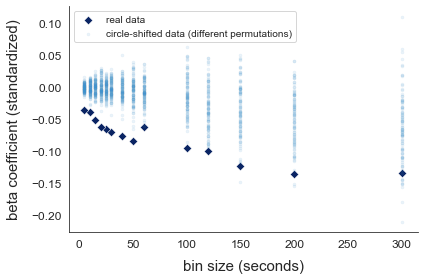

In [11]:
df_real = pd.read_csv(os.path.join(base_dir, 'Analyses', 'within_convo_analysis_different_bins_friends.csv'))
df_shifted = pd.read_csv(os.path.join(base_dir, 'Analyses', 'within_convo_analysis_circle_shifted_friends.csv'))

marker_real = 'D'
marker_shuffled = '.'

sns.scatterplot(x="bin_size", y="beta", data=df_real, marker=marker_real, color='#0A2463', label="real data")
sns.scatterplot(x="bin_size", y="betas", data=df_shifted, marker=marker_shuffled, 
                color='#3E92CC', alpha=0.1, edgecolor='#3E92CC', 
                label="circle-shifted data (different permutations)")

plt.xlabel('bin size (seconds)', fontsize=15, labelpad=10)
plt.ylabel('beta coefficient (standardized)', fontsize=15, labelpad=10)

plt.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir, 'Figures', 'within_convo_analysis_friends.png'), dpi=300)


# Quantify performance

How many times (out of 100) does the real beta outperform the circle-shifted data?

In [9]:
performance = pd.DataFrame()
performance = performance.fillna(0)
counter = 0

for i in range(len(df_real)):
    
    bin_size = df_real.at[i, 'bin_size']
    beta_real = df_real.at[i, 'beta']
    data_shifted_bin_subset = df_shifted.loc[df_shifted['bin_size'] == bin_size]
    data_shifted_bin_subset_beat_num = data_shifted_bin_subset.loc[data_shifted_bin_subset['betas'] > beta_real]
    
    performance.at[counter, 'bin_size'] = bin_size
    performance.at[counter, 'beta_beats_null'] = len(data_shifted_bin_subset_beat_num)

    counter += 1

In [10]:
performance

,bin_size,beta_beats_null
0,300.0,91.0
1,200.0,98.0
2,150.0,99.0
3,120.0,100.0
4,100.0,100.0
5,60.0,100.0
6,50.0,100.0
7,40.0,100.0
8,30.0,100.0
9,25.0,100.0


# Repeat with self / partner effects

In [12]:
data = pd.read_csv(os.path.join(base_dir,'Analyses','binned_connection_and_gaps_by_speaker_friends.csv'))


## Effect of gap length on connection for each bin size

In [14]:
df_real_speaker = pd.DataFrame()
df_real_speaker = df_real_speaker.fillna(0)
counter = 0

# 2 bins wouldn't converge with random slopes included
num_bins_list = [3, 4, 5, 6, 10, 12,
                15, 20, 24, 30, 40, 60, 120]

for num_bins in num_bins_list:
    
    columns = [f'connection_{num_bins}', f'gap_length_mean_speaker_{num_bins}', f'gap_length_mean_partner_{num_bins}', 'bin_num', 'subID', 'dyad']
    data_subset = data[columns]
    data_subset_no_nans = data_subset.loc[data_subset['bin_num'] <= (num_bins - 1)].reset_index(drop=True)

    variables = [f'connection_{num_bins}', f'gap_length_mean_speaker_{num_bins}', f'gap_length_mean_partner_{num_bins}', 'bin_num']
    for variable in variables:
        data_subset_no_nans[f'{variable}_zscore'] = zscore(data_subset_no_nans[variable])

    model = Lmer(f"connection_{num_bins}_zscore ~ gap_length_mean_speaker_{num_bins}_zscore + gap_length_mean_partner_{num_bins}_zscore + bin_num_zscore + (1 + gap_length_mean_speaker_{num_bins}_zscore + gap_length_mean_partner_{num_bins}_zscore |subID) + (1 + bin_num_zscore |dyad)", data=data_subset_no_nans)
    model.fit()
        
    df_real_speaker.at[counter, 'num_bins'] = num_bins
    df_real_speaker.at[counter, 'bin_size'] = 600 / num_bins
    df_real_speaker.at[counter, 'beta_self'] = model.coefs['Estimate'][1] 
    df_real_speaker.at[counter, 'p-val_self'] = model.coefs['P-val'][1]
    df_real_speaker.at[counter, 'beta_partner'] = model.coefs['Estimate'][2] 
    df_real_speaker.at[counter, 'p-val_partner'] = model.coefs['P-val'][2]

    counter += 1
        
df_real_speaker.to_csv(os.path.join(base_dir, 'Analyses', 'within_convo_analysis_different_bins_by_speakers_friends.csv'), encoding='utf-8', index=False)
    

boundary (singular) fit: see ?isSingular 

Formula: connection_3_zscore~gap_length_mean_speaker_3_zscore+gap_length_mean_partner_3_zscore+bin_num_zscore+(1+gap_length_mean_speaker_3_zscore+gap_length_mean_partner_3_zscore|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 390	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -418.133 	 AIC: 836.266

Random effects:

                                      Name    Var    Std
subID                          (Intercept)  0.542  0.737
subID     gap_length_mean_speaker_3_zscore  0.026  0.160
subID     gap_length_mean_partner_3_zscore  0.020  0.141
dyad                           (Intercept)  0.231  0.481
dyad                        bin_num_zscore  0.013  0.114
Residual                                    0.206  0.454

                                    IV1                               IV2  \
subID                       (Intercept)  gap_length_mean_speaker_3_zscore   
subID                    

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_15_zscore~gap_length_mean_speaker_15_zscore+gap_length_mean_partner_15_zscore+bin_num_zscore+(1+gap_length_mean_speaker_15_zscore+gap_length_mean_partner_15_zscore|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 1950	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -1833.037 	 AIC: 3666.074

Random effects:

                                       Name    Var    Std
subID                           (Intercept)  0.571  0.755
subID     gap_length_mean_speaker_15_zscore  0.000  0.014
subID     gap_length_mean_partner_15_zscore  0.005  0.074
dyad                            (Intercept)  0.281  0.

boundary (singular) fit: see ?isSingular 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: connection_120_zscore~gap_length_mean_speaker_120_zscore+gap_length_mean_partner_120_zscore+bin_num_zscore+(1+gap_length_mean_speaker_120_zscore+gap_length_mean_partner_120_zscore|subID)+(1+bin_num_zscore|dyad)

Family: gaussian	 Inference: parametric

Number of observations: 15600	 Groups: {'subID': 87.0, 'dyad': 65.0}

Log-likelihood: -5881.441 	 AIC: 11762.881

Random effects:

                                        Name    Var    Std
subID                            (Intercept)  0.537  0.733
subID     gap_length_mean_speaker_120_zscore  0.001  0.024
subID     gap_length_mean_partner_120_zscore  0.003  0.058
dyad                             (Intercept

In [15]:
df_real_speaker

,num_bins,bin_size,beta_self,p-val_self,beta_partner,p-val_partner
0,3.0,200.0,-0.089154,0.060345,-0.069586,0.131209
1,4.0,150.0,-0.092663,0.023810,-0.053446,0.157731
2,5.0,120.0,-0.064572,0.054325,-0.063654,0.101855
3,6.0,100.0,-0.060242,0.055436,-0.054985,0.088312
4,10.0,60.0,-0.025689,0.169370,-0.055224,0.011455
5,12.0,50.0,-0.033001,0.052860,-0.072872,0.000235
6,15.0,40.0,-0.032314,0.032949,-0.070509,0.000265
7,20.0,30.0,-0.035212,0.006474,-0.055978,0.000515
8,24.0,25.0,-0.034934,0.006473,-0.056977,0.000147
9,30.0,20.0,-0.037958,0.000813,-0.047623,0.000236


## Plot

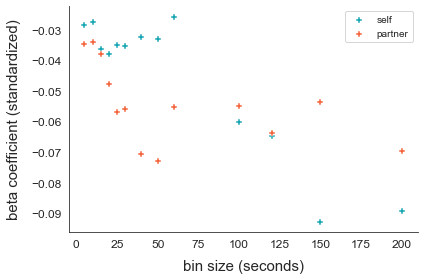

In [19]:
df_real_speaker = pd.read_csv(os.path.join(base_dir, 'Analyses', 'within_convo_analysis_different_bins_by_speakers_friends.csv'))

marker_real = 'P'
marker_shuffled = '.'

sns.scatterplot(x="bin_size", y="beta_self", data=df_real_speaker, marker=marker_real, 
                color='#0FA3B1', label="self")
sns.scatterplot(x="bin_size", y="beta_partner", data=df_real_speaker, marker=marker_real, 
                color='#F46036', label="partner")

plt.xlabel('bin size (seconds)', fontsize=15, labelpad=10)
plt.ylabel('beta coefficient (standardized)', fontsize=15, labelpad=10)

plt.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir, 'Figures', 'within_convo_analysis_partner_friends.png'), dpi=300)


## Circle-shift each bin

Note: These don't work well with the random slope structure. Could remove and try again, but would want to do the same for the real data as well. Main point here is that the partner effect is consistently larger across bins. Don't really need to do the circle-shifting to show that.

In [17]:
df_shifted_speaker = pd.DataFrame()
df_shifted_speaker = df_shifted_speaker.fillna(0)
counter = 0

num_bins_list = [3, 4, 5, 6, 10, 12,
                15, 20, 24, 30, 40, 60, 120]

for num_bins in num_bins_list:
    
    columns = [f'connection_{num_bins}', f'gap_length_mean_speaker_{num_bins}', f'gap_length_mean_partner_{num_bins}', 'bin_num', 'subID', 'dyad']
    data_subset = data[columns]
    data_subset_no_nans = data_subset.loc[data_subset['bin_num'] <= (num_bins - 1)].reset_index(drop=True)

    variables = [f'connection_{num_bins}', f'gap_length_mean_speaker_{num_bins}', f'gap_length_mean_partner_{num_bins}', 'bin_num']
    for variable in variables:
        data_subset_no_nans[f'{variable}_zscore'] = zscore(data_subset_no_nans[variable])

    shifted_betas_self = []
    shifted_p_vals_self = []
    shifted_betas_partner = []
    shifted_p_vals_partner = []

    for _ in tqdm(range(100)):

        for i in range(len(data_subset_no_nans)):
            data_subset_no_nans.loc[i,'joined'] = str(data_subset_no_nans.loc[i, f'gap_length_mean_speaker_{num_bins}_zscore']) + '_' + str(data_subset_no_nans.loc[i,f'gap_length_mean_partner_{num_bins}_zscore'])
        
        data_subset_no_nans.loc[:,'joined_shifted'] = data_subset_no_nans['joined'].groupby(data_subset_no_nans['dyad']).transform(circle_shift)
        
        for i in range(len(data_subset_no_nans)):
            data_subset_no_nans.at[i,f'gap_length_mean_speaker_{num_bins}_shifted'] = data_subset_no_nans['joined_shifted'][i].split('_')[0]
            data_subset_no_nans.at[i,f'gap_length_mean_partner_{num_bins}_shifted'] = data_subset_no_nans['joined_shifted'][i].split('_')[1]

        
        model = Lmer(f"connection_{num_bins}_zscore ~ gap_length_mean_speaker_{num_bins}_shifted + gap_length_mean_partner_{num_bins}_shifted + bin_num_zscore + (1 + gap_length_mean_speaker_{num_bins}_shifted + gap_length_mean_partner_{num_bins}_shifted |subID) + (1 + bin_num_zscore |dyad)", data=data_subset_no_nans)
        model.fit()

        shifted_betas_self.append(model.coefs['Estimate'][1])
        shifted_p_vals_self.append(model.coefs['P-val'][1])
        shifted_betas_partner.append(model.coefs['Estimate'][2])
        shifted_p_vals_partner.append(model.coefs['P-val'][2])
        
    for i in range(len(shifted_betas)):
        df_shifted_speaker.at[counter, 'num_bins'] = num_bins
        df_shifted_speaker.at[counter, 'bin_size'] = 600 / num_bins
        df_shifted_speaker.at[counter, 'betas_self'] = shifted_betas_self[i]
        df_shifted_speaker.at[counter, 'p-val_self'] = shifted_p_vals_self[i]
        df_shifted_speaker.at[counter, 'betas_partner'] = shifted_betas_partner[i]
        df_shifted_speaker.at[counter, 'p-val_partner'] = shifted_p_vals_partner[i]
        
        counter += 1
        
df_shifted_speaker.to_csv(os.path.join(base_dir, 'Analyses', 'within_convo_analysis_circle_shifted_by_speaker_friends.csv'), encoding='utf-8', index=False)
    

  0%|          | 0/100 [00:08<?, ?it/s]


RRuntimeError: Error: number of observations (=390) <= number of random effects (=67599) for term (1 + gap_length_mean_speaker_3_shifted + gap_length_mean_partner_3_shifted | subID); the random-effects parameters and the residual variance (or scale parameter) are probably unidentifiable
